# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:49:48.330880: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:49:51.215163
2025-04-14 22:49:51.215163


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:49:46"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

IBOVESPA - Close  IBOVESPA - High  IBOVESPA - Low  IBOVESPA - Open  \
0          0.000000         0.000000        0.000000         0.000000   
1          0.000150         0.000150        0.000049         0.000034   
2          0.000299         0.000406        0.000200         0.000183   
3          0.000468         0.000484        0.000350         0.000333   
4          0.000703         0.000704        0.000519         0.000502   

   Dólar - Close  Dólar - High  Dólar - Low  Dólar - Open  Dow Jones - Close  \
0            0.0           0.0          0.0           0.0           0.003941   
1            0.0           0.0          0.0           0.0           0.004600   
2            0.0           0.0          0.0           0.0           0.004961   
3            0.0           0.0          0.0           0.0           0.005083   
4            0.0           0.0          0.0           0.0           0.005490   

   Dow Jones - High  ...  IBOVESPA - Spread %  Kospi - Spread %  \
0          0.003148  ...             0.000000               0.0   
1          0.003605  ...             0.036606               0.0   
2          0.003965  ...             0.020442               0.0   
3          0.004311  ...             0.008583               0.0   
4          0.004630  ...             0.015204               0.0   

   Minério de Ferro - Spread %  Nasdaq - Spread %  Nikkei - Spread %  \
0                          0.0           0.000000           0.000000   
1                          0.0           0.029525           0.000000   
2                          0.0           0.119266           0.201590   
3                          0.0           0.056198           0.049836   
4                          0.0           0.182793           0.129181   

   Petróleo Brent - Spread %  Petróleo WTI - Spread %  S&P 500 - Spread %  \
0                        0.0                      0.0            0.000000   
1                        0.0                      0.0            0.084905   
2                        0.0                      0.0            0.065165   
3                        0.0                      0.0            0.095393   
4                        0.0                      0.0            0.162195   

   STOXX 600 - Spread %  Shanghai SE - Spread %  
0                   0.0                     0.0  
1                   0.0                     0.0  
2                   0.0                     0.0  
3                   0.0                     0.0  
4                   0.0                     0.0  

[5 rows x 200 columns]

Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

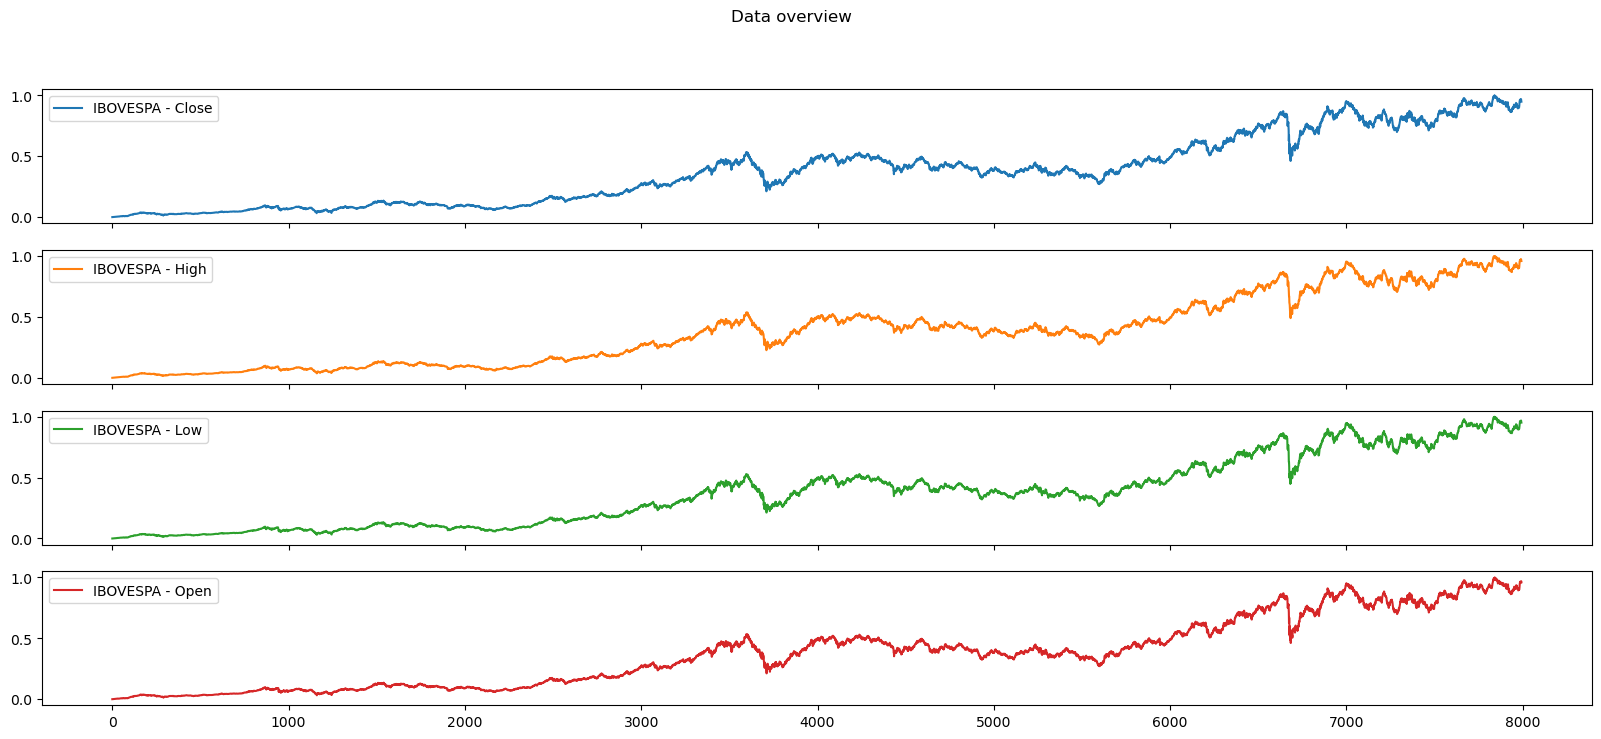

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

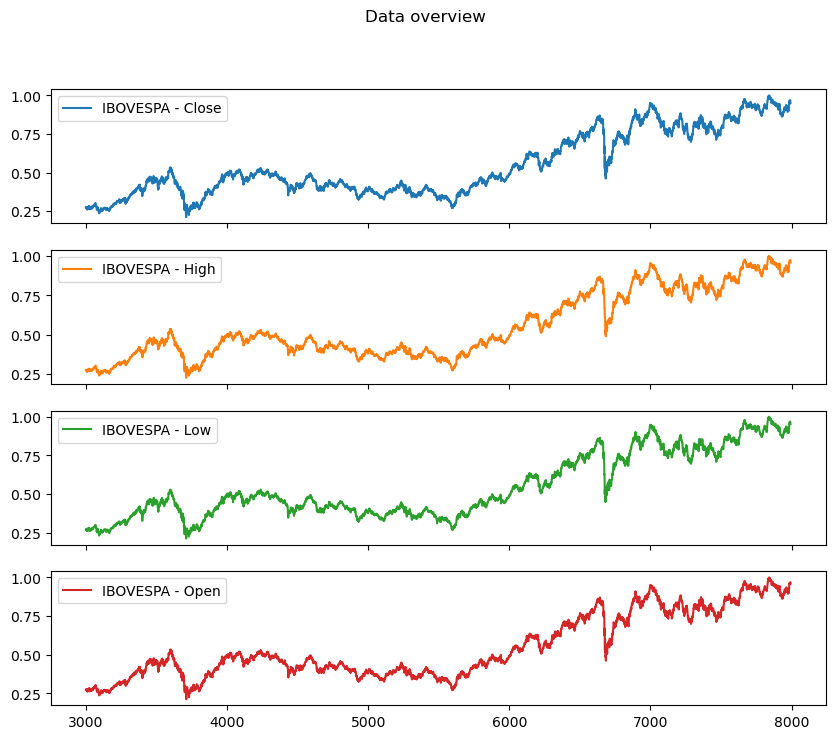

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

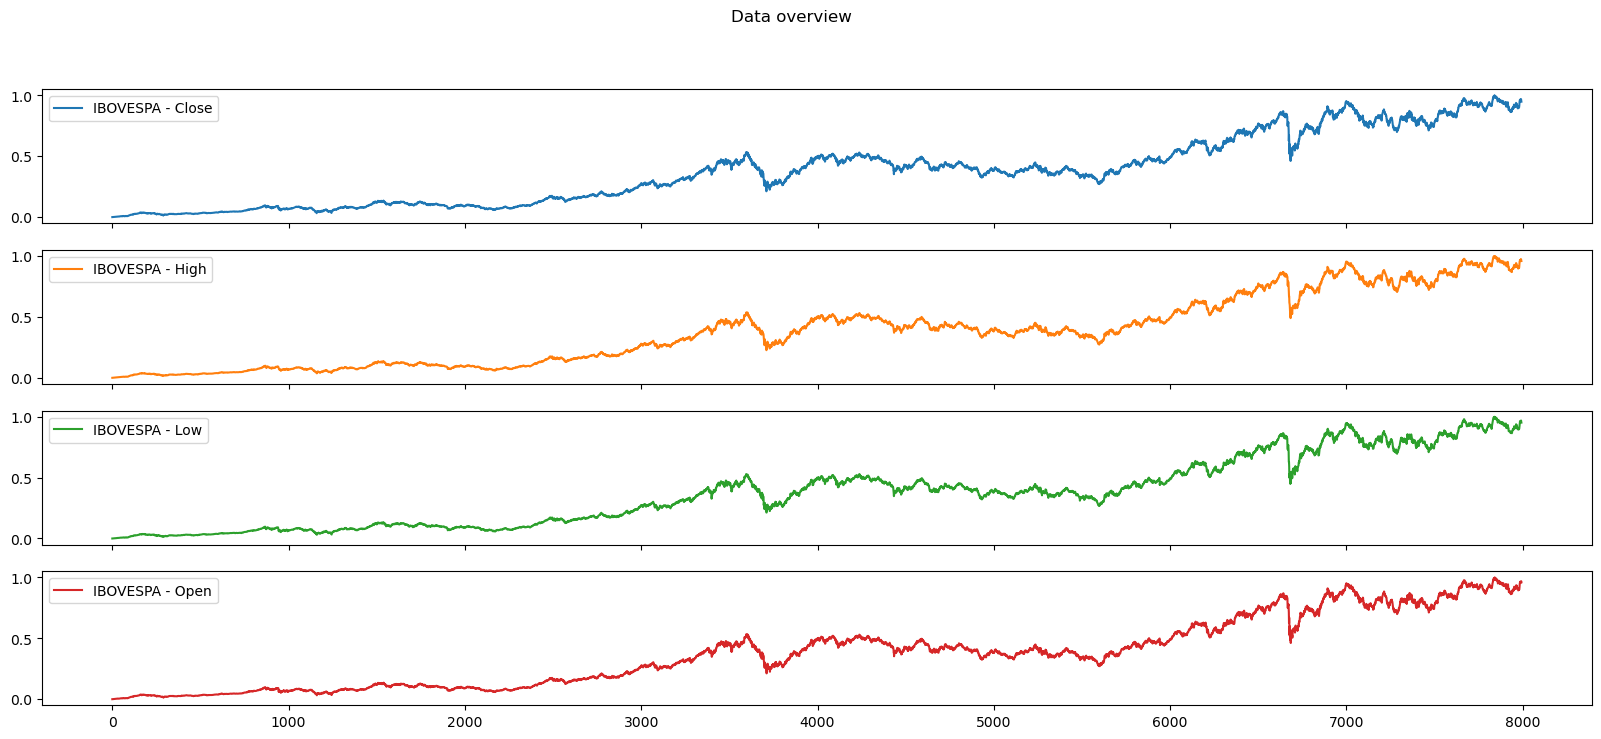

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

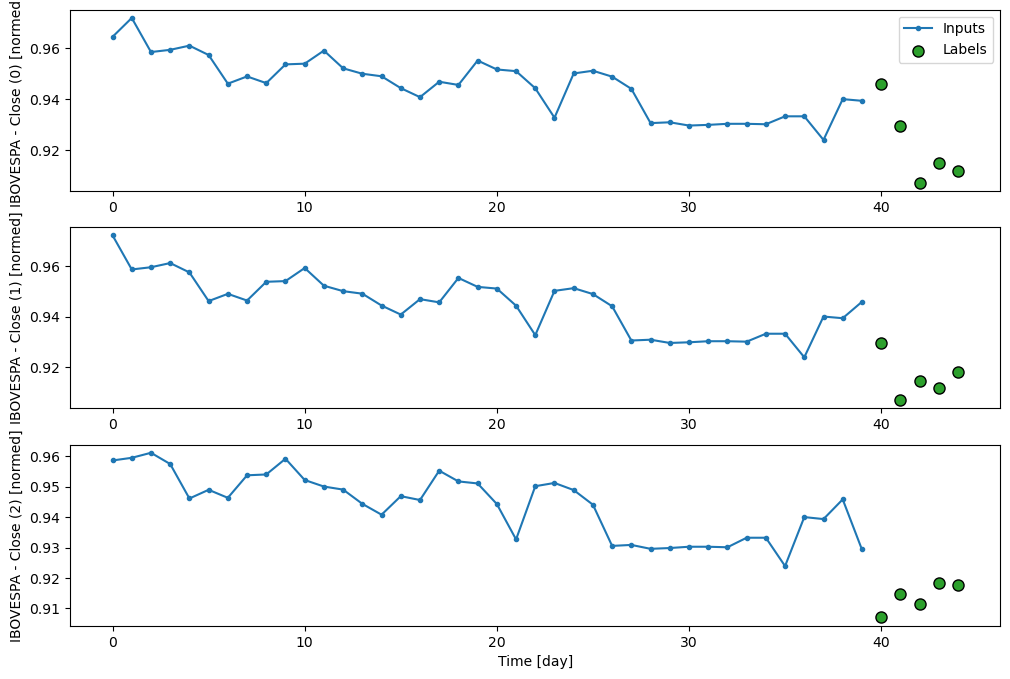

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 8:32 2s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 60.3422 - mean_squared_error: 5.1789e-05 - root_mean_squared_error: 0.0072 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 51.5862 - mean_squared_error: 6.3938e-05 - root_mean_squared_error: 0.0079

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 46.8276 - mean_squared_error: 6.6250e-05 - root_mean_squared_error: 0.0081

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 43.1524 - mean_squared_error: 6.5284e-05 - root_mean_squared_error: 0.0080

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 40.0221 - mean_squared_error: 6.2956e-05 - root_mean_squared_error: 0.0079

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 37.5297 - mean_squared_error: 6.2627e-05 - root_mean_squared_error: 0.0079

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 35.7906 - mean_squared_error: 7.2323e-05 - root_mean_squared_error: 0.0084

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 34.4468 - mean_squared_error: 8.2660e-05 - root_mean_squared_error: 0.0089

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 33.2702 - mean_squared_error: 9.0362e-05 - root_mean_squared_error: 0.0093

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 32.4093 - mean_squared_error: 9.9657e-05 - root_mean_squared_error: 0.0097

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.6436 - mean_squared_error: 1.0819e-04 - root_mean_squared_error: 0.0101

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.9599 - mean_squared_error: 1.1872e-04 - root_mean_squared_error: 0.0105

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 30.3394 - mean_squared_error: 1.3039e-04 - root_mean_squared_error: 0.0110

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 29.7366 - mean_squared_error: 1.3998e-04 - root_mean_squared_error: 0.0113

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 29.1881 - mean_squared_error: 1.4846e-04 - root_mean_squared_error: 0.0117

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 28.6645 - mean_squared_error: 1.5541e-04 - root_mean_squared_error: 0.0119

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 28.1840 - mean_squared_error: 1.6119e-04 - root_mean_squared_error: 0.0122

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 27.7502 - mean_squared_error: 1.6652e-04 - root_mean_squared_error: 0.0124

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 27.3881 - mean_squared_error: 1.7452e-04 - root_mean_squared_error: 0.0127

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 27.0685 - mean_squared_error: 1.8519e-04 - root_mean_squared_error: 0.0130

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 26.7414 - mean_squared_error: 1.9418e-04 - root_mean_squared_error: 0.0133

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 26.4168 - mean_squared_error: 2.0206e-04 - root_mean_squared_error: 0.0136

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 26.1065 - mean_squared_error: 2.1043e-04 - root_mean_squared_error: 0.0139

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 25.8192 - mean_squared_error: 2.2194e-04 - root_mean_squared_error: 0.0142

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 25.5375 - mean_squared_error: 2.3290e-04 - root_mean_squared_error: 0.0145

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 25.2583 - mean_squared_error: 2.4308e-04 - root_mean_squared_error: 0.0148

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 24.9845 - mean_squared_error: 2.5367e-04 - root_mean_squared_error: 0.0151

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 24.7146 - mean_squared_error: 2.6412e-04 - root_mean_squared_error: 0.0154

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 24.4663 - mean_squared_error: 2.7938e-04 - root_mean_squared_error: 0.0158

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 24.2365 - mean_squared_error: 2.9873e-04 - root_mean_squared_error: 0.0163

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 24.0420 - mean_squared_error: 3.4564e-04 - root_mean_squared_error: 0.0171

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 23.8823 - mean_squared_error: 4.2845e-04 - root_mean_squared_error: 0.0182

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 23.7351 - mean_squared_error: 5.1565e-04 - root_mean_squared_error: 0.0194

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 23.5917 - mean_squared_error: 5.9960e-04 - root_mean_squared_error: 0.0206

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 23.4449 - mean_squared_error: 6.7656e-04 - root_mean_squared_error: 0.0216

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 23.3012 - mean_squared_error: 7.4967e-04 - root_mean_squared_error: 0.0226

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 23.1551 - mean_squared_error: 8.1694e-04 - root_mean_squared_error: 0.0235

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 23.0073 - mean_squared_error: 8.7879e-04 - root_mean_squared_error: 0.0244

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 22.8607 - mean_squared_error: 9.3615e-04 - root_mean_squared_error: 0.0252

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 22.7133 - mean_squared_error: 9.8896e-04 - root_mean_squared_error: 0.0259

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 22.5692 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0266    

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 22.4255 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0273

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 22.2837 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0279

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 22.1471 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0285

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 22.0150 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0291

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 21.8903 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 21.7697 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0302

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 21.6505 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0307

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 21.5357 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0313

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 21.4228 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0318

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 21.3124 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 21.2059 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0328

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 21.1090 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 21.0140 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 20.9200 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 20.8269 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0352

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 20.7338 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0358

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 20.6646 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0362

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 20.5952 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0366

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 20.5261 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370 - val_loss: 0.0300 - val_mean_absolute_error: 0.0300 - val_mean_absolute_percentage_error: 3.1555 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0358 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.4792 - mean_absolute_error: 0.4792 - mean_absolute_percentage_error: 6437.5537 - mean_squared_error: 0.2297 - root_mean_squared_error: 0.4792

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4741 - mean_absolute_error: 0.4741 - mean_absolute_percentage_error: 4912.2949 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4741 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4638 - mean_absolute_error: 0.4638 - mean_absolute_percentage_error: 4017.2961 - mean_squared_error: 0.2157 - root_mean_squared_error: 0.4642

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4565 - mean_absolute_error: 0.4565 - mean_absolute_percentage_error: 3555.7000 - mean_squared_error: 0.2121 - root_mean_squared_error: 0.4603

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.4504 - mean_absolute_error: 0.4504 - mean_absolute_percentage_error: 3336.5925 - mean_squared_error: 0.2087 - root_mean_squared_error: 0.4565

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.4394 - mean_absolute_error: 0.4394 - mean_absolute_percentage_error: 3072.1335 - mean_squared_error: 0.2013 - root_mean_squared_error: 0.4481

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4262 - mean_absolute_error: 0.4262 - mean_absolute_percentage_error: 2854.1477 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.4377

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.4109 - mean_absolute_error: 0.4109 - mean_absolute_percentage_error: 2664.9622 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.4262

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3947 - mean_absolute_error: 0.3947 - mean_absolute_percentage_error: 2499.2361 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.4147

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3792 - mean_absolute_error: 0.3792 - mean_absolute_percentage_error: 2354.0649 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.4035

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3645 - mean_absolute_error: 0.3645 - mean_absolute_percentage_error: 2225.9634 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3929

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3507 - mean_absolute_error: 0.3507 - mean_absolute_percentage_error: 2112.3982 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3830

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 2010.9341 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3737

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1919.7805 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3650

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3183 - mean_absolute_error: 0.3183 - mean_absolute_percentage_error: 1863.9463 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3595

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3075 - mean_absolute_error: 0.3075 - mean_absolute_percentage_error: 1786.6819 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3516

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2976 - mean_absolute_error: 0.2976 - mean_absolute_percentage_error: 1716.2889 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3443

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1651.8881 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3374

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2770 - mean_absolute_error: 0.2770 - mean_absolute_percentage_error: 1574.0625 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3288

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1520.9170 - mean_squared_error: 0.1119 - root_mean_squared_error: 0.3228

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2617 - mean_absolute_error: 0.2617 - mean_absolute_percentage_error: 1471.6892 - mean_squared_error: 0.1085 - root_mean_squared_error: 0.3171

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2548 - mean_absolute_error: 0.2548 - mean_absolute_percentage_error: 1425.9399 - mean_squared_error: 0.1053 - root_mean_squared_error: 0.3117

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1383.2976 - mean_squared_error: 0.1023 - root_mean_squared_error: 0.3066

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1343.4541 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.3018

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 1318.3116 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.2987

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1282.5322 - mean_squared_error: 0.0952 - root_mean_squared_error: 0.2942

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 1238.0996 - mean_squared_error: 0.0921 - root_mean_squared_error: 0.2885

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1206.9946 - mean_squared_error: 0.0899 - root_mean_squared_error: 0.2845

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1168.1670 - mean_squared_error: 0.0871 - root_mean_squared_error: 0.2794

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2100 - mean_absolute_error: 0.2100 - mean_absolute_percentage_error: 1140.8478 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2757

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2059 - mean_absolute_error: 0.2059 - mean_absolute_percentage_error: 1114.9336 - mean_squared_error: 0.0833 - root_mean_squared_error: 0.2722

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 1090.3140 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2689

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 1066.8916 - mean_squared_error: 0.0798 - root_mean_squared_error: 0.2656

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1933 - mean_absolute_error: 0.1933 - mean_absolute_percentage_error: 1037.3750 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2615

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 1016.4163 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2585

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 1002.9656 - mean_squared_error: 0.0752 - root_mean_squared_error: 0.2566

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1835 - mean_absolute_error: 0.1835 - mean_absolute_percentage_error: 977.2311 - mean_squared_error: 0.0733 - root_mean_squared_error: 0.2529 

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 958.8840 - mean_squared_error: 0.0720 - root_mean_squared_error: 0.2502

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - mean_absolute_percentage_error: 941.2995 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2476

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - mean_absolute_percentage_error: 924.4301 - mean_squared_error: 0.0695 - root_mean_squared_error: 0.2451

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1722 - mean_absolute_error: 0.1722 - mean_absolute_percentage_error: 908.2314 - mean_squared_error: 0.0683 - root_mean_squared_error: 0.2427

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 892.6630 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2404

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 877.6837 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2381

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1650 - mean_absolute_error: 0.1650 - mean_absolute_percentage_error: 863.2606 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2359

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1635 - mean_absolute_error: 0.1635 - mean_absolute_percentage_error: 853.9371 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2345

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 835.9526 - mean_squared_error: 0.0631 - root_mean_squared_error: 0.2317

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1585 - mean_absolute_error: 0.1585 - mean_absolute_percentage_error: 823.0123 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2297

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 810.5137 - mean_squared_error: 0.0612 - root_mean_squared_error: 0.2277

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 798.4334 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2258

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1532 - mean_absolute_error: 0.1532 - mean_absolute_percentage_error: 790.6014 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2246

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 782.9394 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2233

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 771.7534 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2215

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 757.3837 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2192

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 743.6002 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2170

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1433 - mean_absolute_error: 0.1433 - mean_absolute_percentage_error: 730.3663 - mean_squared_error: 0.0553 - root_mean_squared_error: 0.2148

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1411 - mean_absolute_error: 0.1411 - mean_absolute_percentage_error: 717.6498 - mean_squared_error: 0.0544 - root_mean_squared_error: 0.2127

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - mean_absolute_percentage_error: 705.4183 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2106

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 693.6446 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2086

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 682.3038 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2067

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 671.3700 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.2048

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 660.8212 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2030

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 650.6367 - mean_squared_error: 0.0494 - root_mean_squared_error: 0.2012

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 640.7980 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.1995

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 631.2866 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.1979

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 622.0853 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.1962

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 613.1794 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.1946

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 606.6863 - mean_squared_error: 0.0462 - root_mean_squared_error: 0.1935

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 600.3456 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.1924

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 594.1533 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1913

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 588.1030 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.1902

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 582.1896 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.1892

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 576.4079 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1881

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 568.8962 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1868

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 563.4042 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1858

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 559.8080 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.1852

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 556.2688 - mean_squared_error: 0.0425 - root_mean_squared_error: 0.1846 - val_loss: 0.0521 - val_mean_absolute_error: 0.0521 - val_mean_absolute_percentage_error: 5.5254 - val_mean_squared_error: 0.0030 - val_root_mean_squared_error: 0.0551 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.1813 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 2435.4287 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1814

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1740 - mean_absolute_error: 0.1740 - mean_absolute_percentage_error: 1829.7104 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1743 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1635 - mean_absolute_error: 0.1635 - mean_absolute_percentage_error: 1471.5063 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1646

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 1252.5013 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1541

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1384 - mean_absolute_error: 0.1384 - mean_absolute_percentage_error: 1099.8044 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1449

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 988.9223 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1374 

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 875.8510 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1290

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 789.7188 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1221

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 736.7960 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1175

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 705.8251 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1148

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 677.6659 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1123

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 639.9100 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1088

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 606.6663 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1056

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 577.1709 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1027

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 550.7852 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1000

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 519.6135 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0968

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 492.2081 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0938

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 467.9052 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0912

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 446.1737 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0887

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 426.6126 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0865

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 408.9010 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0844

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 392.7869 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0825

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 378.0462 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0807

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 364.5089 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0790

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 352.0317 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0775

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 340.4853 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0760

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 329.7621 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0746

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 319.7727 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0733

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 310.4445 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0721

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 301.7101 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0709

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 293.5125 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0698

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 285.8017 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0688

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 278.5355 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0678

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 273.3575 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0671

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 266.7871 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0662

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 260.5738 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0654

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 254.6816 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0646

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 249.0831 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0639

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 243.7545 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0632

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 238.6768 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0626

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 233.8339 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0619

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 229.2063 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0613

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 224.7804 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0608

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 220.5432 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0602

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 216.4820 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0596

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 212.5866 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0591

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 208.8474 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0586

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 205.2540 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0581

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 201.7993 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0576

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 198.4793 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0572

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 195.2849 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0568

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 192.2050 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0564

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 189.2327 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0560

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 186.3634 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 183.5917 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 180.9117 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0550

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 178.3216 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0548

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 175.8178 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0546

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 173.3940 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0544

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 171.0462 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0542

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 168.7697 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0541

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 166.5610 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0539

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 164.4169 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 162.3356 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0537 - val_loss: 0.0168 - val_mean_absolute_error: 0.0168 - val_mean_absolute_percentage_error: 1.7753 - val_mean_squared_error: 4.6587e-04 - val_root_mean_squared_error: 0.0216 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 2553.0464 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1902

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 1791.4290 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1847

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 1423.1677 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1746

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 1200.2932 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1624

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 1050.0790 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1523

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 962.9906 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1457 

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 870.3895 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1382

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 795.9755 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1317

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 734.8904 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1261

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 683.6559 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1212

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 639.9684 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1169

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 602.1927 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1130

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 569.1660 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1094

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 540.0052 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1062

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 514.0457 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1033

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 490.7733 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1007

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 469.7806 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0982

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 450.7419 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0959

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 433.3873 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0938

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 417.4867 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0918

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 402.8555 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0899

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 389.3392 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0882

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 376.8084 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0866

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 365.1569 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0850

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 354.2928 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0836

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 344.1379 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0822

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 334.6192 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0809

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 325.6768 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0797

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 317.2574 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0785

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 309.3158 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0774

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 301.8121 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0763

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 294.7068 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0753

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 287.9672 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0743

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 281.5645 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0734

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 275.4725 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0725

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 269.6690 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0716

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 264.1333 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0708

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 258.8468 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0700

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 253.7918 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0692

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 248.9533 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0685

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 244.3167 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0678

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 239.8694 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0671

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 235.6001 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0664

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 232.5081 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0659

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 228.5241 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0653

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 224.6904 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0647

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 220.9979 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0641

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 217.4387 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0635

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 214.0056 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0629

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 210.6919 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0624

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 207.4917 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0619

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 204.3988 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0614

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 201.4073 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0609

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 198.5137 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0604

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 195.7119 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0600

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 193.6683 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0597

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 192.3324 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0594

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 189.7230 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0591

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 187.1921 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0587

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 184.7363 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0583

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 182.3518 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0580

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 181.1869 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0578 - val_loss: 0.0517 - val_mean_absolute_error: 0.0517 - val_mean_absolute_percentage_error: 5.4815 - val_mean_squared_error: 0.0030 - val_root_mean_squared_error: 0.0545 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 752.6381 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 497.8808 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0491

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 378.3731 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 316.9288 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 275.7922 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 245.4940 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 221.9372 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 203.0146 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 187.4548 - mean_squared_error: 9.8337e-04 - root_mean_squared_error: 0.0298

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 174.4224 - mean_squared_error: 9.1579e-04 - root_mean_squared_error: 0.0286

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 163.3468 - mean_squared_error: 8.5815e-04 - root_mean_squared_error: 0.0276

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 153.7808 - mean_squared_error: 8.0829e-04 - root_mean_squared_error: 0.0267

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 145.4290 - mean_squared_error: 7.6487e-04 - root_mean_squared_error: 0.0259

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 138.0582 - mean_squared_error: 7.2657e-04 - root_mean_squared_error: 0.0251

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 131.4992 - mean_squared_error: 6.9248e-04 - root_mean_squared_error: 0.0244

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 125.6198 - mean_squared_error: 6.6188e-04 - root_mean_squared_error: 0.0238

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 120.3166 - mean_squared_error: 6.3424e-04 - root_mean_squared_error: 0.0233

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 115.5099 - mean_squared_error: 6.0915e-04 - root_mean_squared_error: 0.0227

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 111.1275 - mean_squared_error: 5.8624e-04 - root_mean_squared_error: 0.0222

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 107.1101 - mean_squared_error: 5.6522e-04 - root_mean_squared_error: 0.0218

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 103.4135 - mean_squared_error: 5.4594e-04 - root_mean_squared_error: 0.0214

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 99.9975 - mean_squared_error: 5.2813e-04 - root_mean_squared_error: 0.0210 

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 97.6006 - mean_squared_error: 5.1566e-04 - root_mean_squared_error: 0.0207

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 94.6031 - mean_squared_error: 5.0012e-04 - root_mean_squared_error: 0.0203

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 91.8095 - mean_squared_error: 4.8574e-04 - root_mean_squared_error: 0.0200

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 89.1996 - mean_squared_error: 4.7244e-04 - root_mean_squared_error: 0.0197

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 86.7544 - mean_squared_error: 4.6007e-04 - root_mean_squared_error: 0.0194

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 84.4580 - mean_squared_error: 4.4865e-04 - root_mean_squared_error: 0.0192

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 82.2972 - mean_squared_error: 4.3816e-04 - root_mean_squared_error: 0.0189

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 80.2621 - mean_squared_error: 4.2879e-04 - root_mean_squared_error: 0.0187

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 78.3434 - mean_squared_error: 4.2042e-04 - root_mean_squared_error: 0.0185

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 76.5302 - mean_squared_error: 4.1301e-04 - root_mean_squared_error: 0.0184

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 74.8121 - mean_squared_error: 4.0630e-04 - root_mean_squared_error: 0.0182

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 73.1821 - mean_squared_error: 4.0037e-04 - root_mean_squared_error: 0.0181

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 71.6313 - mean_squared_error: 3.9472e-04 - root_mean_squared_error: 0.0180

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 70.1546 - mean_squared_error: 3.8944e-04 - root_mean_squared_error: 0.0179

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 68.7469 - mean_squared_error: 3.8451e-04 - root_mean_squared_error: 0.0178

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 67.4027 - mean_squared_error: 3.7982e-04 - root_mean_squared_error: 0.0177

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.1171 - mean_squared_error: 3.7528e-04 - root_mean_squared_error: 0.0176

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 64.8867 - mean_squared_error: 3.7092e-04 - root_mean_squared_error: 0.0176

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 63.7077 - mean_squared_error: 3.6672e-04 - root_mean_squared_error: 0.0175

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 62.5768 - mean_squared_error: 3.6265e-04 - root_mean_squared_error: 0.0174

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.4917 - mean_squared_error: 3.5880e-04 - root_mean_squared_error: 0.0173

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.4488 - mean_squared_error: 3.5506e-04 - root_mean_squared_error: 0.0172

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.4462 - mean_squared_error: 3.5147e-04 - root_mean_squared_error: 0.0172

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.4818 - mean_squared_error: 3.4809e-04 - root_mean_squared_error: 0.0171

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.5530 - mean_squared_error: 3.4487e-04 - root_mean_squared_error: 0.0170

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.6580 - mean_squared_error: 3.4185e-04 - root_mean_squared_error: 0.0170

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 55.7952 - mean_squared_error: 3.3912e-04 - root_mean_squared_error: 0.0169

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.9632 - mean_squared_error: 3.3682e-04 - root_mean_squared_error: 0.0169

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.3581 - mean_squared_error: 3.3531e-04 - root_mean_squared_error: 0.0169

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.5752 - mean_squared_error: 3.3348e-04 - root_mean_squared_error: 0.0168

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.8176 - mean_squared_error: 3.3173e-04 - root_mean_squared_error: 0.0168

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.0869 - mean_squared_error: 3.3187e-04 - root_mean_squared_error: 0.0168

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.3803 - mean_squared_error: 3.3283e-04 - root_mean_squared_error: 0.0169

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.8664 - mean_squared_error: 3.3504e-04 - root_mean_squared_error: 0.0170

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.2006 - mean_squared_error: 3.3894e-04 - root_mean_squared_error: 0.0171

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.5561 - mean_squared_error: 3.4356e-04 - root_mean_squared_error: 0.0172

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.9311 - mean_squared_error: 3.4838e-04 - root_mean_squared_error: 0.0174

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.3248 - mean_squared_error: 3.5337e-04 - root_mean_squared_error: 0.0175

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 47.7360 - mean_squared_error: 3.5811e-04 - root_mean_squared_error: 0.0176 - val_loss: 0.0321 - val_mean_absolute_error: 0.0321 - val_mean_absolute_percentage_error: 3.4000 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0356 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 1023.0277 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0765

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 692.4247 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0692 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 527.0203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 442.7864 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 386.1736 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0528

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 344.6577 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0498

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 312.4406 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0473

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 286.5041 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 265.1407 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 247.1597 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 231.7880 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 218.4514 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 206.7614 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 196.4153 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 187.1862 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 178.8958 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 171.4062 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 164.6075 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 158.4006 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 152.7058 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 147.4646 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 142.6199 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 138.1259 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 133.9434 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 130.0403 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 126.3885 - mean_squared_error: 9.9242e-04 - root_mean_squared_error: 0.0287

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 122.9628 - mean_squared_error: 9.6630e-04 - root_mean_squared_error: 0.0283

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 119.7423 - mean_squared_error: 9.4195e-04 - root_mean_squared_error: 0.0279

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 116.7088 - mean_squared_error: 9.1932e-04 - root_mean_squared_error: 0.0275

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 113.8492 - mean_squared_error: 8.9857e-04 - root_mean_squared_error: 0.0272

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 111.8094 - mean_squared_error: 8.8404e-04 - root_mean_squared_error: 0.0270

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 109.2215 - mean_squared_error: 8.6672e-04 - root_mean_squared_error: 0.0267

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 106.7700 - mean_squared_error: 8.5114e-04 - root_mean_squared_error: 0.0265

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 104.4435 - mean_squared_error: 8.3697e-04 - root_mean_squared_error: 0.0263

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 102.2306 - mean_squared_error: 8.2365e-04 - root_mean_squared_error: 0.0261

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 100.1219 - mean_squared_error: 8.1089e-04 - root_mean_squared_error: 0.0259

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 98.1107 - mean_squared_error: 7.9880e-04 - root_mean_squared_error: 0.0257 

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 96.1903 - mean_squared_error: 7.8729e-04 - root_mean_squared_error: 0.0255

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 94.3534 - mean_squared_error: 7.7620e-04 - root_mean_squared_error: 0.0254

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 92.5947 - mean_squared_error: 7.6553e-04 - root_mean_squared_error: 0.0252

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 90.9090 - mean_squared_error: 7.5522e-04 - root_mean_squared_error: 0.0250

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 89.2919 - mean_squared_error: 7.4528e-04 - root_mean_squared_error: 0.0249

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 87.7402 - mean_squared_error: 7.3582e-04 - root_mean_squared_error: 0.0247

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 86.6163 - mean_squared_error: 7.2895e-04 - root_mean_squared_error: 0.0246

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 85.8851 - mean_squared_error: 7.2446e-04 - root_mean_squared_error: 0.0245

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 84.8147 - mean_squared_error: 7.1792e-04 - root_mean_squared_error: 0.0244

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 83.4361 - mean_squared_error: 7.0975e-04 - root_mean_squared_error: 0.0243

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 82.1086 - mean_squared_error: 7.0201e-04 - root_mean_squared_error: 0.0242

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 80.8291 - mean_squared_error: 6.9463e-04 - root_mean_squared_error: 0.0241

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 79.5944 - mean_squared_error: 6.8756e-04 - root_mean_squared_error: 0.0240

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 78.4025 - mean_squared_error: 6.8086e-04 - root_mean_squared_error: 0.0239

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 77.2509 - mean_squared_error: 6.7448e-04 - root_mean_squared_error: 0.0238

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 76.1373 - mean_squared_error: 6.6837e-04 - root_mean_squared_error: 0.0237

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 75.0600 - mean_squared_error: 6.6276e-04 - root_mean_squared_error: 0.0236

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 74.0193 - mean_squared_error: 6.5888e-04 - root_mean_squared_error: 0.0236

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 73.0122 - mean_squared_error: 6.5600e-04 - root_mean_squared_error: 0.0235

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 72.0379 - mean_squared_error: 6.5488e-04 - root_mean_squared_error: 0.0236

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 71.0944 - mean_squared_error: 6.5482e-04 - root_mean_squared_error: 0.0236

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 70.1796 - mean_squared_error: 6.5524e-04 - root_mean_squared_error: 0.0236

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 69.2925 - mean_squared_error: 6.5637e-04 - root_mean_squared_error: 0.0237

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 68.4310 - mean_squared_error: 6.5757e-04 - root_mean_squared_error: 0.0237

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 68.0101 - mean_squared_error: 6.5816e-04 - root_mean_squared_error: 0.0238 - val_loss: 0.0144 - val_mean_absolute_error: 0.0144 - val_mean_absolute_percentage_error: 1.5642 - val_mean_squared_error: 3.0547e-04 - val_root_mean_squared_error: 0.0175 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 1433.2869 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1067

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 993.7282 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1011 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 771.2400 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0924

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 644.2843 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0850

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 561.2842 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0794

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 500.4172 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0748

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 453.4141 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0710

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 415.4964 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0677

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 384.1908 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0649

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 357.9000 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0624

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 335.5204 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0602

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 316.1645 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0583

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 299.1903 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0565

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 284.1704 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0549

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 270.7729 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0534

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 258.7437 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0521

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 247.8835 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0508

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 238.0349 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 229.0571 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 220.8228 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 213.2360 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 206.2184 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 199.7059 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 193.6450 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 187.9897 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 182.6997 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 177.7370 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 173.0713 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 168.6754 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 164.5280 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 160.6067 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 156.8914 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 153.3651 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 150.0131 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 146.8219 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 143.7807 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 140.8786 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 138.1058 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 135.4532 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 132.9130 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 130.4779 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 128.1415 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 126.4504 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 124.2724 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 122.1776 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 120.1612 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 118.2185 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 116.3452 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 114.5375 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 112.7922 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 111.1062 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 109.4761 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 107.8993 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 106.3742 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 104.8976 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 103.4673 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 102.0824 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 100.7394 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 99.4370 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315 

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 98.1722 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 97.5544 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314 - val_loss: 0.0296 - val_mean_absolute_error: 0.0296 - val_mean_absolute_percentage_error: 3.1304 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0329 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 182.3926 - mean_squared_error: 2.4399e-04 - root_mean_squared_error: 0.0156

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 116.7556 - mean_squared_error: 1.7586e-04 - root_mean_squared_error: 0.0131

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 89.0094 - mean_squared_error: 1.3989e-04 - root_mean_squared_error: 0.0116 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 74.6323 - mean_squared_error: 1.2020e-04 - root_mean_squared_error: 0.0107

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 65.2127 - mean_squared_error: 1.0656e-04 - root_mean_squared_error: 0.0101

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 58.4201 - mean_squared_error: 9.6466e-05 - root_mean_squared_error: 0.0095

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 53.1803 - mean_squared_error: 8.8574e-05 - root_mean_squared_error: 0.0091

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 48.9769 - mean_squared_error: 8.2484e-05 - root_mean_squared_error: 0.0088

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 45.5313 - mean_squared_error: 7.7632e-05 - root_mean_squared_error: 0.0085

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 42.6601 - mean_squared_error: 7.3604e-05 - root_mean_squared_error: 0.0083

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 40.2400 - mean_squared_error: 7.0263e-05 - root_mean_squared_error: 0.0081

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 38.1456 - mean_squared_error: 6.7393e-05 - root_mean_squared_error: 0.0079

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 36.3174 - mean_squared_error: 6.5099e-05 - root_mean_squared_error: 0.0078

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 34.6963 - mean_squared_error: 6.3138e-05 - root_mean_squared_error: 0.0077

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 33.2485 - mean_squared_error: 6.1417e-05 - root_mean_squared_error: 0.0076

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 31.9485 - mean_squared_error: 5.9870e-05 - root_mean_squared_error: 0.0075

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 30.7779 - mean_squared_error: 5.8502e-05 - root_mean_squared_error: 0.0074

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 29.9753 - mean_squared_error: 5.7569e-05 - root_mean_squared_error: 0.0073

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 28.9883 - mean_squared_error: 5.6408e-05 - root_mean_squared_error: 0.0073

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 28.0817 - mean_squared_error: 5.5331e-05 - root_mean_squared_error: 0.0072

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 27.2450 - mean_squared_error: 5.4385e-05 - root_mean_squared_error: 0.0071

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 26.4687 - mean_squared_error: 5.3525e-05 - root_mean_squared_error: 0.0071

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 25.7458 - mean_squared_error: 5.2747e-05 - root_mean_squared_error: 0.0070

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 25.0698 - mean_squared_error: 5.2029e-05 - root_mean_squared_error: 0.0070

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 24.4361 - mean_squared_error: 5.1403e-05 - root_mean_squared_error: 0.0069

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 23.8410 - mean_squared_error: 5.0891e-05 - root_mean_squared_error: 0.0069

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 23.2801 - mean_squared_error: 5.0444e-05 - root_mean_squared_error: 0.0069

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 22.7510 - mean_squared_error: 5.0171e-05 - root_mean_squared_error: 0.0069

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 22.2514 - mean_squared_error: 5.0183e-05 - root_mean_squared_error: 0.0069

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 21.7818 - mean_squared_error: 5.0780e-05 - root_mean_squared_error: 0.0069

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 21.3404 - mean_squared_error: 5.1824e-05 - root_mean_squared_error: 0.0070

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 20.9254 - mean_squared_error: 5.3569e-05 - root_mean_squared_error: 0.0071

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 20.5326 - mean_squared_error: 5.5769e-05 - root_mean_squared_error: 0.0072

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 20.1603 - mean_squared_error: 5.8327e-05 - root_mean_squared_error: 0.0074

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 19.8049 - mean_squared_error: 6.0828e-05 - root_mean_squared_error: 0.0075

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 19.4650 - mean_squared_error: 6.3191e-05 - root_mean_squared_error: 0.0076

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 19.1399 - mean_squared_error: 6.5489e-05 - root_mean_squared_error: 0.0078

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.8290 - mean_squared_error: 6.7739e-05 - root_mean_squared_error: 0.0079

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.5303 - mean_squared_error: 6.9828e-05 - root_mean_squared_error: 0.0080

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 18.2435 - mean_squared_error: 7.1787e-05 - root_mean_squared_error: 0.0081

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.9675 - mean_squared_error: 7.3601e-05 - root_mean_squared_error: 0.0082

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 17.7020 - mean_squared_error: 7.5312e-05 - root_mean_squared_error: 0.0083

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 17.4472 - mean_squared_error: 7.7017e-05 - root_mean_squared_error: 0.0084

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 17.2016 - mean_squared_error: 7.8620e-05 - root_mean_squared_error: 0.0085

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 16.9650 - mean_squared_error: 8.0164e-05 - root_mean_squared_error: 0.0085

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 16.7379 - mean_squared_error: 8.1769e-05 - root_mean_squared_error: 0.0086

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 16.5188 - mean_squared_error: 8.3339e-05 - root_mean_squared_error: 0.0087

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 16.3075 - mean_squared_error: 8.4917e-05 - root_mean_squared_error: 0.0088

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 16.1033 - mean_squared_error: 8.6520e-05 - root_mean_squared_error: 0.0089

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 15.9063 - mean_squared_error: 8.8266e-05 - root_mean_squared_error: 0.0090

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 15.7158 - mean_squared_error: 9.0072e-05 - root_mean_squared_error: 0.0091

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 15.5313 - mean_squared_error: 9.1895e-05 - root_mean_squared_error: 0.0091

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 15.3523 - mean_squared_error: 9.3936e-05 - root_mean_squared_error: 0.0092

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 15.1811 - mean_squared_error: 9.7470e-05 - root_mean_squared_error: 0.0094

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 15.0159 - mean_squared_error: 1.0170e-04 - root_mean_squared_error: 0.0095

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 14.8573 - mean_squared_error: 1.0739e-04 - root_mean_squared_error: 0.0097

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 14.7042 - mean_squared_error: 1.1370e-04 - root_mean_squared_error: 0.0099

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 14.5560 - mean_squared_error: 1.2021e-04 - root_mean_squared_error: 0.0102

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 14.4125 - mean_squared_error: 1.2704e-04 - root_mean_squared_error: 0.0104

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 14.2729 - mean_squared_error: 1.3371e-04 - root_mean_squared_error: 0.0106

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 14.2046 - mean_squared_error: 1.3696e-04 - root_mean_squared_error: 0.0107 - val_loss: 0.0118 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 1.2482 - val_mean_squared_error: 2.2809e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 936.9602 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0697

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 640.1370 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0642

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 489.9837 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 413.8712 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0534

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 363.5147 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0504

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 326.6507 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0479

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 297.7311 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 274.0959 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0440

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 254.3944 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 237.7220 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 223.4384 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 211.0166 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 200.0777 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 190.3576 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 181.6584 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 173.8220 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 166.7250 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 160.2710 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 154.3695 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 148.9455 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 143.9425 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 139.3092 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 135.0046 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 130.9933 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 127.2451 - mean_squared_error: 9.8680e-04 - root_mean_squared_error: 0.0291

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 123.7340 - mean_squared_error: 9.6052e-04 - root_mean_squared_error: 0.0287

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 120.4364 - mean_squared_error: 9.3588e-04 - root_mean_squared_error: 0.0283

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 117.3334 - mean_squared_error: 9.1286e-04 - root_mean_squared_error: 0.0279

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 114.4079 - mean_squared_error: 8.9136e-04 - root_mean_squared_error: 0.0275

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 111.6475 - mean_squared_error: 8.7157e-04 - root_mean_squared_error: 0.0272

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 109.0369 - mean_squared_error: 8.5305e-04 - root_mean_squared_error: 0.0269

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 106.5624 - mean_squared_error: 8.3561e-04 - root_mean_squared_error: 0.0266

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 104.7891 - mean_squared_error: 8.2319e-04 - root_mean_squared_error: 0.0263

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 102.5270 - mean_squared_error: 8.0746e-04 - root_mean_squared_error: 0.0261

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 100.3733 - mean_squared_error: 7.9250e-04 - root_mean_squared_error: 0.0258

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 98.3207 - mean_squared_error: 7.7833e-04 - root_mean_squared_error: 0.0256 

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 96.3621 - mean_squared_error: 7.6490e-04 - root_mean_squared_error: 0.0253

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 94.4905 - mean_squared_error: 7.5208e-04 - root_mean_squared_error: 0.0251

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 92.6995 - mean_squared_error: 7.3979e-04 - root_mean_squared_error: 0.0249

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 90.9843 - mean_squared_error: 7.2801e-04 - root_mean_squared_error: 0.0247

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 89.3396 - mean_squared_error: 7.1668e-04 - root_mean_squared_error: 0.0245

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 87.7613 - mean_squared_error: 7.0580e-04 - root_mean_squared_error: 0.0243

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 86.2455 - mean_squared_error: 6.9538e-04 - root_mean_squared_error: 0.0241

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 84.7882 - mean_squared_error: 6.8534e-04 - root_mean_squared_error: 0.0239

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 83.3862 - mean_squared_error: 6.7568e-04 - root_mean_squared_error: 0.0237

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 82.0364 - mean_squared_error: 6.6643e-04 - root_mean_squared_error: 0.0236

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 80.7357 - mean_squared_error: 6.5754e-04 - root_mean_squared_error: 0.0234

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 79.4813 - mean_squared_error: 6.4900e-04 - root_mean_squared_error: 0.0233

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 78.2707 - mean_squared_error: 6.4082e-04 - root_mean_squared_error: 0.0231

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 77.1019 - mean_squared_error: 6.3310e-04 - root_mean_squared_error: 0.0230

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 75.9727 - mean_squared_error: 6.2577e-04 - root_mean_squared_error: 0.0228

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 74.8806 - mean_squared_error: 6.1880e-04 - root_mean_squared_error: 0.0227

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 73.8238 - mean_squared_error: 6.1225e-04 - root_mean_squared_error: 0.0226

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 72.8019 - mean_squared_error: 6.0677e-04 - root_mean_squared_error: 0.0225

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 71.8125 - mean_squared_error: 6.0198e-04 - root_mean_squared_error: 0.0224

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 70.8541 - mean_squared_error: 5.9792e-04 - root_mean_squared_error: 0.0224

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 69.9263 - mean_squared_error: 5.9519e-04 - root_mean_squared_error: 0.0224

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 69.0264 - mean_squared_error: 5.9293e-04 - root_mean_squared_error: 0.0223

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 68.1537 - mean_squared_error: 5.9143e-04 - root_mean_squared_error: 0.0223

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 67.3059 - mean_squared_error: 5.9002e-04 - root_mean_squared_error: 0.0223

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 66.8918 - mean_squared_error: 5.8933e-04 - root_mean_squared_error: 0.0223 - val_loss: 0.0216 - val_mean_absolute_error: 0.0216 - val_mean_absolute_percentage_error: 2.2824 - val_mean_squared_error: 6.3285e-04 - val_root_mean_squared_error: 0.0252 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 355.0771 - mean_squared_error: 7.7825e-04 - root_mean_squared_error: 0.0279

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 227.5431 - mean_squared_error: 5.5708e-04 - root_mean_squared_error: 0.0234

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 174.4949 - mean_squared_error: 4.4722e-04 - root_mean_squared_error: 0.0208

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 147.4670 - mean_squared_error: 3.8950e-04 - root_mean_squared_error: 0.0194

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 130.0314 - mean_squared_error: 3.5211e-04 - root_mean_squared_error: 0.0184

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 117.1472 - mean_squared_error: 3.2305e-04 - root_mean_squared_error: 0.0176

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 107.0138 - mean_squared_error: 2.9922e-04 - root_mean_squared_error: 0.0169

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 98.7497 - mean_squared_error: 2.7944e-04 - root_mean_squared_error: 0.0163 

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 91.8956 - mean_squared_error: 2.6296e-04 - root_mean_squared_error: 0.0157

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 87.4754 - mean_squared_error: 2.5217e-04 - root_mean_squared_error: 0.0154

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 83.5759 - mean_squared_error: 2.4260e-04 - root_mean_squared_error: 0.0151

 42/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 80.0806 - mean_squared_error: 2.3395e-04 - root_mean_squared_error: 0.0148

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 75.9332 - mean_squared_error: 2.2358e-04 - root_mean_squared_error: 0.0144

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 72.2603 - mean_squared_error: 2.1430e-04 - root_mean_squared_error: 0.0141

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 68.9812 - mean_squared_error: 2.0592e-04 - root_mean_squared_error: 0.0138

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 66.0329 - mean_squared_error: 1.9830e-04 - root_mean_squared_error: 0.0135

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 63.3677 - mean_squared_error: 1.9133e-04 - root_mean_squared_error: 0.0133

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 60.9454 - mean_squared_error: 1.8491e-04 - root_mean_squared_error: 0.0130

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 58.7372 - mean_squared_error: 1.7901e-04 - root_mean_squared_error: 0.0128

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 56.7112 - mean_squared_error: 1.7354e-04 - root_mean_squared_error: 0.0126

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 54.8436 - mean_squared_error: 1.6848e-04 - root_mean_squared_error: 0.0124

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 53.1175 - mean_squared_error: 1.6386e-04 - root_mean_squared_error: 0.0122

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 51.5143 - mean_squared_error: 1.5956e-04 - root_mean_squared_error: 0.0120

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 50.0220 - mean_squared_error: 1.5559e-04 - root_mean_squared_error: 0.0119

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 48.6279 - mean_squared_error: 1.5191e-04 - root_mean_squared_error: 0.0117

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.3228 - mean_squared_error: 1.4856e-04 - root_mean_squared_error: 0.0116

102/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.0972 - mean_squared_error: 1.4546e-04 - root_mean_squared_error: 0.0114

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.9436 - mean_squared_error: 1.4261e-04 - root_mean_squared_error: 0.0113

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.8563 - mean_squared_error: 1.4013e-04 - root_mean_squared_error: 0.0112

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.8301 - mean_squared_error: 1.3805e-04 - root_mean_squared_error: 0.0112

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.8634 - mean_squared_error: 1.3669e-04 - root_mean_squared_error: 0.0111

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.9493 - mean_squared_error: 1.3565e-04 - root_mean_squared_error: 0.0111

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.0830 - mean_squared_error: 1.3497e-04 - root_mean_squared_error: 0.0111

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.2603 - mean_squared_error: 1.3464e-04 - root_mean_squared_error: 0.0111

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.6694 - mean_squared_error: 1.3451e-04 - root_mean_squared_error: 0.0111

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.0992 - mean_squared_error: 1.3439e-04 - root_mean_squared_error: 0.0111

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.5486 - mean_squared_error: 1.3429e-04 - root_mean_squared_error: 0.0111

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.0167 - mean_squared_error: 1.3422e-04 - root_mean_squared_error: 0.0111

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.3350 - mean_squared_error: 1.3415e-04 - root_mean_squared_error: 0.0111

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.6823 - mean_squared_error: 1.3407e-04 - root_mean_squared_error: 0.0111

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.0566 - mean_squared_error: 1.3396e-04 - root_mean_squared_error: 0.0111

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.4564 - mean_squared_error: 1.3384e-04 - root_mean_squared_error: 0.0111

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.8800 - mean_squared_error: 1.3369e-04 - root_mean_squared_error: 0.0111

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.3264 - mean_squared_error: 1.3357e-04 - root_mean_squared_error: 0.0111

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 32.9255 - mean_squared_error: 1.3352e-04 - root_mean_squared_error: 0.0111

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 32.4085 - mean_squared_error: 1.3342e-04 - root_mean_squared_error: 0.0112

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 31.9109 - mean_squared_error: 1.3336e-04 - root_mean_squared_error: 0.0112

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.4317 - mean_squared_error: 1.3334e-04 - root_mean_squared_error: 0.0112

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.9696 - mean_squared_error: 1.3335e-04 - root_mean_squared_error: 0.0112

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.5237 - mean_squared_error: 1.3342e-04 - root_mean_squared_error: 0.0112

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.0934 - mean_squared_error: 1.3363e-04 - root_mean_squared_error: 0.0112

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 29.6783 - mean_squared_error: 1.3407e-04 - root_mean_squared_error: 0.0112

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 29.2768 - mean_squared_error: 1.3459e-04 - root_mean_squared_error: 0.0113

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 28.8882 - mean_squared_error: 1.3515e-04 - root_mean_squared_error: 0.0113

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 28.5123 - mean_squared_error: 1.3629e-04 - root_mean_squared_error: 0.0113

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 28.1497 - mean_squared_error: 1.3837e-04 - root_mean_squared_error: 0.0114

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 27.7994 - mean_squared_error: 1.4137e-04 - root_mean_squared_error: 0.0115

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 27.4607 - mean_squared_error: 1.4529e-04 - root_mean_squared_error: 0.0117

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 27.1332 - mean_squared_error: 1.4990e-04 - root_mean_squared_error: 0.0118

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 26.8156 - mean_squared_error: 1.5469e-04 - root_mean_squared_error: 0.0120

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 26.5077 - mean_squared_error: 1.5981e-04 - root_mean_squared_error: 0.0121

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 26.2084 - mean_squared_error: 1.6477e-04 - root_mean_squared_error: 0.0123

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 26.1350 - mean_squared_error: 1.6598e-04 - root_mean_squared_error: 0.0123 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1549 - val_mean_squared_error: 1.9064e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 630.7997 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 424.1540 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 323.3991 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 273.8240 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 239.8561 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 214.7834 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 195.1982 - mean_squared_error: 9.1794e-04 - root_mean_squared_error: 0.0294

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 179.3342 - mean_squared_error: 8.4833e-04 - root_mean_squared_error: 0.0282

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 166.2127 - mean_squared_error: 7.9011e-04 - root_mean_squared_error: 0.0271

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 155.1471 - mean_squared_error: 7.4034e-04 - root_mean_squared_error: 0.0261

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 145.6806 - mean_squared_error: 6.9729e-04 - root_mean_squared_error: 0.0252

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 137.4597 - mean_squared_error: 6.5962e-04 - root_mean_squared_error: 0.0245

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 130.2517 - mean_squared_error: 6.2658e-04 - root_mean_squared_error: 0.0238

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 123.8651 - mean_squared_error: 5.9722e-04 - root_mean_squared_error: 0.0231

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 118.1631 - mean_squared_error: 5.7092e-04 - root_mean_squared_error: 0.0226

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 113.0375 - mean_squared_error: 5.4718e-04 - root_mean_squared_error: 0.0220

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 108.4026 - mean_squared_error: 5.2562e-04 - root_mean_squared_error: 0.0215

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 104.1924 - mean_squared_error: 5.0595e-04 - root_mean_squared_error: 0.0211

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 101.2765 - mean_squared_error: 4.9228e-04 - root_mean_squared_error: 0.0208

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 98.5431 - mean_squared_error: 4.7944e-04 - root_mean_squared_error: 0.0205 

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 95.1532 - mean_squared_error: 4.6354e-04 - root_mean_squared_error: 0.0201

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 92.0232 - mean_squared_error: 4.4887e-04 - root_mean_squared_error: 0.0197

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 89.1210 - mean_squared_error: 4.3528e-04 - root_mean_squared_error: 0.0194

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 86.4227 - mean_squared_error: 4.2267e-04 - root_mean_squared_error: 0.0191

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 83.9055 - mean_squared_error: 4.1094e-04 - root_mean_squared_error: 0.0188

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 81.5519 - mean_squared_error: 4.0006e-04 - root_mean_squared_error: 0.0185

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 79.3446 - mean_squared_error: 3.8989e-04 - root_mean_squared_error: 0.0182

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 77.2701 - mean_squared_error: 3.8044e-04 - root_mean_squared_error: 0.0180

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 75.3172 - mean_squared_error: 3.7176e-04 - root_mean_squared_error: 0.0178

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 73.4759 - mean_squared_error: 3.6390e-04 - root_mean_squared_error: 0.0176

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 71.7386 - mean_squared_error: 3.5687e-04 - root_mean_squared_error: 0.0174

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 70.0943 - mean_squared_error: 3.5033e-04 - root_mean_squared_error: 0.0172

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 68.5344 - mean_squared_error: 3.4421e-04 - root_mean_squared_error: 0.0171

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.0526 - mean_squared_error: 3.3854e-04 - root_mean_squared_error: 0.0169

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.6425 - mean_squared_error: 3.3316e-04 - root_mean_squared_error: 0.0168

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.2991 - mean_squared_error: 3.2811e-04 - root_mean_squared_error: 0.0167

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.0182 - mean_squared_error: 3.2339e-04 - root_mean_squared_error: 0.0166

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.7948 - mean_squared_error: 3.1894e-04 - root_mean_squared_error: 0.0165

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.6248 - mean_squared_error: 3.1467e-04 - root_mean_squared_error: 0.0164

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 59.5045 - mean_squared_error: 3.1058e-04 - root_mean_squared_error: 0.0163

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 58.4309 - mean_squared_error: 3.0665e-04 - root_mean_squared_error: 0.0162

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.4008 - mean_squared_error: 3.0286e-04 - root_mean_squared_error: 0.0161

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.4121 - mean_squared_error: 2.9926e-04 - root_mean_squared_error: 0.0160

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.4617 - mean_squared_error: 2.9579e-04 - root_mean_squared_error: 0.0159

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.5478 - mean_squared_error: 2.9245e-04 - root_mean_squared_error: 0.0158

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.6684 - mean_squared_error: 2.8929e-04 - root_mean_squared_error: 0.0157

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.8213 - mean_squared_error: 2.8628e-04 - root_mean_squared_error: 0.0157

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.0046 - mean_squared_error: 2.8341e-04 - root_mean_squared_error: 0.0156

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.2168 - mean_squared_error: 2.8071e-04 - root_mean_squared_error: 0.0155

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.4565 - mean_squared_error: 2.7824e-04 - root_mean_squared_error: 0.0155

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.7223 - mean_squared_error: 2.7600e-04 - root_mean_squared_error: 0.0154

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.0125 - mean_squared_error: 2.7396e-04 - root_mean_squared_error: 0.0154

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.3255 - mean_squared_error: 2.7200e-04 - root_mean_squared_error: 0.0153

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.6618 - mean_squared_error: 2.7104e-04 - root_mean_squared_error: 0.0153

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.0194 - mean_squared_error: 2.7044e-04 - root_mean_squared_error: 0.0153

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.5513 - mean_squared_error: 2.7043e-04 - root_mean_squared_error: 0.0153

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.0943 - mean_squared_error: 2.7072e-04 - root_mean_squared_error: 0.0154

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.5023 - mean_squared_error: 2.7206e-04 - root_mean_squared_error: 0.0154

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 44.9283 - mean_squared_error: 2.7368e-04 - root_mean_squared_error: 0.0155

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 44.3717 - mean_squared_error: 2.7579e-04 - root_mean_squared_error: 0.0156

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 43.8310 - mean_squared_error: 2.7783e-04 - root_mean_squared_error: 0.0156

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 43.6985 - mean_squared_error: 2.7833e-04 - root_mean_squared_error: 0.0156 - val_loss: 0.0168 - val_mean_absolute_error: 0.0168 - val_mean_absolute_percentage_error: 1.7708 - val_mean_squared_error: 4.0870e-04 - val_root_mean_squared_error: 0.0202 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 437.4663 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 285.6161 - mean_squared_error: 7.9917e-04 - root_mean_squared_error: 0.0280

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 218.8422 - mean_squared_error: 6.4096e-04 - root_mean_squared_error: 0.0249

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 185.4064 - mean_squared_error: 5.6177e-04 - root_mean_squared_error: 0.0233

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 163.1460 - mean_squared_error: 5.0496e-04 - root_mean_squared_error: 0.0220

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 146.5669 - mean_squared_error: 4.6012e-04 - root_mean_squared_error: 0.0209

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 133.5652 - mean_squared_error: 4.2366e-04 - root_mean_squared_error: 0.0200

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 122.9936 - mean_squared_error: 3.9361e-04 - root_mean_squared_error: 0.0193

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 114.2332 - mean_squared_error: 3.6846e-04 - root_mean_squared_error: 0.0186

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 106.8460 - mean_squared_error: 3.4690e-04 - root_mean_squared_error: 0.0180

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 100.5309 - mean_squared_error: 3.2822e-04 - root_mean_squared_error: 0.0174

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 95.0355 - mean_squared_error: 3.1179e-04 - root_mean_squared_error: 0.0169 

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 90.1965 - mean_squared_error: 2.9723e-04 - root_mean_squared_error: 0.0165

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 85.8961 - mean_squared_error: 2.8421e-04 - root_mean_squared_error: 0.0161

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 82.0472 - mean_squared_error: 2.7249e-04 - root_mean_squared_error: 0.0157

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 78.5797 - mean_squared_error: 2.6186e-04 - root_mean_squared_error: 0.0154

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 75.4387 - mean_squared_error: 2.5216e-04 - root_mean_squared_error: 0.0151

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 72.5815 - mean_squared_error: 2.4328e-04 - root_mean_squared_error: 0.0148

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 69.9676 - mean_squared_error: 2.3510e-04 - root_mean_squared_error: 0.0145

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 67.5639 - mean_squared_error: 2.2756e-04 - root_mean_squared_error: 0.0142

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 65.3473 - mean_squared_error: 2.2066e-04 - root_mean_squared_error: 0.0140

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 63.2934 - mean_squared_error: 2.1427e-04 - root_mean_squared_error: 0.0138

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 61.3852 - mean_squared_error: 2.0837e-04 - root_mean_squared_error: 0.0136

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 59.6063 - mean_squared_error: 2.0288e-04 - root_mean_squared_error: 0.0134

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 57.9436 - mean_squared_error: 1.9783e-04 - root_mean_squared_error: 0.0132

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.3852 - mean_squared_error: 1.9315e-04 - root_mean_squared_error: 0.0130

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 54.9208 - mean_squared_error: 1.8881e-04 - root_mean_squared_error: 0.0129

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 53.5424 - mean_squared_error: 1.8490e-04 - root_mean_squared_error: 0.0127

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 52.2429 - mean_squared_error: 1.8145e-04 - root_mean_squared_error: 0.0126

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 51.0182 - mean_squared_error: 1.7868e-04 - root_mean_squared_error: 0.0125

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.8610 - mean_squared_error: 1.7630e-04 - root_mean_squared_error: 0.0124

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 49.0333 - mean_squared_error: 1.7471e-04 - root_mean_squared_error: 0.0124

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.9787 - mean_squared_error: 1.7281e-04 - root_mean_squared_error: 0.0123

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.9764 - mean_squared_error: 1.7120e-04 - root_mean_squared_error: 0.0123

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 46.0215 - mean_squared_error: 1.6967e-04 - root_mean_squared_error: 0.0123

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.1112 - mean_squared_error: 1.6828e-04 - root_mean_squared_error: 0.0122

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.2424 - mean_squared_error: 1.6701e-04 - root_mean_squared_error: 0.0122

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.4119 - mean_squared_error: 1.6583e-04 - root_mean_squared_error: 0.0122

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.6168 - mean_squared_error: 1.6466e-04 - root_mean_squared_error: 0.0121

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.8551 - mean_squared_error: 1.6355e-04 - root_mean_squared_error: 0.0121

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.1244 - mean_squared_error: 1.6246e-04 - root_mean_squared_error: 0.0121

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.4229 - mean_squared_error: 1.6140e-04 - root_mean_squared_error: 0.0120

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.7494 - mean_squared_error: 1.6043e-04 - root_mean_squared_error: 0.0120

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.1016 - mean_squared_error: 1.5947e-04 - root_mean_squared_error: 0.0120

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.4783 - mean_squared_error: 1.5857e-04 - root_mean_squared_error: 0.0120

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.8784 - mean_squared_error: 1.5774e-04 - root_mean_squared_error: 0.0119

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.3002 - mean_squared_error: 1.5696e-04 - root_mean_squared_error: 0.0119

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.7426 - mean_squared_error: 1.5626e-04 - root_mean_squared_error: 0.0119

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.2044 - mean_squared_error: 1.5565e-04 - root_mean_squared_error: 0.0119

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.6850 - mean_squared_error: 1.5523e-04 - root_mean_squared_error: 0.0119

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.1832 - mean_squared_error: 1.5495e-04 - root_mean_squared_error: 0.0119

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.6979 - mean_squared_error: 1.5477e-04 - root_mean_squared_error: 0.0119

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.2281 - mean_squared_error: 1.5482e-04 - root_mean_squared_error: 0.0119

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.7747 - mean_squared_error: 1.5580e-04 - root_mean_squared_error: 0.0120

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 33.3360 - mean_squared_error: 1.5730e-04 - root_mean_squared_error: 0.0120

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 32.9117 - mean_squared_error: 1.5951e-04 - root_mean_squared_error: 0.0121

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 32.5015 - mean_squared_error: 1.6267e-04 - root_mean_squared_error: 0.0122

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 32.1041 - mean_squared_error: 1.6627e-04 - root_mean_squared_error: 0.0123

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 31.7190 - mean_squared_error: 1.7030e-04 - root_mean_squared_error: 0.0125

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 31.3450 - mean_squared_error: 1.7432e-04 - root_mean_squared_error: 0.0126

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 31.1623 - mean_squared_error: 1.7630e-04 - root_mean_squared_error: 0.0127 - val_loss: 0.0130 - val_mean_absolute_error: 0.0130 - val_mean_absolute_percentage_error: 1.4011 - val_mean_squared_error: 2.5089e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 509.8104 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0380

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 339.0790 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 258.0530 - mean_squared_error: 8.8794e-04 - root_mean_squared_error: 0.0293

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 216.9391 - mean_squared_error: 7.6303e-04 - root_mean_squared_error: 0.0271

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 189.6732 - mean_squared_error: 6.7577e-04 - root_mean_squared_error: 0.0254

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 169.5351 - mean_squared_error: 6.0894e-04 - root_mean_squared_error: 0.0240

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 153.8403 - mean_squared_error: 5.5564e-04 - root_mean_squared_error: 0.0228

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 144.1320 - mean_squared_error: 5.2265e-04 - root_mean_squared_error: 0.0220

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 133.2659 - mean_squared_error: 4.8586e-04 - root_mean_squared_error: 0.0212

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 124.1868 - mean_squared_error: 4.5489e-04 - root_mean_squared_error: 0.0204

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 116.4849 - mean_squared_error: 4.2837e-04 - root_mean_squared_error: 0.0197

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 109.8246 - mean_squared_error: 4.0526e-04 - root_mean_squared_error: 0.0191

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 103.9922 - mean_squared_error: 3.8495e-04 - root_mean_squared_error: 0.0186

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 98.8372 - mean_squared_error: 3.6697e-04 - root_mean_squared_error: 0.0181 

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 94.2430 - mean_squared_error: 3.5089e-04 - root_mean_squared_error: 0.0177

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 90.1196 - mean_squared_error: 3.3640e-04 - root_mean_squared_error: 0.0173

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 86.3990 - mean_squared_error: 3.2327e-04 - root_mean_squared_error: 0.0169

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 83.0283 - mean_squared_error: 3.1134e-04 - root_mean_squared_error: 0.0165

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 79.9586 - mean_squared_error: 3.0044e-04 - root_mean_squared_error: 0.0162

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 77.1447 - mean_squared_error: 2.9042e-04 - root_mean_squared_error: 0.0159

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 74.5547 - mean_squared_error: 2.8128e-04 - root_mean_squared_error: 0.0156

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 72.1593 - mean_squared_error: 2.7284e-04 - root_mean_squared_error: 0.0154

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 69.9358 - mean_squared_error: 2.6501e-04 - root_mean_squared_error: 0.0151

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 67.8657 - mean_squared_error: 2.5775e-04 - root_mean_squared_error: 0.0149

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 65.9331 - mean_squared_error: 2.5105e-04 - root_mean_squared_error: 0.0147

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 64.1254 - mean_squared_error: 2.4491e-04 - root_mean_squared_error: 0.0145

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 62.4288 - mean_squared_error: 2.3921e-04 - root_mean_squared_error: 0.0143

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 60.8338 - mean_squared_error: 2.3405e-04 - root_mean_squared_error: 0.0142

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 59.3313 - mean_squared_error: 2.2947e-04 - root_mean_squared_error: 0.0140

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 57.9145 - mean_squared_error: 2.2549e-04 - root_mean_squared_error: 0.0139

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 56.5769 - mean_squared_error: 2.2201e-04 - root_mean_squared_error: 0.0138

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 55.3094 - mean_squared_error: 2.1878e-04 - root_mean_squared_error: 0.0137

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 54.1059 - mean_squared_error: 2.1577e-04 - root_mean_squared_error: 0.0136

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.9614 - mean_squared_error: 2.1294e-04 - root_mean_squared_error: 0.0136

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.8713 - mean_squared_error: 2.1024e-04 - root_mean_squared_error: 0.0135

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.8321 - mean_squared_error: 2.0771e-04 - root_mean_squared_error: 0.0134

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.8404 - mean_squared_error: 2.0537e-04 - root_mean_squared_error: 0.0134

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.8929 - mean_squared_error: 2.0318e-04 - root_mean_squared_error: 0.0133

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.9860 - mean_squared_error: 2.0106e-04 - root_mean_squared_error: 0.0132

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.1174 - mean_squared_error: 1.9902e-04 - root_mean_squared_error: 0.0132

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.2843 - mean_squared_error: 1.9705e-04 - root_mean_squared_error: 0.0131

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.4848 - mean_squared_error: 1.9516e-04 - root_mean_squared_error: 0.0131

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.7171 - mean_squared_error: 1.9339e-04 - root_mean_squared_error: 0.0130

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.9789 - mean_squared_error: 1.9168e-04 - root_mean_squared_error: 0.0130

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.4438 - mean_squared_error: 1.9045e-04 - root_mean_squared_error: 0.0129

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.7538 - mean_squared_error: 1.8889e-04 - root_mean_squared_error: 0.0129

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.0889 - mean_squared_error: 1.8739e-04 - root_mean_squared_error: 0.0129

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.4475 - mean_squared_error: 1.8596e-04 - root_mean_squared_error: 0.0128

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.8284 - mean_squared_error: 1.8460e-04 - root_mean_squared_error: 0.0128

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.2307 - mean_squared_error: 1.8337e-04 - root_mean_squared_error: 0.0127

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.6533 - mean_squared_error: 1.8229e-04 - root_mean_squared_error: 0.0127

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.0951 - mean_squared_error: 1.8137e-04 - root_mean_squared_error: 0.0127

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.5548 - mean_squared_error: 1.8053e-04 - root_mean_squared_error: 0.0127

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.0328 - mean_squared_error: 1.8048e-04 - root_mean_squared_error: 0.0127

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.5275 - mean_squared_error: 1.8066e-04 - root_mean_squared_error: 0.0127

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.0383 - mean_squared_error: 1.8122e-04 - root_mean_squared_error: 0.0127

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.5651 - mean_squared_error: 1.8275e-04 - root_mean_squared_error: 0.0128

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.1068 - mean_squared_error: 1.8481e-04 - root_mean_squared_error: 0.0129

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 35.6627 - mean_squared_error: 1.8732e-04 - root_mean_squared_error: 0.0130

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 35.2315 - mean_squared_error: 1.8995e-04 - root_mean_squared_error: 0.0131

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 34.9165 - mean_squared_error: 1.9187e-04 - root_mean_squared_error: 0.0131 - val_loss: 0.0145 - val_mean_absolute_error: 0.0145 - val_mean_absolute_percentage_error: 1.5334 - val_mean_squared_error: 3.2274e-04 - val_root_mean_squared_error: 0.0180 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 333.9395 - mean_squared_error: 6.3385e-04 - root_mean_squared_error: 0.0252

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 212.7570 - mean_squared_error: 4.3956e-04 - root_mean_squared_error: 0.0207

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 162.2502 - mean_squared_error: 3.5006e-04 - root_mean_squared_error: 0.0184

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 136.1469 - mean_squared_error: 3.0145e-04 - root_mean_squared_error: 0.0170

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 119.2427 - mean_squared_error: 2.6876e-04 - root_mean_squared_error: 0.0160

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 106.7800 - mean_squared_error: 2.4353e-04 - root_mean_squared_error: 0.0152

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 97.0330 - mean_squared_error: 2.2312e-04 - root_mean_squared_error: 0.0145 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 89.1540 - mean_squared_error: 2.0649e-04 - root_mean_squared_error: 0.0139

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 82.6466 - mean_squared_error: 1.9271e-04 - root_mean_squared_error: 0.0133

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 77.1843 - mean_squared_error: 1.8102e-04 - root_mean_squared_error: 0.0129

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 72.5424 - mean_squared_error: 1.7105e-04 - root_mean_squared_error: 0.0125

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 68.5193 - mean_squared_error: 1.6235e-04 - root_mean_squared_error: 0.0122

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 64.9964 - mean_squared_error: 1.5484e-04 - root_mean_squared_error: 0.0118

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 61.8769 - mean_squared_error: 1.4820e-04 - root_mean_squared_error: 0.0116

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 59.0936 - mean_squared_error: 1.4229e-04 - root_mean_squared_error: 0.0113

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 56.5936 - mean_squared_error: 1.3696e-04 - root_mean_squared_error: 0.0111

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 54.3355 - mean_squared_error: 1.3212e-04 - root_mean_squared_error: 0.0109

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 52.2870 - mean_squared_error: 1.2771e-04 - root_mean_squared_error: 0.0107

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 50.4151 - mean_squared_error: 1.2364e-04 - root_mean_squared_error: 0.0105

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 48.6952 - mean_squared_error: 1.1989e-04 - root_mean_squared_error: 0.0103

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 47.4954 - mean_squared_error: 1.1734e-04 - root_mean_squared_error: 0.0102

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 46.0003 - mean_squared_error: 1.1416e-04 - root_mean_squared_error: 0.0101

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 44.6125 - mean_squared_error: 1.1124e-04 - root_mean_squared_error: 0.0099

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 43.3201 - mean_squared_error: 1.0853e-04 - root_mean_squared_error: 0.0098

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 42.1129 - mean_squared_error: 1.0607e-04 - root_mean_squared_error: 0.0097

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 40.9827 - mean_squared_error: 1.0383e-04 - root_mean_squared_error: 0.0096

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 39.9210 - mean_squared_error: 1.0176e-04 - root_mean_squared_error: 0.0095

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 38.9224 - mean_squared_error: 9.9973e-05 - root_mean_squared_error: 0.0094

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 37.9818 - mean_squared_error: 9.8523e-05 - root_mean_squared_error: 0.0093

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 37.0956 - mean_squared_error: 9.7546e-05 - root_mean_squared_error: 0.0093

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 36.2599 - mean_squared_error: 9.6920e-05 - root_mean_squared_error: 0.0093

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 35.4683 - mean_squared_error: 9.6432e-05 - root_mean_squared_error: 0.0093

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 34.7167 - mean_squared_error: 9.6066e-05 - root_mean_squared_error: 0.0093

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 34.0021 - mean_squared_error: 9.5830e-05 - root_mean_squared_error: 0.0093

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 33.3213 - mean_squared_error: 9.5617e-05 - root_mean_squared_error: 0.0093

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 32.6724 - mean_squared_error: 9.5498e-05 - root_mean_squared_error: 0.0093

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 32.0533 - mean_squared_error: 9.5465e-05 - root_mean_squared_error: 0.0093

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 31.4615 - mean_squared_error: 9.5457e-05 - root_mean_squared_error: 0.0093

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 30.8949 - mean_squared_error: 9.5432e-05 - root_mean_squared_error: 0.0093

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 30.3521 - mean_squared_error: 9.5414e-05 - root_mean_squared_error: 0.0093

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 29.8313 - mean_squared_error: 9.5378e-05 - root_mean_squared_error: 0.0093

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 29.3314 - mean_squared_error: 9.5342e-05 - root_mean_squared_error: 0.0094

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 28.8515 - mean_squared_error: 9.5346e-05 - root_mean_squared_error: 0.0094

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 28.3899 - mean_squared_error: 9.5340e-05 - root_mean_squared_error: 0.0094

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 27.9459 - mean_squared_error: 9.5350e-05 - root_mean_squared_error: 0.0094

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 27.5186 - mean_squared_error: 9.5401e-05 - root_mean_squared_error: 0.0094

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 27.1068 - mean_squared_error: 9.5471e-05 - root_mean_squared_error: 0.0094

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 26.7096 - mean_squared_error: 9.5581e-05 - root_mean_squared_error: 0.0094

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 26.3263 - mean_squared_error: 9.5741e-05 - root_mean_squared_error: 0.0094

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 25.9564 - mean_squared_error: 9.6045e-05 - root_mean_squared_error: 0.0095

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 25.5991 - mean_squared_error: 9.6445e-05 - root_mean_squared_error: 0.0095

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 25.2535 - mean_squared_error: 9.6925e-05 - root_mean_squared_error: 0.0095

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 24.9189 - mean_squared_error: 9.7597e-05 - root_mean_squared_error: 0.0096

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 24.5964 - mean_squared_error: 9.9114e-05 - root_mean_squared_error: 0.0096

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 24.2844 - mean_squared_error: 1.0105e-04 - root_mean_squared_error: 0.0097

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 23.9829 - mean_squared_error: 1.0356e-04 - root_mean_squared_error: 0.0098

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 23.6916 - mean_squared_error: 1.0683e-04 - root_mean_squared_error: 0.0099

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 23.4094 - mean_squared_error: 1.1037e-04 - root_mean_squared_error: 0.0101

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 23.2037 - mean_squared_error: 1.1328e-04 - root_mean_squared_error: 0.0102

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 22.9363 - mean_squared_error: 1.1716e-04 - root_mean_squared_error: 0.0103

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 22.7408 - mean_squared_error: 1.1999e-04 - root_mean_squared_error: 0.0104 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1505 - val_mean_squared_error: 1.9154e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 414.0005 - mean_squared_error: 9.5641e-04 - root_mean_squared_error: 0.0309

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 270.6486 - mean_squared_error: 7.0852e-04 - root_mean_squared_error: 0.0264

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 207.0593 - mean_squared_error: 5.6663e-04 - root_mean_squared_error: 0.0234

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 175.3988 - mean_squared_error: 4.9648e-04 - root_mean_squared_error: 0.0219

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 154.4277 - mean_squared_error: 4.4677e-04 - root_mean_squared_error: 0.0207

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 138.8625 - mean_squared_error: 4.0781e-04 - root_mean_squared_error: 0.0197

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 126.6366 - mean_squared_error: 3.7600e-04 - root_mean_squared_error: 0.0189

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 116.7100 - mean_squared_error: 3.5015e-04 - root_mean_squared_error: 0.0182

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 108.4745 - mean_squared_error: 3.2846e-04 - root_mean_squared_error: 0.0176

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 101.5221 - mean_squared_error: 3.0978e-04 - root_mean_squared_error: 0.0170

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 95.5660 - mean_squared_error: 2.9350e-04 - root_mean_squared_error: 0.0165 

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 90.3699 - mean_squared_error: 2.7906e-04 - root_mean_squared_error: 0.0161

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 85.7908 - mean_squared_error: 2.6626e-04 - root_mean_squared_error: 0.0157

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 81.7197 - mean_squared_error: 2.5480e-04 - root_mean_squared_error: 0.0153

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 78.0744 - mean_squared_error: 2.4446e-04 - root_mean_squared_error: 0.0149

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 74.7891 - mean_squared_error: 2.3507e-04 - root_mean_squared_error: 0.0146

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 71.8126 - mean_squared_error: 2.2649e-04 - root_mean_squared_error: 0.0143

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 69.1058 - mean_squared_error: 2.1865e-04 - root_mean_squared_error: 0.0140

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 66.6292 - mean_squared_error: 2.1142e-04 - root_mean_squared_error: 0.0138

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 64.3515 - mean_squared_error: 2.0475e-04 - root_mean_squared_error: 0.0135

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 62.2505 - mean_squared_error: 1.9865e-04 - root_mean_squared_error: 0.0133

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 60.3032 - mean_squared_error: 1.9299e-04 - root_mean_squared_error: 0.0131

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 58.4934 - mean_squared_error: 1.8775e-04 - root_mean_squared_error: 0.0129

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.8057 - mean_squared_error: 1.8288e-04 - root_mean_squared_error: 0.0127

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 55.2280 - mean_squared_error: 1.7842e-04 - root_mean_squared_error: 0.0126

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 53.7491 - mean_squared_error: 1.7428e-04 - root_mean_squared_error: 0.0124

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 52.3592 - mean_squared_error: 1.7045e-04 - root_mean_squared_error: 0.0123

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 51.0510 - mean_squared_error: 1.6703e-04 - root_mean_squared_error: 0.0121

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 49.8175 - mean_squared_error: 1.6404e-04 - root_mean_squared_error: 0.0120

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 48.6545 - mean_squared_error: 1.6163e-04 - root_mean_squared_error: 0.0119

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 47.5552 - mean_squared_error: 1.5955e-04 - root_mean_squared_error: 0.0119

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 46.5126 - mean_squared_error: 1.5764e-04 - root_mean_squared_error: 0.0118

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 45.5220 - mean_squared_error: 1.5590e-04 - root_mean_squared_error: 0.0118

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 44.8106 - mean_squared_error: 1.5469e-04 - root_mean_squared_error: 0.0117

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 44.1246 - mean_squared_error: 1.5351e-04 - root_mean_squared_error: 0.0117

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 43.2471 - mean_squared_error: 1.5206e-04 - root_mean_squared_error: 0.0116

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 42.4101 - mean_squared_error: 1.5076e-04 - root_mean_squared_error: 0.0116

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 41.6103 - mean_squared_error: 1.4957e-04 - root_mean_squared_error: 0.0116

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 40.8449 - mean_squared_error: 1.4842e-04 - root_mean_squared_error: 0.0115

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.1117 - mean_squared_error: 1.4732e-04 - root_mean_squared_error: 0.0115

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 39.4086 - mean_squared_error: 1.4626e-04 - root_mean_squared_error: 0.0115

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.7337 - mean_squared_error: 1.4522e-04 - root_mean_squared_error: 0.0114

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.0857 - mean_squared_error: 1.4427e-04 - root_mean_squared_error: 0.0114

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.4626 - mean_squared_error: 1.4335e-04 - root_mean_squared_error: 0.0114

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.8632 - mean_squared_error: 1.4247e-04 - root_mean_squared_error: 0.0114

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.2864 - mean_squared_error: 1.4168e-04 - root_mean_squared_error: 0.0113

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.7305 - mean_squared_error: 1.4093e-04 - root_mean_squared_error: 0.0113

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.1944 - mean_squared_error: 1.4024e-04 - root_mean_squared_error: 0.0113

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.6769 - mean_squared_error: 1.3961e-04 - root_mean_squared_error: 0.0113

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.1774 - mean_squared_error: 1.3912e-04 - root_mean_squared_error: 0.0113

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.6949 - mean_squared_error: 1.3877e-04 - root_mean_squared_error: 0.0113

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.2283 - mean_squared_error: 1.3853e-04 - root_mean_squared_error: 0.0113

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 32.7765 - mean_squared_error: 1.3832e-04 - root_mean_squared_error: 0.0113

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 32.3404 - mean_squared_error: 1.3900e-04 - root_mean_squared_error: 0.0113

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 31.9182 - mean_squared_error: 1.3996e-04 - root_mean_squared_error: 0.0113

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 31.5098 - mean_squared_error: 1.4146e-04 - root_mean_squared_error: 0.0114

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 31.1146 - mean_squared_error: 1.4359e-04 - root_mean_squared_error: 0.0115

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 30.7319 - mean_squared_error: 1.4613e-04 - root_mean_squared_error: 0.0116

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 30.3608 - mean_squared_error: 1.4897e-04 - root_mean_squared_error: 0.0117

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 30.0005 - mean_squared_error: 1.5188e-04 - root_mean_squared_error: 0.0118

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 29.7371 - mean_squared_error: 1.5400e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0143 - val_mean_absolute_error: 0.0143 - val_mean_absolute_percentage_error: 1.5119 - val_mean_squared_error: 3.1042e-04 - val_root_mean_squared_error: 0.0176 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 431.7346 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 282.7777 - mean_squared_error: 7.8490e-04 - root_mean_squared_error: 0.0278

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 215.1359 - mean_squared_error: 6.1799e-04 - root_mean_squared_error: 0.0244

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 187.8170 - mean_squared_error: 5.4837e-04 - root_mean_squared_error: 0.0229

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 162.6684 - mean_squared_error: 4.8097e-04 - root_mean_squared_error: 0.0214

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 144.6533 - mean_squared_error: 4.3116e-04 - root_mean_squared_error: 0.0201

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 130.8106 - mean_squared_error: 3.9206e-04 - root_mean_squared_error: 0.0191

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 119.7055 - mean_squared_error: 3.6034e-04 - root_mean_squared_error: 0.0183

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 110.6061 - mean_squared_error: 3.3432e-04 - root_mean_squared_error: 0.0175

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 104.7770 - mean_squared_error: 3.1754e-04 - root_mean_squared_error: 0.0170

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 98.0840 - mean_squared_error: 2.9822e-04 - root_mean_squared_error: 0.0164 

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 92.3384 - mean_squared_error: 2.8160e-04 - root_mean_squared_error: 0.0159

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 87.3329 - mean_squared_error: 2.6711e-04 - root_mean_squared_error: 0.0155

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 82.9226 - mean_squared_error: 2.5436e-04 - root_mean_squared_error: 0.0151

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 79.0025 - mean_squared_error: 2.4301e-04 - root_mean_squared_error: 0.0147

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 75.4910 - mean_squared_error: 2.3282e-04 - root_mean_squared_error: 0.0143

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 72.3267 - mean_squared_error: 2.2360e-04 - root_mean_squared_error: 0.0140

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 69.4588 - mean_squared_error: 2.1520e-04 - root_mean_squared_error: 0.0137

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 66.8473 - mean_squared_error: 2.0753e-04 - root_mean_squared_error: 0.0135

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 64.4548 - mean_squared_error: 2.0047e-04 - root_mean_squared_error: 0.0132

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 62.2544 - mean_squared_error: 1.9401e-04 - root_mean_squared_error: 0.0130

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 60.2236 - mean_squared_error: 1.8809e-04 - root_mean_squared_error: 0.0127

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 58.3412 - mean_squared_error: 1.8262e-04 - root_mean_squared_error: 0.0125

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 56.5913 - mean_squared_error: 1.7757e-04 - root_mean_squared_error: 0.0124

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 54.9590 - mean_squared_error: 1.7289e-04 - root_mean_squared_error: 0.0122

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 53.4331 - mean_squared_error: 1.6861e-04 - root_mean_squared_error: 0.0120

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 52.0019 - mean_squared_error: 1.6463e-04 - root_mean_squared_error: 0.0119

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 50.6570 - mean_squared_error: 1.6100e-04 - root_mean_squared_error: 0.0117

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 49.3913 - mean_squared_error: 1.5782e-04 - root_mean_squared_error: 0.0116

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 48.1985 - mean_squared_error: 1.5513e-04 - root_mean_squared_error: 0.0115

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 47.0745 - mean_squared_error: 1.5299e-04 - root_mean_squared_error: 0.0115

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 46.0112 - mean_squared_error: 1.5111e-04 - root_mean_squared_error: 0.0114

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 45.0027 - mean_squared_error: 1.4943e-04 - root_mean_squared_error: 0.0114

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 44.0452 - mean_squared_error: 1.4801e-04 - root_mean_squared_error: 0.0113

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 43.1337 - mean_squared_error: 1.4668e-04 - root_mean_squared_error: 0.0113

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 42.2653 - mean_squared_error: 1.4545e-04 - root_mean_squared_error: 0.0113

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 41.4373 - mean_squared_error: 1.4437e-04 - root_mean_squared_error: 0.0112

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 40.6464 - mean_squared_error: 1.4336e-04 - root_mean_squared_error: 0.0112

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.8898 - mean_squared_error: 1.4238e-04 - root_mean_squared_error: 0.0112

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 39.1653 - mean_squared_error: 1.4144e-04 - root_mean_squared_error: 0.0112

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 38.4710 - mean_squared_error: 1.4053e-04 - root_mean_squared_error: 0.0111

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.8047 - mean_squared_error: 1.3964e-04 - root_mean_squared_error: 0.0111

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 37.1653 - mean_squared_error: 1.3883e-04 - root_mean_squared_error: 0.0111

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 36.5507 - mean_squared_error: 1.3805e-04 - root_mean_squared_error: 0.0111

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 35.9597 - mean_squared_error: 1.3730e-04 - root_mean_squared_error: 0.0111

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 35.3912 - mean_squared_error: 1.3662e-04 - root_mean_squared_error: 0.0110

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.8436 - mean_squared_error: 1.3599e-04 - root_mean_squared_error: 0.0110

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 34.3156 - mean_squared_error: 1.3542e-04 - root_mean_squared_error: 0.0110

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.8062 - mean_squared_error: 1.3491e-04 - root_mean_squared_error: 0.0110

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 33.3146 - mean_squared_error: 1.3453e-04 - root_mean_squared_error: 0.0110

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.8399 - mean_squared_error: 1.3427e-04 - root_mean_squared_error: 0.0110

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.3810 - mean_squared_error: 1.3411e-04 - root_mean_squared_error: 0.0110

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.9367 - mean_squared_error: 1.3398e-04 - root_mean_squared_error: 0.0110

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.5079 - mean_squared_error: 1.3478e-04 - root_mean_squared_error: 0.0110

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.0931 - mean_squared_error: 1.3586e-04 - root_mean_squared_error: 0.0111

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.6920 - mean_squared_error: 1.3750e-04 - root_mean_squared_error: 0.0112

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.3039 - mean_squared_error: 1.3969e-04 - root_mean_squared_error: 0.0113

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.9280 - mean_squared_error: 1.4228e-04 - root_mean_squared_error: 0.0114

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.5638 - mean_squared_error: 1.4517e-04 - root_mean_squared_error: 0.0115

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 29.2101 - mean_squared_error: 1.4812e-04 - root_mean_squared_error: 0.0116

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 28.9517 - mean_squared_error: 1.5028e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2265 - val_mean_squared_error: 2.1710e-04 - val_root_mean_squared_error: 0.0147 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 426.8000 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 280.2970 - mean_squared_error: 7.5726e-04 - root_mean_squared_error: 0.0273

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 214.0119 - mean_squared_error: 6.0150e-04 - root_mean_squared_error: 0.0241

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 180.9718 - mean_squared_error: 5.2430e-04 - root_mean_squared_error: 0.0225

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 159.1704 - mean_squared_error: 4.7052e-04 - root_mean_squared_error: 0.0212

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 143.0699 - mean_squared_error: 4.2910e-04 - root_mean_squared_error: 0.0202

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 130.5105 - mean_squared_error: 3.9591e-04 - root_mean_squared_error: 0.0194

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 120.2820 - mean_squared_error: 3.6861e-04 - root_mean_squared_error: 0.0186

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 111.7792 - mean_squared_error: 3.4554e-04 - root_mean_squared_error: 0.0180

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 104.5944 - mean_squared_error: 3.2566e-04 - root_mean_squared_error: 0.0174

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 98.4384 - mean_squared_error: 3.0833e-04 - root_mean_squared_error: 0.0169 

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 93.0700 - mean_squared_error: 2.9300e-04 - root_mean_squared_error: 0.0164

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 88.3396 - mean_squared_error: 2.7940e-04 - root_mean_squared_error: 0.0160

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 84.1345 - mean_squared_error: 2.6723e-04 - root_mean_squared_error: 0.0156

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 80.3698 - mean_squared_error: 2.5627e-04 - root_mean_squared_error: 0.0153

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 76.9777 - mean_squared_error: 2.4631e-04 - root_mean_squared_error: 0.0149

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 73.9045 - mean_squared_error: 2.3723e-04 - root_mean_squared_error: 0.0146

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 71.1092 - mean_squared_error: 2.2892e-04 - root_mean_squared_error: 0.0143

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 68.5518 - mean_squared_error: 2.2126e-04 - root_mean_squared_error: 0.0141

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 66.1999 - mean_squared_error: 2.1419e-04 - root_mean_squared_error: 0.0138

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 64.0308 - mean_squared_error: 2.0774e-04 - root_mean_squared_error: 0.0136

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 62.0208 - mean_squared_error: 2.0175e-04 - root_mean_squared_error: 0.0134

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 60.6075 - mean_squared_error: 1.9756e-04 - root_mean_squared_error: 0.0132

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 58.8356 - mean_squared_error: 1.9231e-04 - root_mean_squared_error: 0.0130

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.1802 - mean_squared_error: 1.8746e-04 - root_mean_squared_error: 0.0128

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 55.6298 - mean_squared_error: 1.8299e-04 - root_mean_squared_error: 0.0127

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 54.1734 - mean_squared_error: 1.7882e-04 - root_mean_squared_error: 0.0125

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 52.8032 - mean_squared_error: 1.7505e-04 - root_mean_squared_error: 0.0124

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 51.5120 - mean_squared_error: 1.7172e-04 - root_mean_squared_error: 0.0123

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 50.2945 - mean_squared_error: 1.6896e-04 - root_mean_squared_error: 0.0122

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 49.1450 - mean_squared_error: 1.6663e-04 - root_mean_squared_error: 0.0121

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 48.0558 - mean_squared_error: 1.6453e-04 - root_mean_squared_error: 0.0120

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 47.0216 - mean_squared_error: 1.6262e-04 - root_mean_squared_error: 0.0120

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 46.0382 - mean_squared_error: 1.6091e-04 - root_mean_squared_error: 0.0119

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 45.1013 - mean_squared_error: 1.5929e-04 - root_mean_squared_error: 0.0119

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 44.2081 - mean_squared_error: 1.5783e-04 - root_mean_squared_error: 0.0118

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 43.3558 - mean_squared_error: 1.5650e-04 - root_mean_squared_error: 0.0118

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.5410 - mean_squared_error: 1.5525e-04 - root_mean_squared_error: 0.0118

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 41.7609 - mean_squared_error: 1.5403e-04 - root_mean_squared_error: 0.0117

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 41.0137 - mean_squared_error: 1.5288e-04 - root_mean_squared_error: 0.0117

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 40.2969 - mean_squared_error: 1.5175e-04 - root_mean_squared_error: 0.0117

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 39.6087 - mean_squared_error: 1.5067e-04 - root_mean_squared_error: 0.0116

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.9480 - mean_squared_error: 1.4967e-04 - root_mean_squared_error: 0.0116

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 38.3125 - mean_squared_error: 1.4869e-04 - root_mean_squared_error: 0.0116

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.7012 - mean_squared_error: 1.4777e-04 - root_mean_squared_error: 0.0115

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 37.1127 - mean_squared_error: 1.4693e-04 - root_mean_squared_error: 0.0115

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 36.5455 - mean_squared_error: 1.4614e-04 - root_mean_squared_error: 0.0115

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.9984 - mean_squared_error: 1.4541e-04 - root_mean_squared_error: 0.0115

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 35.4703 - mean_squared_error: 1.4475e-04 - root_mean_squared_error: 0.0115

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 34.9604 - mean_squared_error: 1.4424e-04 - root_mean_squared_error: 0.0115

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 34.4677 - mean_squared_error: 1.4384e-04 - root_mean_squared_error: 0.0114

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.9912 - mean_squared_error: 1.4352e-04 - root_mean_squared_error: 0.0114

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.5298 - mean_squared_error: 1.4341e-04 - root_mean_squared_error: 0.0115

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 33.0843 - mean_squared_error: 1.4406e-04 - root_mean_squared_error: 0.0115

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 32.6531 - mean_squared_error: 1.4506e-04 - root_mean_squared_error: 0.0115

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 32.2358 - mean_squared_error: 1.4648e-04 - root_mean_squared_error: 0.0116

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 31.8320 - mean_squared_error: 1.4858e-04 - root_mean_squared_error: 0.0117

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 31.4405 - mean_squared_error: 1.5091e-04 - root_mean_squared_error: 0.0118

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 31.0610 - mean_squared_error: 1.5358e-04 - root_mean_squared_error: 0.0119

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 30.6923 - mean_squared_error: 1.5621e-04 - root_mean_squared_error: 0.0120

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 30.5121 - mean_squared_error: 1.5750e-04 - root_mean_squared_error: 0.0120 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 1.3053 - val_mean_squared_error: 2.3996e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 421.8881 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 276.3777 - mean_squared_error: 7.4749e-04 - root_mean_squared_error: 0.0271

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 209.9575 - mean_squared_error: 5.8707e-04 - root_mean_squared_error: 0.0238

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 175.8017 - mean_squared_error: 5.0046e-04 - root_mean_squared_error: 0.0219

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 153.0694 - mean_squared_error: 4.3934e-04 - root_mean_squared_error: 0.0204

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 136.5322 - mean_squared_error: 3.9421e-04 - root_mean_squared_error: 0.0192

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 123.7337 - mean_squared_error: 3.5882e-04 - root_mean_squared_error: 0.0182

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 113.4565 - mean_squared_error: 3.3040e-04 - root_mean_squared_error: 0.0174

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 105.0154 - mean_squared_error: 3.0710e-04 - root_mean_squared_error: 0.0167

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 97.9563 - mean_squared_error: 2.8755e-04 - root_mean_squared_error: 0.0161 

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 91.9727 - mean_squared_error: 2.7097e-04 - root_mean_squared_error: 0.0156

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 86.7994 - mean_squared_error: 2.5660e-04 - root_mean_squared_error: 0.0152

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 82.2638 - mean_squared_error: 2.4401e-04 - root_mean_squared_error: 0.0147

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 78.2483 - mean_squared_error: 2.3284e-04 - root_mean_squared_error: 0.0144

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 74.6652 - mean_squared_error: 2.2285e-04 - root_mean_squared_error: 0.0140

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 72.2192 - mean_squared_error: 2.1600e-04 - root_mean_squared_error: 0.0138

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 69.9543 - mean_squared_error: 2.0965e-04 - root_mean_squared_error: 0.0136

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 67.8506 - mean_squared_error: 2.0372e-04 - root_mean_squared_error: 0.0134

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 65.2696 - mean_squared_error: 1.9642e-04 - root_mean_squared_error: 0.0131

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 62.9090 - mean_squared_error: 1.8972e-04 - root_mean_squared_error: 0.0128

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 61.2652 - mean_squared_error: 1.8505e-04 - root_mean_squared_error: 0.0127

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 59.2255 - mean_squared_error: 1.7931e-04 - root_mean_squared_error: 0.0125

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 57.3380 - mean_squared_error: 1.7402e-04 - root_mean_squared_error: 0.0123

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 56.0124 - mean_squared_error: 1.7033e-04 - root_mean_squared_error: 0.0121

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 54.3522 - mean_squared_error: 1.6572e-04 - root_mean_squared_error: 0.0119

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 53.1803 - mean_squared_error: 1.6250e-04 - root_mean_squared_error: 0.0118

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 52.0662 - mean_squared_error: 1.5950e-04 - root_mean_squared_error: 0.0117

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 51.0048 - mean_squared_error: 1.5666e-04 - root_mean_squared_error: 0.0116

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 49.6653 - mean_squared_error: 1.5313e-04 - root_mean_squared_error: 0.0114

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 48.7133 - mean_squared_error: 1.5073e-04 - root_mean_squared_error: 0.0114

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 47.5090 - mean_squared_error: 1.4791e-04 - root_mean_squared_error: 0.0113

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 46.3742 - mean_squared_error: 1.4562e-04 - root_mean_squared_error: 0.0112

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 45.3037 - mean_squared_error: 1.4373e-04 - root_mean_squared_error: 0.0111

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 44.2901 - mean_squared_error: 1.4205e-04 - root_mean_squared_error: 0.0111

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 43.3282 - mean_squared_error: 1.4055e-04 - root_mean_squared_error: 0.0110

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 42.6383 - mean_squared_error: 1.3955e-04 - root_mean_squared_error: 0.0110

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 41.7571 - mean_squared_error: 1.3828e-04 - root_mean_squared_error: 0.0110

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 40.9175 - mean_squared_error: 1.3711e-04 - root_mean_squared_error: 0.0109

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 40.1170 - mean_squared_error: 1.3608e-04 - root_mean_squared_error: 0.0109

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 39.3523 - mean_squared_error: 1.3513e-04 - root_mean_squared_error: 0.0109

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 38.6208 - mean_squared_error: 1.3421e-04 - root_mean_squared_error: 0.0109

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 37.9203 - mean_squared_error: 1.3333e-04 - root_mean_squared_error: 0.0108

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 37.2490 - mean_squared_error: 1.3248e-04 - root_mean_squared_error: 0.0108

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 36.6048 - mean_squared_error: 1.3165e-04 - root_mean_squared_error: 0.0108

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 35.9866 - mean_squared_error: 1.3089e-04 - root_mean_squared_error: 0.0108

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 35.3924 - mean_squared_error: 1.3017e-04 - root_mean_squared_error: 0.0108

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 34.8210 - mean_squared_error: 1.2947e-04 - root_mean_squared_error: 0.0107

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 34.2713 - mean_squared_error: 1.2885e-04 - root_mean_squared_error: 0.0107

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 33.7417 - mean_squared_error: 1.2826e-04 - root_mean_squared_error: 0.0107

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 33.2312 - mean_squared_error: 1.2773e-04 - root_mean_squared_error: 0.0107

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 32.7386 - mean_squared_error: 1.2726e-04 - root_mean_squared_error: 0.0107

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 32.2631 - mean_squared_error: 1.2689e-04 - root_mean_squared_error: 0.0107

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 31.8039 - mean_squared_error: 1.2664e-04 - root_mean_squared_error: 0.0107

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 31.3599 - mean_squared_error: 1.2648e-04 - root_mean_squared_error: 0.0107

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.9302 - mean_squared_error: 1.2636e-04 - root_mean_squared_error: 0.0107

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.5154 - mean_squared_error: 1.2707e-04 - root_mean_squared_error: 0.0107

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.1140 - mean_squared_error: 1.2803e-04 - root_mean_squared_error: 0.0108

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 29.7257 - mean_squared_error: 1.2945e-04 - root_mean_squared_error: 0.0108

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 29.3500 - mean_squared_error: 1.3141e-04 - root_mean_squared_error: 0.0109

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.9862 - mean_squared_error: 1.3371e-04 - root_mean_squared_error: 0.0110

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 28.6336 - mean_squared_error: 1.3630e-04 - root_mean_squared_error: 0.0111

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.2912 - mean_squared_error: 1.3896e-04 - root_mean_squared_error: 0.0112

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.0411 - mean_squared_error: 1.4089e-04 - root_mean_squared_error: 0.0113 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132 - val_mean_absolute_percentage_error: 1.3978 - val_mean_squared_error: 2.6916e-04 - val_root_mean_squared_error: 0.0164 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 332.8505 - mean_squared_error: 6.1814e-04 - root_mean_squared_error: 0.0249

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 214.5810 - mean_squared_error: 4.4058e-04 - root_mean_squared_error: 0.0208

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 163.6622 - mean_squared_error: 3.5025e-04 - root_mean_squared_error: 0.0184

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 137.5456 - mean_squared_error: 3.0209e-04 - root_mean_squared_error: 0.0170

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 120.4132 - mean_squared_error: 2.6877e-04 - root_mean_squared_error: 0.0160

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 107.7728 - mean_squared_error: 2.4318e-04 - root_mean_squared_error: 0.0152

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 97.9017 - mean_squared_error: 2.2260e-04 - root_mean_squared_error: 0.0144 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 89.9393 - mean_squared_error: 2.0596e-04 - root_mean_squared_error: 0.0138

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 83.3839 - mean_squared_error: 1.9227e-04 - root_mean_squared_error: 0.0133

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 77.8917 - mean_squared_error: 1.8073e-04 - root_mean_squared_error: 0.0129

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 73.2405 - mean_squared_error: 1.7101e-04 - root_mean_squared_error: 0.0125

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 69.2151 - mean_squared_error: 1.6258e-04 - root_mean_squared_error: 0.0122

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 65.6799 - mean_squared_error: 1.5518e-04 - root_mean_squared_error: 0.0119

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 62.5450 - mean_squared_error: 1.4860e-04 - root_mean_squared_error: 0.0116

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 59.7437 - mean_squared_error: 1.4270e-04 - root_mean_squared_error: 0.0113

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 57.2232 - mean_squared_error: 1.3735e-04 - root_mean_squared_error: 0.0111

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 54.9426 - mean_squared_error: 1.3248e-04 - root_mean_squared_error: 0.0109

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 52.8722 - mean_squared_error: 1.2803e-04 - root_mean_squared_error: 0.0107

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 50.9810 - mean_squared_error: 1.2393e-04 - root_mean_squared_error: 0.0105

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 49.2433 - mean_squared_error: 1.2016e-04 - root_mean_squared_error: 0.0103

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 47.6421 - mean_squared_error: 1.1675e-04 - root_mean_squared_error: 0.0102

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 46.1589 - mean_squared_error: 1.1360e-04 - root_mean_squared_error: 0.0100

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 44.7812 - mean_squared_error: 1.1070e-04 - root_mean_squared_error: 0.0099

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 43.4969 - mean_squared_error: 1.0802e-04 - root_mean_squared_error: 0.0098

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 42.2965 - mean_squared_error: 1.0560e-04 - root_mean_squared_error: 0.0097

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 41.1716 - mean_squared_error: 1.0337e-04 - root_mean_squared_error: 0.0096

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 40.1144 - mean_squared_error: 1.0134e-04 - root_mean_squared_error: 0.0095

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 39.1196 - mean_squared_error: 9.9609e-05 - root_mean_squared_error: 0.0094

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 38.1820 - mean_squared_error: 9.8205e-05 - root_mean_squared_error: 0.0093

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 37.2989 - mean_squared_error: 9.7312e-05 - root_mean_squared_error: 0.0093

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 36.4650 - mean_squared_error: 9.6679e-05 - root_mean_squared_error: 0.0093

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 35.6746 - mean_squared_error: 9.6186e-05 - root_mean_squared_error: 0.0093

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 34.9240 - mean_squared_error: 9.5842e-05 - root_mean_squared_error: 0.0093

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 34.2099 - mean_squared_error: 9.5592e-05 - root_mean_squared_error: 0.0093

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 33.5292 - mean_squared_error: 9.5352e-05 - root_mean_squared_error: 0.0093

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 32.8803 - mean_squared_error: 9.5215e-05 - root_mean_squared_error: 0.0093

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 32.2607 - mean_squared_error: 9.5126e-05 - root_mean_squared_error: 0.0093

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 31.6681 - mean_squared_error: 9.5048e-05 - root_mean_squared_error: 0.0093

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 31.1005 - mean_squared_error: 9.4958e-05 - root_mean_squared_error: 0.0093

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 30.5567 - mean_squared_error: 9.4874e-05 - root_mean_squared_error: 0.0093

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 30.0347 - mean_squared_error: 9.4772e-05 - root_mean_squared_error: 0.0093

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 29.5337 - mean_squared_error: 9.4693e-05 - root_mean_squared_error: 0.0093

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 29.0525 - mean_squared_error: 9.4643e-05 - root_mean_squared_error: 0.0093

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 28.5897 - mean_squared_error: 9.4587e-05 - root_mean_squared_error: 0.0093

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 28.1444 - mean_squared_error: 9.4559e-05 - root_mean_squared_error: 0.0093

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 27.7157 - mean_squared_error: 9.4563e-05 - root_mean_squared_error: 0.0094

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 27.4043 - mean_squared_error: 9.4573e-05 - root_mean_squared_error: 0.0094

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 27.0019 - mean_squared_error: 9.4618e-05 - root_mean_squared_error: 0.0094

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 26.6135 - mean_squared_error: 9.4700e-05 - root_mean_squared_error: 0.0094

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 26.2386 - mean_squared_error: 9.4895e-05 - root_mean_squared_error: 0.0094

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 25.8763 - mean_squared_error: 9.5171e-05 - root_mean_squared_error: 0.0094

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 25.5258 - mean_squared_error: 9.5516e-05 - root_mean_squared_error: 0.0094

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 25.1866 - mean_squared_error: 9.6037e-05 - root_mean_squared_error: 0.0095

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 24.8592 - mean_squared_error: 9.7275e-05 - root_mean_squared_error: 0.0095

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 24.5425 - mean_squared_error: 9.8833e-05 - root_mean_squared_error: 0.0096

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 24.2362 - mean_squared_error: 1.0079e-04 - root_mean_squared_error: 0.0097

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 23.9400 - mean_squared_error: 1.0334e-04 - root_mean_squared_error: 0.0098

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 23.6530 - mean_squared_error: 1.0610e-04 - root_mean_squared_error: 0.0099

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 23.3748 - mean_squared_error: 1.0917e-04 - root_mean_squared_error: 0.0100

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 23.1046 - mean_squared_error: 1.1219e-04 - root_mean_squared_error: 0.0101

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 22.9725 - mean_squared_error: 1.1367e-04 - root_mean_squared_error: 0.0102 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1150 - val_mean_squared_error: 1.8010e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 316.6046 - mean_squared_error: 5.6499e-04 - root_mean_squared_error: 0.0238

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 204.2372 - mean_squared_error: 4.0487e-04 - root_mean_squared_error: 0.0199

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 156.5426 - mean_squared_error: 3.2649e-04 - root_mean_squared_error: 0.0178

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 132.3275 - mean_squared_error: 2.8560e-04 - root_mean_squared_error: 0.0166

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 116.1782 - mean_squared_error: 2.5587e-04 - root_mean_squared_error: 0.0157

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 104.1407 - mean_squared_error: 2.3227e-04 - root_mean_squared_error: 0.0149

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 94.6755 - mean_squared_error: 2.1296e-04 - root_mean_squared_error: 0.0142 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 87.0119 - mean_squared_error: 1.9717e-04 - root_mean_squared_error: 0.0136

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 80.6836 - mean_squared_error: 1.8409e-04 - root_mean_squared_error: 0.0131

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 75.3746 - mean_squared_error: 1.7301e-04 - root_mean_squared_error: 0.0126

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 70.8695 - mean_squared_error: 1.6361e-04 - root_mean_squared_error: 0.0123

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 66.9680 - mean_squared_error: 1.5545e-04 - root_mean_squared_error: 0.0119

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 63.5462 - mean_squared_error: 1.4835e-04 - root_mean_squared_error: 0.0116

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 60.5121 - mean_squared_error: 1.4206e-04 - root_mean_squared_error: 0.0114

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 57.8021 - mean_squared_error: 1.3643e-04 - root_mean_squared_error: 0.0111

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 55.3646 - mean_squared_error: 1.3134e-04 - root_mean_squared_error: 0.0109

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 53.1597 - mean_squared_error: 1.2670e-04 - root_mean_squared_error: 0.0107

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 51.1578 - mean_squared_error: 1.2245e-04 - root_mean_squared_error: 0.0105

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 49.3285 - mean_squared_error: 1.1855e-04 - root_mean_squared_error: 0.0103

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 47.6471 - mean_squared_error: 1.1494e-04 - root_mean_squared_error: 0.0101

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 46.0976 - mean_squared_error: 1.1168e-04 - root_mean_squared_error: 0.0100

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 44.6624 - mean_squared_error: 1.0867e-04 - root_mean_squared_error: 0.0098

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 43.6538 - mean_squared_error: 1.0658e-04 - root_mean_squared_error: 0.0097

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 42.3897 - mean_squared_error: 1.0397e-04 - root_mean_squared_error: 0.0096

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 41.2090 - mean_squared_error: 1.0161e-04 - root_mean_squared_error: 0.0095

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 40.1038 - mean_squared_error: 9.9464e-05 - root_mean_squared_error: 0.0094

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 39.0657 - mean_squared_error: 9.7491e-05 - root_mean_squared_error: 0.0093

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 38.0892 - mean_squared_error: 9.5791e-05 - root_mean_squared_error: 0.0092

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 37.1695 - mean_squared_error: 9.4426e-05 - root_mean_squared_error: 0.0092

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 36.3028 - mean_squared_error: 9.3486e-05 - root_mean_squared_error: 0.0091

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 35.4853 - mean_squared_error: 9.2871e-05 - root_mean_squared_error: 0.0091

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 34.7107 - mean_squared_error: 9.2363e-05 - root_mean_squared_error: 0.0091

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 33.9749 - mean_squared_error: 9.1950e-05 - root_mean_squared_error: 0.0091

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 33.2752 - mean_squared_error: 9.1626e-05 - root_mean_squared_error: 0.0091

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 32.6083 - mean_squared_error: 9.1317e-05 - root_mean_squared_error: 0.0091

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 31.9726 - mean_squared_error: 9.1083e-05 - root_mean_squared_error: 0.0091

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 31.3660 - mean_squared_error: 9.0935e-05 - root_mean_squared_error: 0.0091

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 30.7862 - mean_squared_error: 9.0820e-05 - root_mean_squared_error: 0.0091

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 30.2310 - mean_squared_error: 9.0698e-05 - root_mean_squared_error: 0.0091

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 29.6992 - mean_squared_error: 9.0588e-05 - root_mean_squared_error: 0.0091

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 29.1891 - mean_squared_error: 9.0467e-05 - root_mean_squared_error: 0.0091

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 28.6994 - mean_squared_error: 9.0355e-05 - root_mean_squared_error: 0.0091

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 28.2292 - mean_squared_error: 9.0286e-05 - root_mean_squared_error: 0.0091

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 27.7771 - mean_squared_error: 9.0213e-05 - root_mean_squared_error: 0.0091

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 27.3422 - mean_squared_error: 9.0162e-05 - root_mean_squared_error: 0.0091

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 26.9236 - mean_squared_error: 9.0154e-05 - root_mean_squared_error: 0.0091

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 26.5203 - mean_squared_error: 9.0165e-05 - root_mean_squared_error: 0.0091

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 26.1311 - mean_squared_error: 9.0209e-05 - root_mean_squared_error: 0.0092

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 25.7555 - mean_squared_error: 9.0285e-05 - root_mean_squared_error: 0.0092

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 25.3928 - mean_squared_error: 9.0465e-05 - root_mean_squared_error: 0.0092

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 25.0424 - mean_squared_error: 9.0724e-05 - root_mean_squared_error: 0.0092

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 24.7035 - mean_squared_error: 9.1051e-05 - root_mean_squared_error: 0.0092

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 24.3754 - mean_squared_error: 9.1548e-05 - root_mean_squared_error: 0.0093

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 24.0588 - mean_squared_error: 9.2710e-05 - root_mean_squared_error: 0.0093

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 23.7524 - mean_squared_error: 9.4153e-05 - root_mean_squared_error: 0.0094

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 23.4560 - mean_squared_error: 9.5916e-05 - root_mean_squared_error: 0.0095

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 23.1694 - mean_squared_error: 9.8273e-05 - root_mean_squared_error: 0.0096

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 22.8916 - mean_squared_error: 1.0080e-04 - root_mean_squared_error: 0.0097

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 22.6225 - mean_squared_error: 1.0364e-04 - root_mean_squared_error: 0.0098

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 22.3610 - mean_squared_error: 1.0643e-04 - root_mean_squared_error: 0.0099

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 22.2332 - mean_squared_error: 1.0779e-04 - root_mean_squared_error: 0.0100 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 1.2975 - val_mean_squared_error: 2.3578e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 300.6446 - mean_squared_error: 5.1584e-04 - root_mean_squared_error: 0.0227

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 192.6375 - mean_squared_error: 3.6421e-04 - root_mean_squared_error: 0.0189 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 147.4741 - mean_squared_error: 2.9292e-04 - root_mean_squared_error: 0.0168

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 124.4154 - mean_squared_error: 2.5511e-04 - root_mean_squared_error: 0.0157

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 109.3696 - mean_squared_error: 2.2918e-04 - root_mean_squared_error: 0.0148

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 98.3536 - mean_squared_error: 2.0958e-04 - root_mean_squared_error: 0.0141 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 89.7480 - mean_squared_error: 1.9387e-04 - root_mean_squared_error: 0.0136

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 82.7759 - mean_squared_error: 1.8120e-04 - root_mean_squared_error: 0.0131

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 77.0344 - mean_squared_error: 1.7102e-04 - root_mean_squared_error: 0.0127

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 72.2215 - mean_squared_error: 1.6245e-04 - root_mean_squared_error: 0.0124

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 68.1130 - mean_squared_error: 1.5500e-04 - root_mean_squared_error: 0.0121

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 64.5234 - mean_squared_error: 1.4832e-04 - root_mean_squared_error: 0.0118

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 61.3526 - mean_squared_error: 1.4235e-04 - root_mean_squared_error: 0.0115

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 58.5284 - mean_squared_error: 1.3697e-04 - root_mean_squared_error: 0.0113

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 55.9958 - mean_squared_error: 1.3209e-04 - root_mean_squared_error: 0.0111

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 53.7106 - mean_squared_error: 1.2763e-04 - root_mean_squared_error: 0.0109

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 51.6381 - mean_squared_error: 1.2352e-04 - root_mean_squared_error: 0.0107

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 49.7524 - mean_squared_error: 1.1974e-04 - root_mean_squared_error: 0.0105

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 48.0258 - mean_squared_error: 1.1624e-04 - root_mean_squared_error: 0.0103

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 46.4360 - mean_squared_error: 1.1299e-04 - root_mean_squared_error: 0.0102

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 44.9683 - mean_squared_error: 1.1005e-04 - root_mean_squared_error: 0.0100

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 43.6062 - mean_squared_error: 1.0731e-04 - root_mean_squared_error: 0.0099

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 42.3387 - mean_squared_error: 1.0479e-04 - root_mean_squared_error: 0.0098

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 41.1552 - mean_squared_error: 1.0244e-04 - root_mean_squared_error: 0.0097

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 40.0477 - mean_squared_error: 1.0033e-04 - root_mean_squared_error: 0.0096

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 39.0083 - mean_squared_error: 9.8381e-05 - root_mean_squared_error: 0.0095

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 38.0303 - mean_squared_error: 9.6609e-05 - root_mean_squared_error: 0.0094

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 37.1092 - mean_squared_error: 9.5121e-05 - root_mean_squared_error: 0.0093

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 36.2400 - mean_squared_error: 9.3941e-05 - root_mean_squared_error: 0.0093

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 35.4208 - mean_squared_error: 9.3242e-05 - root_mean_squared_error: 0.0092

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 34.6465 - mean_squared_error: 9.2788e-05 - root_mean_squared_error: 0.0092

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 33.9118 - mean_squared_error: 9.2438e-05 - root_mean_squared_error: 0.0092

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 33.2134 - mean_squared_error: 9.2209e-05 - root_mean_squared_error: 0.0092

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 32.5483 - mean_squared_error: 9.2052e-05 - root_mean_squared_error: 0.0092

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 31.9137 - mean_squared_error: 9.1898e-05 - root_mean_squared_error: 0.0092

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 31.4572 - mean_squared_error: 9.1851e-05 - root_mean_squared_error: 0.0092

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 31.1614 - mean_squared_error: 9.1833e-05 - root_mean_squared_error: 0.0092

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 30.8722 - mean_squared_error: 9.1822e-05 - root_mean_squared_error: 0.0092

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 30.3127 - mean_squared_error: 9.1812e-05 - root_mean_squared_error: 0.0092

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 29.7765 - mean_squared_error: 9.1784e-05 - root_mean_squared_error: 0.0093

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 29.2626 - mean_squared_error: 9.1762e-05 - root_mean_squared_error: 0.0093

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.7692 - mean_squared_error: 9.1721e-05 - root_mean_squared_error: 0.0093

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.2953 - mean_squared_error: 9.1682e-05 - root_mean_squared_error: 0.0093

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.8401 - mean_squared_error: 9.1682e-05 - root_mean_squared_error: 0.0093

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.4021 - mean_squared_error: 9.1672e-05 - root_mean_squared_error: 0.0093

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.9806 - mean_squared_error: 9.1676e-05 - root_mean_squared_error: 0.0093

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.5746 - mean_squared_error: 9.1710e-05 - root_mean_squared_error: 0.0093

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 26.1831 - mean_squared_error: 9.1756e-05 - root_mean_squared_error: 0.0093

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 25.8053 - mean_squared_error: 9.1828e-05 - root_mean_squared_error: 0.0093

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 25.4403 - mean_squared_error: 9.1926e-05 - root_mean_squared_error: 0.0093

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 25.0879 - mean_squared_error: 9.2125e-05 - root_mean_squared_error: 0.0093

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 24.7471 - mean_squared_error: 9.2399e-05 - root_mean_squared_error: 0.0094

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 24.4174 - mean_squared_error: 9.2739e-05 - root_mean_squared_error: 0.0094

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 24.0981 - mean_squared_error: 9.3246e-05 - root_mean_squared_error: 0.0094

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 23.7899 - mean_squared_error: 9.4406e-05 - root_mean_squared_error: 0.0095

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 23.4916 - mean_squared_error: 9.5840e-05 - root_mean_squared_error: 0.0095

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 23.2028 - mean_squared_error: 9.7591e-05 - root_mean_squared_error: 0.0096

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 22.9236 - mean_squared_error: 9.9913e-05 - root_mean_squared_error: 0.0097

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 22.6528 - mean_squared_error: 1.0240e-04 - root_mean_squared_error: 0.0098

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 22.3904 - mean_squared_error: 1.0517e-04 - root_mean_squared_error: 0.0099

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 22.1352 - mean_squared_error: 1.0791e-04 - root_mean_squared_error: 0.0100

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 22.0106 - mean_squared_error: 1.0924e-04 - root_mean_squared_error: 0.0101 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2833 - val_mean_squared_error: 2.2993e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 278.1665 - mean_squared_error: 4.3622e-04 - root_mean_squared_error: 0.0209

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 177.7132 - mean_squared_error: 3.0443e-04 - root_mean_squared_error: 0.0173

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 135.7047 - mean_squared_error: 2.4324e-04 - root_mean_squared_error: 0.0153

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 113.9939 - mean_squared_error: 2.0992e-04 - root_mean_squared_error: 0.0142

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 99.8591 - mean_squared_error: 1.8735e-04 - root_mean_squared_error: 0.0134 

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 89.4436 - mean_squared_error: 1.6993e-04 - root_mean_squared_error: 0.0127

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 81.3325 - mean_squared_error: 1.5597e-04 - root_mean_squared_error: 0.0121

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 74.7855 - mean_squared_error: 1.4471e-04 - root_mean_squared_error: 0.0116

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 69.3877 - mean_squared_error: 1.3545e-04 - root_mean_squared_error: 0.0112

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 64.8647 - mean_squared_error: 1.2765e-04 - root_mean_squared_error: 0.0109

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 61.0357 - mean_squared_error: 1.2110e-04 - root_mean_squared_error: 0.0106

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 57.7213 - mean_squared_error: 1.1544e-04 - root_mean_squared_error: 0.0103

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 54.8102 - mean_squared_error: 1.1049e-04 - root_mean_squared_error: 0.0101

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 52.2272 - mean_squared_error: 1.0609e-04 - root_mean_squared_error: 0.0098

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 49.9183 - mean_squared_error: 1.0214e-04 - root_mean_squared_error: 0.0097

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 47.8403 - mean_squared_error: 9.8555e-05 - root_mean_squared_error: 0.0095

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 45.9600 - mean_squared_error: 9.5280e-05 - root_mean_squared_error: 0.0093

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 44.2533 - mean_squared_error: 9.2286e-05 - root_mean_squared_error: 0.0091

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 42.6940 - mean_squared_error: 8.9526e-05 - root_mean_squared_error: 0.0090

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 41.2605 - mean_squared_error: 8.6979e-05 - root_mean_squared_error: 0.0089

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 40.2599 - mean_squared_error: 8.5248e-05 - root_mean_squared_error: 0.0088

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 39.6246 - mean_squared_error: 8.4154e-05 - root_mean_squared_error: 0.0087

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 39.3158 - mean_squared_error: 8.3622e-05 - root_mean_squared_error: 0.0087

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 39.0126 - mean_squared_error: 8.3099e-05 - root_mean_squared_error: 0.0087

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 38.7149 - mean_squared_error: 8.2587e-05 - root_mean_squared_error: 0.0086

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 38.4227 - mean_squared_error: 8.2090e-05 - root_mean_squared_error: 0.0086

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 38.1359 - mean_squared_error: 8.1605e-05 - root_mean_squared_error: 0.0086

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 37.3051 - mean_squared_error: 8.0205e-05 - root_mean_squared_error: 0.0085

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 37.0377 - mean_squared_error: 7.9758e-05 - root_mean_squared_error: 0.0085

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 36.0119 - mean_squared_error: 7.8071e-05 - root_mean_squared_error: 0.0084

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 35.0521 - mean_squared_error: 7.6585e-05 - root_mean_squared_error: 0.0083

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 34.1506 - mean_squared_error: 7.5224e-05 - root_mean_squared_error: 0.0082

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 33.3024 - mean_squared_error: 7.4054e-05 - root_mean_squared_error: 0.0082

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 32.5038 - mean_squared_error: 7.3193e-05 - root_mean_squared_error: 0.0081

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 31.7508 - mean_squared_error: 7.2667e-05 - root_mean_squared_error: 0.0081

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 31.0418 - mean_squared_error: 7.2555e-05 - root_mean_squared_error: 0.0081

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 30.3707 - mean_squared_error: 7.2564e-05 - root_mean_squared_error: 0.0081

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 29.7333 - mean_squared_error: 7.2636e-05 - root_mean_squared_error: 0.0081

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 29.1273 - mean_squared_error: 7.2816e-05 - root_mean_squared_error: 0.0082

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 28.5497 - mean_squared_error: 7.2992e-05 - root_mean_squared_error: 0.0082

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 27.9990 - mean_squared_error: 7.3196e-05 - root_mean_squared_error: 0.0082

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 27.4735 - mean_squared_error: 7.3465e-05 - root_mean_squared_error: 0.0082

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 26.9712 - mean_squared_error: 7.3747e-05 - root_mean_squared_error: 0.0083

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 26.4903 - mean_squared_error: 7.4010e-05 - root_mean_squared_error: 0.0083

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 26.0296 - mean_squared_error: 7.4260e-05 - root_mean_squared_error: 0.0083

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 25.5876 - mean_squared_error: 7.4490e-05 - root_mean_squared_error: 0.0083

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 25.1632 - mean_squared_error: 7.4700e-05 - root_mean_squared_error: 0.0083

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 24.7558 - mean_squared_error: 7.4942e-05 - root_mean_squared_error: 0.0084

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 24.3640 - mean_squared_error: 7.5172e-05 - root_mean_squared_error: 0.0084

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 23.9871 - mean_squared_error: 7.5398e-05 - root_mean_squared_error: 0.0084

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 23.6244 - mean_squared_error: 7.5654e-05 - root_mean_squared_error: 0.0084

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 23.2748 - mean_squared_error: 7.5915e-05 - root_mean_squared_error: 0.0084

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 22.9376 - mean_squared_error: 7.6191e-05 - root_mean_squared_error: 0.0085

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 22.6120 - mean_squared_error: 7.6483e-05 - root_mean_squared_error: 0.0085

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 22.2976 - mean_squared_error: 7.6844e-05 - root_mean_squared_error: 0.0085

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 21.9938 - mean_squared_error: 7.7281e-05 - root_mean_squared_error: 0.0085

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 21.7001 - mean_squared_error: 7.7792e-05 - root_mean_squared_error: 0.0086

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 21.4156 - mean_squared_error: 7.8314e-05 - root_mean_squared_error: 0.0086

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 21.1411 - mean_squared_error: 7.9582e-05 - root_mean_squared_error: 0.0087

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 20.8755 - mean_squared_error: 8.1041e-05 - root_mean_squared_error: 0.0087

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 20.6187 - mean_squared_error: 8.2847e-05 - root_mean_squared_error: 0.0088

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 20.3703 - mean_squared_error: 8.5114e-05 - root_mean_squared_error: 0.0089

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 20.1298 - mean_squared_error: 8.7670e-05 - root_mean_squared_error: 0.0090

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 19.8967 - mean_squared_error: 9.0471e-05 - root_mean_squared_error: 0.0092

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 19.6704 - mean_squared_error: 9.3318e-05 - root_mean_squared_error: 0.0093

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 19.5050 - mean_squared_error: 9.5400e-05 - root_mean_squared_error: 0.0094 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1538 - val_mean_squared_error: 1.9012e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 249.3282 - mean_squared_error: 3.5409e-04 - root_mean_squared_error: 0.0188

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 158.1481 - mean_squared_error: 2.4335e-04 - root_mean_squared_error: 0.0154 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 120.7208 - mean_squared_error: 1.9485e-04 - root_mean_squared_error: 0.0137

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 101.3927 - mean_squared_error: 1.6851e-04 - root_mean_squared_error: 0.0127

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 88.9463 - mean_squared_error: 1.5121e-04 - root_mean_squared_error: 0.0120 

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 79.7794 - mean_squared_error: 1.3775e-04 - root_mean_squared_error: 0.0114

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 72.5837 - mean_squared_error: 1.2669e-04 - root_mean_squared_error: 0.0109

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 66.7626 - mean_squared_error: 1.1772e-04 - root_mean_squared_error: 0.0105

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 61.9599 - mean_squared_error: 1.1037e-04 - root_mean_squared_error: 0.0101

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 57.9329 - mean_squared_error: 1.0413e-04 - root_mean_squared_error: 0.0098

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 54.5198 - mean_squared_error: 9.8868e-05 - root_mean_squared_error: 0.0096

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 51.5635 - mean_squared_error: 9.4294e-05 - root_mean_squared_error: 0.0093

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 48.9749 - mean_squared_error: 9.0406e-05 - root_mean_squared_error: 0.0091

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 46.6802 - mean_squared_error: 8.6989e-05 - root_mean_squared_error: 0.0089

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 44.6311 - mean_squared_error: 8.3952e-05 - root_mean_squared_error: 0.0088

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 42.7883 - mean_squared_error: 8.1192e-05 - root_mean_squared_error: 0.0086

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 41.1218 - mean_squared_error: 7.8673e-05 - root_mean_squared_error: 0.0085

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 39.6093 - mean_squared_error: 7.6365e-05 - root_mean_squared_error: 0.0084

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 38.2269 - mean_squared_error: 7.4229e-05 - root_mean_squared_error: 0.0082

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 36.9557 - mean_squared_error: 7.2253e-05 - root_mean_squared_error: 0.0081

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 35.7838 - mean_squared_error: 7.0488e-05 - root_mean_squared_error: 0.0080

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 34.6976 - mean_squared_error: 6.8857e-05 - root_mean_squared_error: 0.0079

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 33.6879 - mean_squared_error: 6.7373e-05 - root_mean_squared_error: 0.0078

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 32.7461 - mean_squared_error: 6.6010e-05 - root_mean_squared_error: 0.0078

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 31.8657 - mean_squared_error: 6.4826e-05 - root_mean_squared_error: 0.0077

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 31.0404 - mean_squared_error: 6.3771e-05 - root_mean_squared_error: 0.0076

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 30.2642 - mean_squared_error: 6.2846e-05 - root_mean_squared_error: 0.0076

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 29.5338 - mean_squared_error: 6.2168e-05 - root_mean_squared_error: 0.0075

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 28.8451 - mean_squared_error: 6.1758e-05 - root_mean_squared_error: 0.0075

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 28.1968 - mean_squared_error: 6.1771e-05 - root_mean_squared_error: 0.0075

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 27.5848 - mean_squared_error: 6.1994e-05 - root_mean_squared_error: 0.0076

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 27.0042 - mean_squared_error: 6.2263e-05 - root_mean_squared_error: 0.0076

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 26.4522 - mean_squared_error: 6.2602e-05 - root_mean_squared_error: 0.0076

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 25.9266 - mean_squared_error: 6.2963e-05 - root_mean_squared_error: 0.0076

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 25.4251 - mean_squared_error: 6.3300e-05 - root_mean_squared_error: 0.0077

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 24.9469 - mean_squared_error: 6.3704e-05 - root_mean_squared_error: 0.0077

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 24.4902 - mean_squared_error: 6.4130e-05 - root_mean_squared_error: 0.0077

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 24.0532 - mean_squared_error: 6.4550e-05 - root_mean_squared_error: 0.0078

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 23.6345 - mean_squared_error: 6.4939e-05 - root_mean_squared_error: 0.0078

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 23.2331 - mean_squared_error: 6.5313e-05 - root_mean_squared_error: 0.0078

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 22.8477 - mean_squared_error: 6.5654e-05 - root_mean_squared_error: 0.0079

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 22.4777 - mean_squared_error: 6.5998e-05 - root_mean_squared_error: 0.0079

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 22.1222 - mean_squared_error: 6.6354e-05 - root_mean_squared_error: 0.0079

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 21.7801 - mean_squared_error: 6.6690e-05 - root_mean_squared_error: 0.0079

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 21.4511 - mean_squared_error: 6.7041e-05 - root_mean_squared_error: 0.0080

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 21.1343 - mean_squared_error: 6.7404e-05 - root_mean_squared_error: 0.0080

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 20.8286 - mean_squared_error: 6.7769e-05 - root_mean_squared_error: 0.0080

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 20.5336 - mean_squared_error: 6.8141e-05 - root_mean_squared_error: 0.0080

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 20.2486 - mean_squared_error: 6.8538e-05 - root_mean_squared_error: 0.0081

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 20.0414 - mean_squared_error: 6.8895e-05 - root_mean_squared_error: 0.0081

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 19.8393 - mean_squared_error: 6.9283e-05 - root_mean_squared_error: 0.0081

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 19.6423 - mean_squared_error: 6.9720e-05 - root_mean_squared_error: 0.0081

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 19.4500 - mean_squared_error: 7.0166e-05 - root_mean_squared_error: 0.0082

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 19.2010 - mean_squared_error: 7.1102e-05 - root_mean_squared_error: 0.0082

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 18.9605 - mean_squared_error: 7.2474e-05 - root_mean_squared_error: 0.0083

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 18.7280 - mean_squared_error: 7.4162e-05 - root_mean_squared_error: 0.0084

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 18.5029 - mean_squared_error: 7.6096e-05 - root_mean_squared_error: 0.0085

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 18.2854 - mean_squared_error: 7.8563e-05 - root_mean_squared_error: 0.0086

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 18.0746 - mean_squared_error: 8.1149e-05 - root_mean_squared_error: 0.0087

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 17.8702 - mean_squared_error: 8.3965e-05 - root_mean_squared_error: 0.0088

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 17.6716 - mean_squared_error: 8.6706e-05 - root_mean_squared_error: 0.0089

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 17.6229 - mean_squared_error: 8.7379e-05 - root_mean_squared_error: 0.0090 - val_loss: 0.0116 - val_mean_absolute_error: 0.0116 - val_mean_absolute_percentage_error: 1.2299 - val_mean_squared_error: 2.1266e-04 - val_root_mean_squared_error: 0.0146 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 207.1920 - mean_squared_error: 2.4448e-04 - root_mean_squared_error: 0.0156

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 129.0895 - mean_squared_error: 1.6090e-04 - root_mean_squared_error: 0.0125

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 98.0110 - mean_squared_error: 1.2803e-04 - root_mean_squared_error: 0.0111 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 82.0362 - mean_squared_error: 1.1038e-04 - root_mean_squared_error: 0.0103

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 71.7726 - mean_squared_error: 9.8714e-05 - root_mean_squared_error: 0.0097

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 64.3519 - mean_squared_error: 9.0003e-05 - root_mean_squared_error: 0.0092

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 58.5674 - mean_squared_error: 8.2950e-05 - root_mean_squared_error: 0.0088

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 53.9006 - mean_squared_error: 7.7404e-05 - root_mean_squared_error: 0.0085

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 50.0609 - mean_squared_error: 7.2940e-05 - root_mean_squared_error: 0.0083

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 46.8442 - mean_squared_error: 6.9145e-05 - root_mean_squared_error: 0.0080

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 44.1208 - mean_squared_error: 6.5954e-05 - root_mean_squared_error: 0.0078

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 41.7603 - mean_squared_error: 6.3176e-05 - root_mean_squared_error: 0.0077

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 39.6920 - mean_squared_error: 6.0834e-05 - root_mean_squared_error: 0.0075

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 37.8580 - mean_squared_error: 5.8781e-05 - root_mean_squared_error: 0.0074

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 36.2198 - mean_squared_error: 5.6956e-05 - root_mean_squared_error: 0.0073

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 34.7464 - mean_squared_error: 5.5294e-05 - root_mean_squared_error: 0.0072

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 33.4144 - mean_squared_error: 5.3775e-05 - root_mean_squared_error: 0.0071

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 32.2064 - mean_squared_error: 5.2381e-05 - root_mean_squared_error: 0.0070

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 31.1019 - mean_squared_error: 5.1082e-05 - root_mean_squared_error: 0.0069

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 30.0859 - mean_squared_error: 4.9878e-05 - root_mean_squared_error: 0.0068

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 29.1493 - mean_squared_error: 4.8829e-05 - root_mean_squared_error: 0.0067

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 28.2808 - mean_squared_error: 4.7861e-05 - root_mean_squared_error: 0.0067

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 27.4734 - mean_squared_error: 4.6994e-05 - root_mean_squared_error: 0.0066

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 26.7200 - mean_squared_error: 4.6204e-05 - root_mean_squared_error: 0.0065

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 26.0156 - mean_squared_error: 4.5556e-05 - root_mean_squared_error: 0.0065

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 25.3549 - mean_squared_error: 4.5001e-05 - root_mean_squared_error: 0.0065

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 24.7333 - mean_squared_error: 4.4541e-05 - root_mean_squared_error: 0.0064

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 24.1482 - mean_squared_error: 4.4297e-05 - root_mean_squared_error: 0.0064

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 23.5966 - mean_squared_error: 4.4298e-05 - root_mean_squared_error: 0.0064

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 23.0779 - mean_squared_error: 4.4709e-05 - root_mean_squared_error: 0.0065

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 22.5886 - mean_squared_error: 4.5310e-05 - root_mean_squared_error: 0.0065

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 22.1243 - mean_squared_error: 4.5953e-05 - root_mean_squared_error: 0.0066

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 21.6829 - mean_squared_error: 4.6658e-05 - root_mean_squared_error: 0.0066

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 21.2625 - mean_squared_error: 4.7379e-05 - root_mean_squared_error: 0.0067

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 20.8612 - mean_squared_error: 4.8060e-05 - root_mean_squared_error: 0.0067

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 20.4785 - mean_squared_error: 4.8791e-05 - root_mean_squared_error: 0.0068

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 20.1129 - mean_squared_error: 4.9527e-05 - root_mean_squared_error: 0.0068

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 19.7630 - mean_squared_error: 5.0243e-05 - root_mean_squared_error: 0.0069

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.4276 - mean_squared_error: 5.0915e-05 - root_mean_squared_error: 0.0069

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.1060 - mean_squared_error: 5.1561e-05 - root_mean_squared_error: 0.0070

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 18.7971 - mean_squared_error: 5.2163e-05 - root_mean_squared_error: 0.0070

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 18.5005 - mean_squared_error: 5.2759e-05 - root_mean_squared_error: 0.0071

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 18.2156 - mean_squared_error: 5.3359e-05 - root_mean_squared_error: 0.0071

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 17.9413 - mean_squared_error: 5.3929e-05 - root_mean_squared_error: 0.0071

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.6776 - mean_squared_error: 5.4505e-05 - root_mean_squared_error: 0.0072

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.4236 - mean_squared_error: 5.5087e-05 - root_mean_squared_error: 0.0072

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.1786 - mean_squared_error: 5.5663e-05 - root_mean_squared_error: 0.0073

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 16.9420 - mean_squared_error: 5.6241e-05 - root_mean_squared_error: 0.0073

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 16.7135 - mean_squared_error: 5.6844e-05 - root_mean_squared_error: 0.0073

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.4928 - mean_squared_error: 5.7518e-05 - root_mean_squared_error: 0.0074

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.2795 - mean_squared_error: 5.8249e-05 - root_mean_squared_error: 0.0074

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.0729 - mean_squared_error: 5.9012e-05 - root_mean_squared_error: 0.0075

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.8732 - mean_squared_error: 6.0113e-05 - root_mean_squared_error: 0.0075

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.6805 - mean_squared_error: 6.1660e-05 - root_mean_squared_error: 0.0076

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.4942 - mean_squared_error: 6.3526e-05 - root_mean_squared_error: 0.0077

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.3140 - mean_squared_error: 6.5645e-05 - root_mean_squared_error: 0.0078

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.1400 - mean_squared_error: 6.8260e-05 - root_mean_squared_error: 0.0079

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 14.9714 - mean_squared_error: 7.0983e-05 - root_mean_squared_error: 0.0081

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 14.8080 - mean_squared_error: 7.3908e-05 - root_mean_squared_error: 0.0082

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 14.6101 - mean_squared_error: 7.7458e-05 - root_mean_squared_error: 0.0084 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1281 - val_mean_squared_error: 1.8510e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 233.1898 - mean_squared_error: 3.2377e-04 - root_mean_squared_error: 0.0180

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 147.5968 - mean_squared_error: 2.2438e-04 - root_mean_squared_error: 0.0148 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 112.6447 - mean_squared_error: 1.7942e-04 - root_mean_squared_error: 0.0132

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 98.4439 - mean_squared_error: 1.6026e-04 - root_mean_squared_error: 0.0124 

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 85.7944 - mean_squared_error: 1.4317e-04 - root_mean_squared_error: 0.0117

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 76.6898 - mean_squared_error: 1.3018e-04 - root_mean_squared_error: 0.0111

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 69.6644 - mean_squared_error: 1.1975e-04 - root_mean_squared_error: 0.0106

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 64.0095 - mean_squared_error: 1.1125e-04 - root_mean_squared_error: 0.0102

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 59.3670 - mean_squared_error: 1.0439e-04 - root_mean_squared_error: 0.0099

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 55.4788 - mean_squared_error: 9.8573e-05 - root_mean_squared_error: 0.0096

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 52.2027 - mean_squared_error: 9.3715e-05 - root_mean_squared_error: 0.0093

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 49.3724 - mean_squared_error: 8.9512e-05 - root_mean_squared_error: 0.0091

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 46.8908 - mean_squared_error: 8.5847e-05 - root_mean_squared_error: 0.0089

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 44.6914 - mean_squared_error: 8.2626e-05 - root_mean_squared_error: 0.0087

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 42.7273 - mean_squared_error: 7.9758e-05 - root_mean_squared_error: 0.0086

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 40.9598 - mean_squared_error: 7.7143e-05 - root_mean_squared_error: 0.0084

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 39.3614 - mean_squared_error: 7.4753e-05 - root_mean_squared_error: 0.0083

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 37.9107 - mean_squared_error: 7.2560e-05 - root_mean_squared_error: 0.0082

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 36.5867 - mean_squared_error: 7.0536e-05 - root_mean_squared_error: 0.0081

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 35.3699 - mean_squared_error: 6.8655e-05 - root_mean_squared_error: 0.0079

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 34.2481 - mean_squared_error: 6.6973e-05 - root_mean_squared_error: 0.0078

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 33.2092 - mean_squared_error: 6.5430e-05 - root_mean_squared_error: 0.0077

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 32.2434 - mean_squared_error: 6.4019e-05 - root_mean_squared_error: 0.0077

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 31.3429 - mean_squared_error: 6.2724e-05 - root_mean_squared_error: 0.0076

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 30.5009 - mean_squared_error: 6.1579e-05 - root_mean_squared_error: 0.0075

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 29.7120 - mean_squared_error: 6.0579e-05 - root_mean_squared_error: 0.0075

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 28.9701 - mean_squared_error: 5.9680e-05 - root_mean_squared_error: 0.0074

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 28.2717 - mean_squared_error: 5.8992e-05 - root_mean_squared_error: 0.0074

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 27.6135 - mean_squared_error: 5.8585e-05 - root_mean_squared_error: 0.0073

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 26.9932 - mean_squared_error: 5.8532e-05 - root_mean_squared_error: 0.0074

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 26.4084 - mean_squared_error: 5.8758e-05 - root_mean_squared_error: 0.0074

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 25.8538 - mean_squared_error: 5.9043e-05 - root_mean_squared_error: 0.0074

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 25.3266 - mean_squared_error: 5.9379e-05 - root_mean_squared_error: 0.0074

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 24.8247 - mean_squared_error: 5.9766e-05 - root_mean_squared_error: 0.0075

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 24.3459 - mean_squared_error: 6.0132e-05 - root_mean_squared_error: 0.0075

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 23.8892 - mean_squared_error: 6.0537e-05 - root_mean_squared_error: 0.0075

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 23.4531 - mean_squared_error: 6.0986e-05 - root_mean_squared_error: 0.0076

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 23.0359 - mean_squared_error: 6.1439e-05 - root_mean_squared_error: 0.0076

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 22.6362 - mean_squared_error: 6.1861e-05 - root_mean_squared_error: 0.0076

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 22.2531 - mean_squared_error: 6.2271e-05 - root_mean_squared_error: 0.0077

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 21.9759 - mean_squared_error: 6.2558e-05 - root_mean_squared_error: 0.0077

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 21.7069 - mean_squared_error: 6.2830e-05 - root_mean_squared_error: 0.0077

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 21.3608 - mean_squared_error: 6.3214e-05 - root_mean_squared_error: 0.0077

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 21.0281 - mean_squared_error: 6.3592e-05 - root_mean_squared_error: 0.0078

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 20.7079 - mean_squared_error: 6.3955e-05 - root_mean_squared_error: 0.0078

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 20.3999 - mean_squared_error: 6.4344e-05 - root_mean_squared_error: 0.0078

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 20.1030 - mean_squared_error: 6.4737e-05 - root_mean_squared_error: 0.0078

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 19.8167 - mean_squared_error: 6.5136e-05 - root_mean_squared_error: 0.0079

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 19.5401 - mean_squared_error: 6.5537e-05 - root_mean_squared_error: 0.0079

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 19.2729 - mean_squared_error: 6.5979e-05 - root_mean_squared_error: 0.0079

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 19.0148 - mean_squared_error: 6.6489e-05 - root_mean_squared_error: 0.0080

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 18.7651 - mean_squared_error: 6.7066e-05 - root_mean_squared_error: 0.0080

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 18.5233 - mean_squared_error: 6.7662e-05 - root_mean_squared_error: 0.0080

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 18.2898 - mean_squared_error: 6.8784e-05 - root_mean_squared_error: 0.0081

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 18.0641 - mean_squared_error: 7.0183e-05 - root_mean_squared_error: 0.0082

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 17.8458 - mean_squared_error: 7.1914e-05 - root_mean_squared_error: 0.0082

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 17.6345 - mean_squared_error: 7.3932e-05 - root_mean_squared_error: 0.0083

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 17.4302 - mean_squared_error: 7.6332e-05 - root_mean_squared_error: 0.0085

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 17.2321 - mean_squared_error: 7.8883e-05 - root_mean_squared_error: 0.0086

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 17.0400 - mean_squared_error: 8.1577e-05 - root_mean_squared_error: 0.0087

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 16.8532 - mean_squared_error: 8.4189e-05 - root_mean_squared_error: 0.0088 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1113 - val_mean_squared_error: 1.7774e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 212.6739 - mean_squared_error: 2.6059e-04 - root_mean_squared_error: 0.0161

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 133.1273 - mean_squared_error: 1.7404e-04 - root_mean_squared_error: 0.0130 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 101.0329 - mean_squared_error: 1.3787e-04 - root_mean_squared_error: 0.0115

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 84.4046 - mean_squared_error: 1.1783e-04 - root_mean_squared_error: 0.0106 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 73.6047 - mean_squared_error: 1.0426e-04 - root_mean_squared_error: 0.0099

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 65.7773 - mean_squared_error: 9.4151e-05 - root_mean_squared_error: 0.0094

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 59.7354 - mean_squared_error: 8.6227e-05 - root_mean_squared_error: 0.0090

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 54.8946 - mean_squared_error: 8.0158e-05 - root_mean_squared_error: 0.0086

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 50.9286 - mean_squared_error: 7.5337e-05 - root_mean_squared_error: 0.0083

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 47.6154 - mean_squared_error: 7.1270e-05 - root_mean_squared_error: 0.0081

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 44.8149 - mean_squared_error: 6.7866e-05 - root_mean_squared_error: 0.0079

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 42.3906 - mean_squared_error: 6.4908e-05 - root_mean_squared_error: 0.0077

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 40.2675 - mean_squared_error: 6.2395e-05 - root_mean_squared_error: 0.0076

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 38.3867 - mean_squared_error: 6.0192e-05 - root_mean_squared_error: 0.0074

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 36.7082 - mean_squared_error: 5.8238e-05 - root_mean_squared_error: 0.0073

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 35.1994 - mean_squared_error: 5.6460e-05 - root_mean_squared_error: 0.0072

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 34.1643 - mean_squared_error: 5.5230e-05 - root_mean_squared_error: 0.0071

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 32.8987 - mean_squared_error: 5.3716e-05 - root_mean_squared_error: 0.0070

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 31.7459 - mean_squared_error: 5.2320e-05 - root_mean_squared_error: 0.0069

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 30.6877 - mean_squared_error: 5.1025e-05 - root_mean_squared_error: 0.0068

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 29.7132 - mean_squared_error: 4.9883e-05 - root_mean_squared_error: 0.0068

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 28.8116 - mean_squared_error: 4.8846e-05 - root_mean_squared_error: 0.0067

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 27.9742 - mean_squared_error: 4.7909e-05 - root_mean_squared_error: 0.0066

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 27.1939 - mean_squared_error: 4.7060e-05 - root_mean_squared_error: 0.0066

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 26.4648 - mean_squared_error: 4.6332e-05 - root_mean_squared_error: 0.0065

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 25.7819 - mean_squared_error: 4.5724e-05 - root_mean_squared_error: 0.0065

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 25.1400 - mean_squared_error: 4.5193e-05 - root_mean_squared_error: 0.0065

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 24.5360 - mean_squared_error: 4.4855e-05 - root_mean_squared_error: 0.0064

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 23.9671 - mean_squared_error: 4.4779e-05 - root_mean_squared_error: 0.0064

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 23.4315 - mean_squared_error: 4.5044e-05 - root_mean_squared_error: 0.0065

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 22.9272 - mean_squared_error: 4.5585e-05 - root_mean_squared_error: 0.0065

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 22.4492 - mean_squared_error: 4.6176e-05 - root_mean_squared_error: 0.0066

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 21.9949 - mean_squared_error: 4.6808e-05 - root_mean_squared_error: 0.0066

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 21.5625 - mean_squared_error: 4.7478e-05 - root_mean_squared_error: 0.0067

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 21.1500 - mean_squared_error: 4.8114e-05 - root_mean_squared_error: 0.0067

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 20.7566 - mean_squared_error: 4.8780e-05 - root_mean_squared_error: 0.0068

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 20.3811 - mean_squared_error: 4.9473e-05 - root_mean_squared_error: 0.0068

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 20.0220 - mean_squared_error: 5.0158e-05 - root_mean_squared_error: 0.0069

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 19.6779 - mean_squared_error: 5.0802e-05 - root_mean_squared_error: 0.0069

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 19.3482 - mean_squared_error: 5.1424e-05 - root_mean_squared_error: 0.0070

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.0316 - mean_squared_error: 5.2006e-05 - root_mean_squared_error: 0.0070

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 18.7276 - mean_squared_error: 5.2568e-05 - root_mean_squared_error: 0.0070

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 18.4358 - mean_squared_error: 5.3147e-05 - root_mean_squared_error: 0.0071

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 18.1550 - mean_squared_error: 5.3697e-05 - root_mean_squared_error: 0.0071

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 17.8850 - mean_squared_error: 5.4245e-05 - root_mean_squared_error: 0.0072

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 17.6251 - mean_squared_error: 5.4804e-05 - root_mean_squared_error: 0.0072

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.3744 - mean_squared_error: 5.5357e-05 - root_mean_squared_error: 0.0072

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.1326 - mean_squared_error: 5.5919e-05 - root_mean_squared_error: 0.0073

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 16.8989 - mean_squared_error: 5.6485e-05 - root_mean_squared_error: 0.0073

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 16.6733 - mean_squared_error: 5.7116e-05 - root_mean_squared_error: 0.0074

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.4553 - mean_squared_error: 5.7795e-05 - root_mean_squared_error: 0.0074

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.2442 - mean_squared_error: 5.8517e-05 - root_mean_squared_error: 0.0074

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.0399 - mean_squared_error: 5.9383e-05 - root_mean_squared_error: 0.0075

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 15.8429 - mean_squared_error: 6.0829e-05 - root_mean_squared_error: 0.0076

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.6994 - mean_squared_error: 6.2031e-05 - root_mean_squared_error: 0.0076

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.5135 - mean_squared_error: 6.3857e-05 - root_mean_squared_error: 0.0077

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.3339 - mean_squared_error: 6.6066e-05 - root_mean_squared_error: 0.0078

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.1600 - mean_squared_error: 6.8502e-05 - root_mean_squared_error: 0.0079

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 14.9916 - mean_squared_error: 7.1151e-05 - root_mean_squared_error: 0.0081

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 14.8280 - mean_squared_error: 7.3833e-05 - root_mean_squared_error: 0.0082

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 14.7084 - mean_squared_error: 7.5796e-05 - root_mean_squared_error: 0.0083 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1423 - val_mean_squared_error: 1.8657e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 221.9291 - mean_squared_error: 2.8412e-04 - root_mean_squared_error: 0.0169

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 139.6071 - mean_squared_error: 1.9205e-04 - root_mean_squared_error: 0.0137 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 105.5894 - mean_squared_error: 1.5042e-04 - root_mean_squared_error: 0.0120

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 88.1330 - mean_squared_error: 1.2831e-04 - root_mean_squared_error: 0.0110 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 76.9589 - mean_squared_error: 1.1395e-04 - root_mean_squared_error: 0.0104

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 68.8789 - mean_squared_error: 1.0326e-04 - root_mean_squared_error: 0.0098

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 62.6226 - mean_squared_error: 9.4826e-05 - root_mean_squared_error: 0.0094

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 58.7519 - mean_squared_error: 8.9694e-05 - root_mean_squared_error: 0.0091

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 55.4323 - mean_squared_error: 8.5489e-05 - root_mean_squared_error: 0.0089

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 52.5269 - mean_squared_error: 8.1724e-05 - root_mean_squared_error: 0.0087

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 49.2102 - mean_squared_error: 7.7427e-05 - root_mean_squared_error: 0.0085

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 46.3803 - mean_squared_error: 7.3760e-05 - root_mean_squared_error: 0.0082

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 43.9225 - mean_squared_error: 7.0573e-05 - root_mean_squared_error: 0.0081

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 41.7668 - mean_squared_error: 6.7910e-05 - root_mean_squared_error: 0.0079

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 39.8525 - mean_squared_error: 6.5559e-05 - root_mean_squared_error: 0.0078

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 38.1403 - mean_squared_error: 6.3457e-05 - root_mean_squared_error: 0.0076

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 36.6000 - mean_squared_error: 6.1550e-05 - root_mean_squared_error: 0.0075

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 35.2049 - mean_squared_error: 5.9795e-05 - root_mean_squared_error: 0.0074

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 33.9371 - mean_squared_error: 5.8176e-05 - root_mean_squared_error: 0.0073

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 32.7757 - mean_squared_error: 5.6667e-05 - root_mean_squared_error: 0.0072

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 31.7064 - mean_squared_error: 5.5283e-05 - root_mean_squared_error: 0.0071

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 30.7201 - mean_squared_error: 5.4058e-05 - root_mean_squared_error: 0.0070

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 29.8047 - mean_squared_error: 5.2925e-05 - root_mean_squared_error: 0.0070

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 28.9535 - mean_squared_error: 5.1902e-05 - root_mean_squared_error: 0.0069

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 28.1588 - mean_squared_error: 5.0975e-05 - root_mean_squared_error: 0.0068

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 27.4157 - mean_squared_error: 5.0211e-05 - root_mean_squared_error: 0.0068

102/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 26.7183 - mean_squared_error: 4.9533e-05 - root_mean_squared_error: 0.0067

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 26.0622 - mean_squared_error: 4.8981e-05 - root_mean_squared_error: 0.0067

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 25.4446 - mean_squared_error: 4.8678e-05 - root_mean_squared_error: 0.0067

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 25.0047 - mean_squared_error: 4.8610e-05 - root_mean_squared_error: 0.0067

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 24.4489 - mean_squared_error: 4.8897e-05 - root_mean_squared_error: 0.0067

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 23.9246 - mean_squared_error: 4.9379e-05 - root_mean_squared_error: 0.0068

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 23.4271 - mean_squared_error: 4.9902e-05 - root_mean_squared_error: 0.0068

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 22.9543 - mean_squared_error: 5.0488e-05 - root_mean_squared_error: 0.0069

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 22.5039 - mean_squared_error: 5.1090e-05 - root_mean_squared_error: 0.0069

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 22.0742 - mean_squared_error: 5.1656e-05 - root_mean_squared_error: 0.0070

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 21.6645 - mean_squared_error: 5.2276e-05 - root_mean_squared_error: 0.0070

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 21.2731 - mean_squared_error: 5.2902e-05 - root_mean_squared_error: 0.0070

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 20.8986 - mean_squared_error: 5.3514e-05 - root_mean_squared_error: 0.0071

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 20.5397 - mean_squared_error: 5.4088e-05 - root_mean_squared_error: 0.0071

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 20.1957 - mean_squared_error: 5.4640e-05 - root_mean_squared_error: 0.0072

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 19.8653 - mean_squared_error: 5.5153e-05 - root_mean_squared_error: 0.0072

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 19.5481 - mean_squared_error: 5.5665e-05 - root_mean_squared_error: 0.0072

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 19.2435 - mean_squared_error: 5.6181e-05 - root_mean_squared_error: 0.0073

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 18.9503 - mean_squared_error: 5.6673e-05 - root_mean_squared_error: 0.0073

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 18.6684 - mean_squared_error: 5.7174e-05 - root_mean_squared_error: 0.0074

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 18.3968 - mean_squared_error: 5.7680e-05 - root_mean_squared_error: 0.0074

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 18.1349 - mean_squared_error: 5.8184e-05 - root_mean_squared_error: 0.0074

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 17.8821 - mean_squared_error: 5.8689e-05 - root_mean_squared_error: 0.0075

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 17.6378 - mean_squared_error: 5.9214e-05 - root_mean_squared_error: 0.0075

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 17.4019 - mean_squared_error: 5.9799e-05 - root_mean_squared_error: 0.0075

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 17.2301 - mean_squared_error: 6.0272e-05 - root_mean_squared_error: 0.0076

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 17.0076 - mean_squared_error: 6.0936e-05 - root_mean_squared_error: 0.0076

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 16.7920 - mean_squared_error: 6.1745e-05 - root_mean_squared_error: 0.0077

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 16.5842 - mean_squared_error: 6.3130e-05 - root_mean_squared_error: 0.0077

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 16.3832 - mean_squared_error: 6.4706e-05 - root_mean_squared_error: 0.0078

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 16.1886 - mean_squared_error: 6.6499e-05 - root_mean_squared_error: 0.0079

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 16.0006 - mean_squared_error: 6.8722e-05 - root_mean_squared_error: 0.0080

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 15.8184 - mean_squared_error: 7.1065e-05 - root_mean_squared_error: 0.0081

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 15.6855 - mean_squared_error: 7.2997e-05 - root_mean_squared_error: 0.0082

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 15.5127 - mean_squared_error: 7.5562e-05 - root_mean_squared_error: 0.0083

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 15.3864 - mean_squared_error: 7.7438e-05 - root_mean_squared_error: 0.0084 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1061 - val_mean_squared_error: 1.7592e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 206.5608 - mean_squared_error: 2.4447e-04 - root_mean_squared_error: 0.0156

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 129.1017 - mean_squared_error: 1.6228e-04 - root_mean_squared_error: 0.0126

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 97.6190 - mean_squared_error: 1.2734e-04 - root_mean_squared_error: 0.0110 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 81.2828 - mean_squared_error: 1.0817e-04 - root_mean_squared_error: 0.0101

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 70.7598 - mean_squared_error: 9.5418e-05 - root_mean_squared_error: 0.0095

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 63.1694 - mean_squared_error: 8.6030e-05 - root_mean_squared_error: 0.0090

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 57.3486 - mean_squared_error: 7.8801e-05 - root_mean_squared_error: 0.0085

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 52.7057 - mean_squared_error: 7.3414e-05 - root_mean_squared_error: 0.0082

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 48.9084 - mean_squared_error: 6.9187e-05 - root_mean_squared_error: 0.0080

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 45.7367 - mean_squared_error: 6.5604e-05 - root_mean_squared_error: 0.0078

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 43.0546 - mean_squared_error: 6.2587e-05 - root_mean_squared_error: 0.0076

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 40.7310 - mean_squared_error: 5.9949e-05 - root_mean_squared_error: 0.0074

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 38.6963 - mean_squared_error: 5.7718e-05 - root_mean_squared_error: 0.0073

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 36.8941 - mean_squared_error: 5.5763e-05 - root_mean_squared_error: 0.0072

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 35.2857 - mean_squared_error: 5.4026e-05 - root_mean_squared_error: 0.0071

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 33.8400 - mean_squared_error: 5.2444e-05 - root_mean_squared_error: 0.0069

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 32.5335 - mean_squared_error: 5.0995e-05 - root_mean_squared_error: 0.0069

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 31.3499 - mean_squared_error: 4.9672e-05 - root_mean_squared_error: 0.0068

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 30.2692 - mean_squared_error: 4.8443e-05 - root_mean_squared_error: 0.0067

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 29.2758 - mean_squared_error: 4.7308e-05 - root_mean_squared_error: 0.0066

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 28.3606 - mean_squared_error: 4.6323e-05 - root_mean_squared_error: 0.0065

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 27.5124 - mean_squared_error: 4.5414e-05 - root_mean_squared_error: 0.0065

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 26.7241 - mean_squared_error: 4.4602e-05 - root_mean_squared_error: 0.0064

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 25.9887 - mean_squared_error: 4.3864e-05 - root_mean_squared_error: 0.0064

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 25.3014 - mean_squared_error: 4.3263e-05 - root_mean_squared_error: 0.0063

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 24.6569 - mean_squared_error: 4.2751e-05 - root_mean_squared_error: 0.0063

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 24.0508 - mean_squared_error: 4.2335e-05 - root_mean_squared_error: 0.0063

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 23.4804 - mean_squared_error: 4.2136e-05 - root_mean_squared_error: 0.0063

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 22.9429 - mean_squared_error: 4.2179e-05 - root_mean_squared_error: 0.0063

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 22.4374 - mean_squared_error: 4.2613e-05 - root_mean_squared_error: 0.0063

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 21.9607 - mean_squared_error: 4.3233e-05 - root_mean_squared_error: 0.0064

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 21.5084 - mean_squared_error: 4.3883e-05 - root_mean_squared_error: 0.0064

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 21.0784 - mean_squared_error: 4.4586e-05 - root_mean_squared_error: 0.0065

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 20.6688 - mean_squared_error: 4.5296e-05 - root_mean_squared_error: 0.0065

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 20.2779 - mean_squared_error: 4.5965e-05 - root_mean_squared_error: 0.0066

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 19.9052 - mean_squared_error: 4.6684e-05 - root_mean_squared_error: 0.0066

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 19.5492 - mean_squared_error: 4.7404e-05 - root_mean_squared_error: 0.0067

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 19.2085 - mean_squared_error: 4.8106e-05 - root_mean_squared_error: 0.0067

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 18.8819 - mean_squared_error: 4.8767e-05 - root_mean_squared_error: 0.0068

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 18.5688 - mean_squared_error: 4.9402e-05 - root_mean_squared_error: 0.0068

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 18.2682 - mean_squared_error: 4.9996e-05 - root_mean_squared_error: 0.0069

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 17.9795 - mean_squared_error: 5.0586e-05 - root_mean_squared_error: 0.0069

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 17.7023 - mean_squared_error: 5.1178e-05 - root_mean_squared_error: 0.0069

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 17.4355 - mean_squared_error: 5.1744e-05 - root_mean_squared_error: 0.0070

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 17.1790 - mean_squared_error: 5.2317e-05 - root_mean_squared_error: 0.0070

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 16.9320 - mean_squared_error: 5.2895e-05 - root_mean_squared_error: 0.0071

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 16.6937 - mean_squared_error: 5.3468e-05 - root_mean_squared_error: 0.0071

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 16.4636 - mean_squared_error: 5.4039e-05 - root_mean_squared_error: 0.0071

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 16.2413 - mean_squared_error: 5.4626e-05 - root_mean_squared_error: 0.0072

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 16.0266 - mean_squared_error: 5.5267e-05 - root_mean_squared_error: 0.0072

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 15.8190 - mean_squared_error: 5.5955e-05 - root_mean_squared_error: 0.0073

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 15.6180 - mean_squared_error: 5.6667e-05 - root_mean_squared_error: 0.0073

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 15.4237 - mean_squared_error: 5.7692e-05 - root_mean_squared_error: 0.0074

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 15.2361 - mean_squared_error: 5.9117e-05 - root_mean_squared_error: 0.0075

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 15.0546 - mean_squared_error: 6.0777e-05 - root_mean_squared_error: 0.0075

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 14.8790 - mean_squared_error: 6.2628e-05 - root_mean_squared_error: 0.0076

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 14.7094 - mean_squared_error: 6.4881e-05 - root_mean_squared_error: 0.0078

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 14.5449 - mean_squared_error: 6.7226e-05 - root_mean_squared_error: 0.0079

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 14.3854 - mean_squared_error: 6.9746e-05 - root_mean_squared_error: 0.0080

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 14.2304 - mean_squared_error: 7.2204e-05 - root_mean_squared_error: 0.0081

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 14.1924 - mean_squared_error: 7.2808e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1480 - val_mean_squared_error: 1.8879e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 194.5963 - mean_squared_error: 2.1803e-04 - root_mean_squared_error: 0.0148

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 121.2255 - mean_squared_error: 1.4378e-04 - root_mean_squared_error: 0.0118 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 91.8652 - mean_squared_error: 1.1365e-04 - root_mean_squared_error: 0.0104 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 76.6189 - mean_squared_error: 9.7001e-05 - root_mean_squared_error: 0.0096

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 66.7117 - mean_squared_error: 8.5660e-05 - root_mean_squared_error: 0.0090

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 59.5174 - mean_squared_error: 7.7160e-05 - root_mean_squared_error: 0.0085

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 53.9919 - mean_squared_error: 7.0567e-05 - root_mean_squared_error: 0.0081

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 49.5850 - mean_squared_error: 6.5624e-05 - root_mean_squared_error: 0.0078

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 45.9912 - mean_squared_error: 6.1774e-05 - root_mean_squared_error: 0.0076

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 43.0019 - mean_squared_error: 5.8576e-05 - root_mean_squared_error: 0.0073

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 40.4827 - mean_squared_error: 5.5931e-05 - root_mean_squared_error: 0.0072

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 38.3014 - mean_squared_error: 5.3623e-05 - root_mean_squared_error: 0.0070

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 36.3907 - mean_squared_error: 5.1666e-05 - root_mean_squared_error: 0.0069

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 34.6987 - mean_squared_error: 4.9954e-05 - root_mean_squared_error: 0.0068

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 33.1890 - mean_squared_error: 4.8436e-05 - root_mean_squared_error: 0.0067

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 31.8326 - mean_squared_error: 4.7057e-05 - root_mean_squared_error: 0.0066

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 30.6072 - mean_squared_error: 4.5795e-05 - root_mean_squared_error: 0.0065

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 29.7648 - mean_squared_error: 4.4919e-05 - root_mean_squared_error: 0.0064

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 28.7282 - mean_squared_error: 4.3823e-05 - root_mean_squared_error: 0.0064

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 27.7765 - mean_squared_error: 4.2802e-05 - root_mean_squared_error: 0.0063

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 26.9001 - mean_squared_error: 4.1913e-05 - root_mean_squared_error: 0.0062

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 26.0892 - mean_squared_error: 4.1107e-05 - root_mean_squared_error: 0.0062

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 25.3361 - mean_squared_error: 4.0385e-05 - root_mean_squared_error: 0.0061

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 24.6343 - mean_squared_error: 3.9734e-05 - root_mean_squared_error: 0.0061

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 23.9786 - mean_squared_error: 3.9192e-05 - root_mean_squared_error: 0.0060

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 23.3646 - mean_squared_error: 3.8759e-05 - root_mean_squared_error: 0.0060

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 22.7872 - mean_squared_error: 3.8391e-05 - root_mean_squared_error: 0.0060

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 22.2441 - mean_squared_error: 3.8203e-05 - root_mean_squared_error: 0.0060

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 21.7326 - mean_squared_error: 3.8273e-05 - root_mean_squared_error: 0.0060

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 21.2513 - mean_squared_error: 3.8684e-05 - root_mean_squared_error: 0.0060

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 20.7984 - mean_squared_error: 3.9367e-05 - root_mean_squared_error: 0.0061

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 20.3694 - mean_squared_error: 4.0107e-05 - root_mean_squared_error: 0.0061

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 19.9617 - mean_squared_error: 4.0890e-05 - root_mean_squared_error: 0.0062

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 19.5738 - mean_squared_error: 4.1717e-05 - root_mean_squared_error: 0.0063

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 19.2036 - mean_squared_error: 4.2499e-05 - root_mean_squared_error: 0.0063

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 18.8505 - mean_squared_error: 4.3299e-05 - root_mean_squared_error: 0.0064

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 18.5134 - mean_squared_error: 4.4110e-05 - root_mean_squared_error: 0.0064

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 18.1910 - mean_squared_error: 4.4906e-05 - root_mean_squared_error: 0.0065

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 17.8820 - mean_squared_error: 4.5654e-05 - root_mean_squared_error: 0.0065

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 17.5859 - mean_squared_error: 4.6376e-05 - root_mean_squared_error: 0.0066

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 17.3016 - mean_squared_error: 4.7051e-05 - root_mean_squared_error: 0.0066

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 17.0285 - mean_squared_error: 4.7704e-05 - root_mean_squared_error: 0.0067

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 16.7665 - mean_squared_error: 4.8373e-05 - root_mean_squared_error: 0.0067

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 16.5143 - mean_squared_error: 4.9010e-05 - root_mean_squared_error: 0.0068

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 16.2718 - mean_squared_error: 4.9641e-05 - root_mean_squared_error: 0.0068

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 16.0385 - mean_squared_error: 5.0282e-05 - root_mean_squared_error: 0.0069

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 15.8135 - mean_squared_error: 5.0915e-05 - root_mean_squared_error: 0.0069

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 15.5964 - mean_squared_error: 5.1554e-05 - root_mean_squared_error: 0.0070

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 15.3866 - mean_squared_error: 5.2195e-05 - root_mean_squared_error: 0.0070

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 15.1840 - mean_squared_error: 5.2890e-05 - root_mean_squared_error: 0.0071

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 14.9882 - mean_squared_error: 5.3620e-05 - root_mean_squared_error: 0.0071

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 14.8454 - mean_squared_error: 5.4190e-05 - root_mean_squared_error: 0.0071

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 14.6602 - mean_squared_error: 5.4946e-05 - root_mean_squared_error: 0.0072

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 14.4818 - mean_squared_error: 5.6385e-05 - root_mean_squared_error: 0.0073

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 14.3092 - mean_squared_error: 5.7966e-05 - root_mean_squared_error: 0.0074

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 14.1836 - mean_squared_error: 5.9331e-05 - root_mean_squared_error: 0.0074

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 14.0208 - mean_squared_error: 6.1361e-05 - root_mean_squared_error: 0.0075

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 13.8635 - mean_squared_error: 6.3695e-05 - root_mean_squared_error: 0.0076

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 13.7110 - mean_squared_error: 6.6143e-05 - root_mean_squared_error: 0.0078

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 13.5630 - mean_squared_error: 6.8690e-05 - root_mean_squared_error: 0.0079

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 13.4192 - mean_squared_error: 7.1162e-05 - root_mean_squared_error: 0.0080 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0847 - val_mean_squared_error: 1.7039e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 216.7607 - mean_squared_error: 2.7616e-04 - root_mean_squared_error: 0.0166

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 136.9232 - mean_squared_error: 1.8976e-04 - root_mean_squared_error: 0.0136

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 104.3957 - mean_squared_error: 1.5160e-04 - root_mean_squared_error: 0.0121

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 87.7167 - mean_squared_error: 1.3100e-04 - root_mean_squared_error: 0.0112 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 76.7795 - mean_squared_error: 1.1683e-04 - root_mean_squared_error: 0.0105

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 68.6948 - mean_squared_error: 1.0575e-04 - root_mean_squared_error: 0.0100

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 62.3963 - mean_squared_error: 9.6857e-05 - root_mean_squared_error: 0.0095

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 57.3344 - mean_squared_error: 8.9885e-05 - root_mean_squared_error: 0.0092

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 53.1863 - mean_squared_error: 8.4296e-05 - root_mean_squared_error: 0.0088

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 49.7208 - mean_squared_error: 7.9608e-05 - root_mean_squared_error: 0.0086

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 46.7887 - mean_squared_error: 7.5666e-05 - root_mean_squared_error: 0.0084

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 44.2485 - mean_squared_error: 7.2232e-05 - root_mean_squared_error: 0.0082

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 42.0229 - mean_squared_error: 6.9294e-05 - root_mean_squared_error: 0.0080

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 40.0513 - mean_squared_error: 6.6714e-05 - root_mean_squared_error: 0.0078

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 38.2917 - mean_squared_error: 6.4422e-05 - root_mean_squared_error: 0.0077

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 36.7102 - mean_squared_error: 6.2344e-05 - root_mean_squared_error: 0.0076

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 35.2807 - mean_squared_error: 6.0448e-05 - root_mean_squared_error: 0.0074

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 33.9845 - mean_squared_error: 5.8713e-05 - root_mean_squared_error: 0.0073

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 32.8006 - mean_squared_error: 5.7108e-05 - root_mean_squared_error: 0.0072

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 31.7123 - mean_squared_error: 5.5626e-05 - root_mean_squared_error: 0.0071

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 30.7098 - mean_squared_error: 5.4323e-05 - root_mean_squared_error: 0.0070

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 29.7808 - mean_squared_error: 5.3122e-05 - root_mean_squared_error: 0.0070

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 28.9178 - mean_squared_error: 5.2040e-05 - root_mean_squared_error: 0.0069

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 28.1129 - mean_squared_error: 5.1050e-05 - root_mean_squared_error: 0.0068

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 27.3608 - mean_squared_error: 5.0212e-05 - root_mean_squared_error: 0.0068

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 26.6557 - mean_squared_error: 4.9478e-05 - root_mean_squared_error: 0.0067

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 25.9929 - mean_squared_error: 4.8855e-05 - root_mean_squared_error: 0.0067

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 25.3692 - mean_squared_error: 4.8460e-05 - root_mean_squared_error: 0.0067

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 24.7815 - mean_squared_error: 4.8320e-05 - root_mean_squared_error: 0.0067

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 24.2288 - mean_squared_error: 4.8579e-05 - root_mean_squared_error: 0.0067

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 23.7073 - mean_squared_error: 4.9028e-05 - root_mean_squared_error: 0.0067

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 23.2128 - mean_squared_error: 4.9521e-05 - root_mean_squared_error: 0.0068

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 22.7427 - mean_squared_error: 5.0075e-05 - root_mean_squared_error: 0.0068

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 22.2951 - mean_squared_error: 5.0648e-05 - root_mean_squared_error: 0.0069

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 21.8681 - mean_squared_error: 5.1188e-05 - root_mean_squared_error: 0.0069

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 21.4610 - mean_squared_error: 5.1783e-05 - root_mean_squared_error: 0.0070

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 21.0721 - mean_squared_error: 5.2384e-05 - root_mean_squared_error: 0.0070

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 20.7000 - mean_squared_error: 5.2973e-05 - root_mean_squared_error: 0.0070

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 20.3435 - mean_squared_error: 5.3526e-05 - root_mean_squared_error: 0.0071

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 20.0018 - mean_squared_error: 5.4059e-05 - root_mean_squared_error: 0.0071

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.6738 - mean_squared_error: 5.4554e-05 - root_mean_squared_error: 0.0072

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.3588 - mean_squared_error: 5.5050e-05 - root_mean_squared_error: 0.0072

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 19.0564 - mean_squared_error: 5.5551e-05 - root_mean_squared_error: 0.0072

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 18.7653 - mean_squared_error: 5.6030e-05 - root_mean_squared_error: 0.0073

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 18.4855 - mean_squared_error: 5.6518e-05 - root_mean_squared_error: 0.0073

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 18.2160 - mean_squared_error: 5.7015e-05 - root_mean_squared_error: 0.0073

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.9562 - mean_squared_error: 5.7510e-05 - root_mean_squared_error: 0.0074

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.7053 - mean_squared_error: 5.8004e-05 - root_mean_squared_error: 0.0074

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 17.4629 - mean_squared_error: 5.8517e-05 - root_mean_squared_error: 0.0074

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 17.2288 - mean_squared_error: 5.9082e-05 - root_mean_squared_error: 0.0075

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 17.0025 - mean_squared_error: 5.9689e-05 - root_mean_squared_error: 0.0075

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.7833 - mean_squared_error: 6.0319e-05 - root_mean_squared_error: 0.0076

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 16.5713 - mean_squared_error: 6.1251e-05 - root_mean_squared_error: 0.0076

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 16.3667 - mean_squared_error: 6.2561e-05 - root_mean_squared_error: 0.0077

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 16.1687 - mean_squared_error: 6.4071e-05 - root_mean_squared_error: 0.0078

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 15.9769 - mean_squared_error: 6.5750e-05 - root_mean_squared_error: 0.0079

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.7916 - mean_squared_error: 6.7804e-05 - root_mean_squared_error: 0.0080

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 15.6119 - mean_squared_error: 6.9949e-05 - root_mean_squared_error: 0.0081

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 15.4377 - mean_squared_error: 7.2265e-05 - root_mean_squared_error: 0.0082

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 15.2683 - mean_squared_error: 7.4527e-05 - root_mean_squared_error: 0.0083

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 15.2268 - mean_squared_error: 7.5083e-05 - root_mean_squared_error: 0.0083 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1239 - val_mean_squared_error: 1.8292e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 187.4001 - mean_squared_error: 2.0252e-04 - root_mean_squared_error: 0.0142

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 116.7746 - mean_squared_error: 1.3384e-04 - root_mean_squared_error: 0.0114

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 88.7745 - mean_squared_error: 1.0677e-04 - root_mean_squared_error: 0.0101 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 74.2621 - mean_squared_error: 9.1767e-05 - root_mean_squared_error: 0.0094

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 64.8386 - mean_squared_error: 8.1568e-05 - root_mean_squared_error: 0.0088

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 57.9916 - mean_squared_error: 7.3881e-05 - root_mean_squared_error: 0.0083

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 52.7109 - mean_squared_error: 6.7867e-05 - root_mean_squared_error: 0.0080

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 49.4571 - mean_squared_error: 6.4352e-05 - root_mean_squared_error: 0.0078

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 45.8348 - mean_squared_error: 6.0719e-05 - root_mean_squared_error: 0.0075

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 42.8129 - mean_squared_error: 5.7619e-05 - root_mean_squared_error: 0.0073

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 40.2754 - mean_squared_error: 5.5047e-05 - root_mean_squared_error: 0.0072

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 38.0874 - mean_squared_error: 5.2830e-05 - root_mean_squared_error: 0.0070

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 36.1731 - mean_squared_error: 5.0916e-05 - root_mean_squared_error: 0.0069

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 34.4810 - mean_squared_error: 4.9266e-05 - root_mean_squared_error: 0.0068

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 32.9731 - mean_squared_error: 4.7813e-05 - root_mean_squared_error: 0.0067

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 31.6182 - mean_squared_error: 4.6484e-05 - root_mean_squared_error: 0.0066

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 30.3951 - mean_squared_error: 4.5270e-05 - root_mean_squared_error: 0.0065

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 29.2864 - mean_squared_error: 4.4148e-05 - root_mean_squared_error: 0.0064

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 28.2751 - mean_squared_error: 4.3104e-05 - root_mean_squared_error: 0.0063

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 27.3459 - mean_squared_error: 4.2126e-05 - root_mean_squared_error: 0.0063

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 26.4898 - mean_squared_error: 4.1275e-05 - root_mean_squared_error: 0.0062

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 25.6973 - mean_squared_error: 4.0502e-05 - root_mean_squared_error: 0.0061

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 24.9610 - mean_squared_error: 3.9810e-05 - root_mean_squared_error: 0.0061

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 24.2747 - mean_squared_error: 3.9188e-05 - root_mean_squared_error: 0.0060

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 23.6330 - mean_squared_error: 3.8670e-05 - root_mean_squared_error: 0.0060

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 23.0320 - mean_squared_error: 3.8255e-05 - root_mean_squared_error: 0.0060

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 22.4667 - mean_squared_error: 3.7905e-05 - root_mean_squared_error: 0.0060

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 21.9347 - mean_squared_error: 3.7735e-05 - root_mean_squared_error: 0.0060

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 21.4336 - mean_squared_error: 3.7821e-05 - root_mean_squared_error: 0.0060

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 20.9620 - mean_squared_error: 3.8239e-05 - root_mean_squared_error: 0.0060

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 20.5181 - mean_squared_error: 3.8923e-05 - root_mean_squared_error: 0.0061

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 20.0974 - mean_squared_error: 3.9657e-05 - root_mean_squared_error: 0.0061

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 19.6976 - mean_squared_error: 4.0429e-05 - root_mean_squared_error: 0.0062

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 19.3169 - mean_squared_error: 4.1240e-05 - root_mean_squared_error: 0.0062

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 18.9537 - mean_squared_error: 4.2007e-05 - root_mean_squared_error: 0.0063

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 18.6071 - mean_squared_error: 4.2789e-05 - root_mean_squared_error: 0.0064

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 18.2761 - mean_squared_error: 4.3584e-05 - root_mean_squared_error: 0.0064

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 17.9595 - mean_squared_error: 4.4365e-05 - root_mean_squared_error: 0.0065

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 17.6560 - mean_squared_error: 4.5100e-05 - root_mean_squared_error: 0.0065

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 17.3652 - mean_squared_error: 4.5809e-05 - root_mean_squared_error: 0.0066

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 17.0858 - mean_squared_error: 4.6472e-05 - root_mean_squared_error: 0.0066

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 16.8175 - mean_squared_error: 4.7114e-05 - root_mean_squared_error: 0.0067

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 16.5600 - mean_squared_error: 4.7771e-05 - root_mean_squared_error: 0.0067

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 16.3122 - mean_squared_error: 4.8396e-05 - root_mean_squared_error: 0.0068

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 16.0738 - mean_squared_error: 4.9017e-05 - root_mean_squared_error: 0.0068

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 15.9010 - mean_squared_error: 4.9490e-05 - root_mean_squared_error: 0.0068

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 15.6778 - mean_squared_error: 5.0113e-05 - root_mean_squared_error: 0.0069

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 15.4624 - mean_squared_error: 5.0737e-05 - root_mean_squared_error: 0.0069

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 15.2542 - mean_squared_error: 5.1357e-05 - root_mean_squared_error: 0.0070

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 15.0532 - mean_squared_error: 5.2014e-05 - root_mean_squared_error: 0.0070

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 14.8588 - mean_squared_error: 5.2708e-05 - root_mean_squared_error: 0.0071

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 14.6707 - mean_squared_error: 5.3441e-05 - root_mean_squared_error: 0.0071

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 14.4884 - mean_squared_error: 5.4173e-05 - root_mean_squared_error: 0.0072

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 14.3128 - mean_squared_error: 5.5557e-05 - root_mean_squared_error: 0.0072

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 14.1428 - mean_squared_error: 5.7065e-05 - root_mean_squared_error: 0.0073

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 13.9784 - mean_squared_error: 5.8770e-05 - root_mean_squared_error: 0.0074

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 13.8193 - mean_squared_error: 6.0771e-05 - root_mean_squared_error: 0.0075

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 13.6654 - mean_squared_error: 6.2945e-05 - root_mean_squared_error: 0.0076

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 13.5162 - mean_squared_error: 6.5283e-05 - root_mean_squared_error: 0.0077

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 13.3712 - mean_squared_error: 6.7644e-05 - root_mean_squared_error: 0.0078

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 13.2652 - mean_squared_error: 6.9372e-05 - root_mean_squared_error: 0.0079 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0945 - val_mean_squared_error: 1.7430e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 186.0332 - mean_squared_error: 2.0853e-04 - root_mean_squared_error: 0.0144

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 116.3032 - mean_squared_error: 1.4064e-04 - root_mean_squared_error: 0.0117

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 88.3094 - mean_squared_error: 1.1147e-04 - root_mean_squared_error: 0.0104 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 73.9046 - mean_squared_error: 9.5617e-05 - root_mean_squared_error: 0.0096

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 64.4792 - mean_squared_error: 8.4744e-05 - root_mean_squared_error: 0.0090

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 57.6145 - mean_squared_error: 7.6517e-05 - root_mean_squared_error: 0.0085

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 52.3184 - mean_squared_error: 7.0066e-05 - root_mean_squared_error: 0.0081

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 48.0838 - mean_squared_error: 6.5182e-05 - root_mean_squared_error: 0.0078

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 44.6300 - mean_squared_error: 6.1394e-05 - root_mean_squared_error: 0.0075

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 41.7512 - mean_squared_error: 5.8231e-05 - root_mean_squared_error: 0.0073

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 39.3200 - mean_squared_error: 5.5588e-05 - root_mean_squared_error: 0.0072

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 37.2129 - mean_squared_error: 5.3275e-05 - root_mean_squared_error: 0.0070

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 35.3685 - mean_squared_error: 5.1342e-05 - root_mean_squared_error: 0.0069

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 33.7347 - mean_squared_error: 4.9659e-05 - root_mean_squared_error: 0.0068

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 32.2769 - mean_squared_error: 4.8174e-05 - root_mean_squared_error: 0.0067

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 30.9666 - mean_squared_error: 4.6822e-05 - root_mean_squared_error: 0.0066

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 29.7827 - mean_squared_error: 4.5587e-05 - root_mean_squared_error: 0.0065

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 28.7100 - mean_squared_error: 4.4457e-05 - root_mean_squared_error: 0.0064

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 27.7298 - mean_squared_error: 4.3402e-05 - root_mean_squared_error: 0.0063

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 26.8283 - mean_squared_error: 4.2425e-05 - root_mean_squared_error: 0.0063

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 25.9976 - mean_squared_error: 4.1580e-05 - root_mean_squared_error: 0.0062

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 25.2275 - mean_squared_error: 4.0804e-05 - root_mean_squared_error: 0.0061

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 24.5118 - mean_squared_error: 4.0115e-05 - root_mean_squared_error: 0.0061

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 23.8439 - mean_squared_error: 3.9493e-05 - root_mean_squared_error: 0.0061

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 23.2196 - mean_squared_error: 3.8998e-05 - root_mean_squared_error: 0.0060

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 22.6342 - mean_squared_error: 3.8586e-05 - root_mean_squared_error: 0.0060

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 22.0834 - mean_squared_error: 3.8265e-05 - root_mean_squared_error: 0.0060

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 21.5651 - mean_squared_error: 3.8154e-05 - root_mean_squared_error: 0.0060

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 21.0767 - mean_squared_error: 3.8283e-05 - root_mean_squared_error: 0.0060

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 20.6176 - mean_squared_error: 3.8798e-05 - root_mean_squared_error: 0.0060

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 20.1847 - mean_squared_error: 3.9493e-05 - root_mean_squared_error: 0.0061

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 19.7740 - mean_squared_error: 4.0220e-05 - root_mean_squared_error: 0.0061

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 19.3835 - mean_squared_error: 4.0996e-05 - root_mean_squared_error: 0.0062

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 19.0115 - mean_squared_error: 4.1779e-05 - root_mean_squared_error: 0.0063

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 18.6563 - mean_squared_error: 4.2518e-05 - root_mean_squared_error: 0.0063

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 18.3177 - mean_squared_error: 4.3301e-05 - root_mean_squared_error: 0.0064

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 17.9940 - mean_squared_error: 4.4079e-05 - root_mean_squared_error: 0.0064

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 17.6843 - mean_squared_error: 4.4838e-05 - root_mean_squared_error: 0.0065

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 17.3874 - mean_squared_error: 4.5553e-05 - root_mean_squared_error: 0.0065

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 17.1028 - mean_squared_error: 4.6239e-05 - root_mean_squared_error: 0.0066

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 16.8294 - mean_squared_error: 4.6882e-05 - root_mean_squared_error: 0.0066

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 16.5668 - mean_squared_error: 4.7519e-05 - root_mean_squared_error: 0.0067

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 16.3147 - mean_squared_error: 4.8156e-05 - root_mean_squared_error: 0.0067

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 16.0720 - mean_squared_error: 4.8765e-05 - root_mean_squared_error: 0.0068

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 15.8387 - mean_squared_error: 4.9379e-05 - root_mean_squared_error: 0.0068

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 15.6140 - mean_squared_error: 4.9996e-05 - root_mean_squared_error: 0.0069

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 15.3972 - mean_squared_error: 5.0607e-05 - root_mean_squared_error: 0.0069

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 15.1879 - mean_squared_error: 5.1214e-05 - root_mean_squared_error: 0.0070

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 14.9857 - mean_squared_error: 5.1835e-05 - root_mean_squared_error: 0.0070

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 14.7903 - mean_squared_error: 5.2499e-05 - root_mean_squared_error: 0.0070

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 14.6013 - mean_squared_error: 5.3199e-05 - root_mean_squared_error: 0.0071

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 14.4182 - mean_squared_error: 5.3917e-05 - root_mean_squared_error: 0.0071

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 14.2412 - mean_squared_error: 5.4936e-05 - root_mean_squared_error: 0.0072

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 14.0704 - mean_squared_error: 5.6340e-05 - root_mean_squared_error: 0.0073

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 13.9052 - mean_squared_error: 5.7942e-05 - root_mean_squared_error: 0.0074

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 13.7452 - mean_squared_error: 5.9707e-05 - root_mean_squared_error: 0.0075

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 13.5906 - mean_squared_error: 6.1793e-05 - root_mean_squared_error: 0.0076

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 13.4406 - mean_squared_error: 6.3959e-05 - root_mean_squared_error: 0.0077

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 13.3312 - mean_squared_error: 6.5697e-05 - root_mean_squared_error: 0.0077

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 13.1888 - mean_squared_error: 6.7974e-05 - root_mean_squared_error: 0.0079

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 13.1192 - mean_squared_error: 6.9089e-05 - root_mean_squared_error: 0.0079 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0903 - val_mean_squared_error: 1.7380e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 161.7011 - mean_squared_error: 1.6015e-04 - root_mean_squared_error: 0.0127

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 99.9419 - mean_squared_error: 1.0573e-04 - root_mean_squared_error: 0.0101 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 75.7431 - mean_squared_error: 8.3664e-05 - root_mean_squared_error: 0.0090

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 63.1950 - mean_squared_error: 7.1259e-05 - root_mean_squared_error: 0.0082

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 55.2438 - mean_squared_error: 6.3381e-05 - root_mean_squared_error: 0.0077

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 49.5778 - mean_squared_error: 5.7835e-05 - root_mean_squared_error: 0.0074

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 45.2023 - mean_squared_error: 5.3504e-05 - root_mean_squared_error: 0.0071

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 41.6842 - mean_squared_error: 5.0251e-05 - root_mean_squared_error: 0.0069

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 38.7895 - mean_squared_error: 4.7726e-05 - root_mean_squared_error: 0.0067

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 36.3649 - mean_squared_error: 4.5574e-05 - root_mean_squared_error: 0.0065

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 34.3182 - mean_squared_error: 4.3807e-05 - root_mean_squared_error: 0.0064

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 32.5429 - mean_squared_error: 4.2268e-05 - root_mean_squared_error: 0.0063

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 30.9856 - mean_squared_error: 4.1003e-05 - root_mean_squared_error: 0.0062

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 29.6024 - mean_squared_error: 3.9904e-05 - root_mean_squared_error: 0.0061

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 28.3653 - mean_squared_error: 3.8935e-05 - root_mean_squared_error: 0.0061

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 27.2510 - mean_squared_error: 3.8041e-05 - root_mean_squared_error: 0.0060

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 26.2421 - mean_squared_error: 3.7212e-05 - root_mean_squared_error: 0.0059

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 25.3267 - mean_squared_error: 3.6446e-05 - root_mean_squared_error: 0.0059

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 24.4891 - mean_squared_error: 3.5720e-05 - root_mean_squared_error: 0.0058

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 23.7175 - mean_squared_error: 3.5045e-05 - root_mean_squared_error: 0.0058

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 23.0058 - mean_squared_error: 3.4476e-05 - root_mean_squared_error: 0.0057

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 22.3450 - mean_squared_error: 3.3954e-05 - root_mean_squared_error: 0.0057

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 21.7301 - mean_squared_error: 3.3500e-05 - root_mean_squared_error: 0.0056

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 21.1556 - mean_squared_error: 3.3095e-05 - root_mean_squared_error: 0.0056

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 20.6179 - mean_squared_error: 3.2800e-05 - root_mean_squared_error: 0.0056

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 20.1132 - mean_squared_error: 3.2573e-05 - root_mean_squared_error: 0.0056

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 19.6379 - mean_squared_error: 3.2423e-05 - root_mean_squared_error: 0.0056

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 19.1902 - mean_squared_error: 3.2471e-05 - root_mean_squared_error: 0.0056

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 18.7680 - mean_squared_error: 3.2750e-05 - root_mean_squared_error: 0.0056

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 18.3712 - mean_squared_error: 3.3407e-05 - root_mean_squared_error: 0.0056

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 17.9969 - mean_squared_error: 3.4228e-05 - root_mean_squared_error: 0.0057

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 17.6416 - mean_squared_error: 3.5077e-05 - root_mean_squared_error: 0.0058

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 17.3035 - mean_squared_error: 3.5966e-05 - root_mean_squared_error: 0.0058

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 16.9812 - mean_squared_error: 3.6858e-05 - root_mean_squared_error: 0.0059

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 16.7489 - mean_squared_error: 3.7494e-05 - root_mean_squared_error: 0.0060

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 16.4515 - mean_squared_error: 3.8359e-05 - root_mean_squared_error: 0.0060

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 16.1674 - mean_squared_error: 3.9234e-05 - root_mean_squared_error: 0.0061

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 15.8955 - mean_squared_error: 4.0093e-05 - root_mean_squared_error: 0.0062

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 15.6347 - mean_squared_error: 4.0903e-05 - root_mean_squared_error: 0.0062

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 15.3845 - mean_squared_error: 4.1683e-05 - root_mean_squared_error: 0.0063

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 15.1442 - mean_squared_error: 4.2416e-05 - root_mean_squared_error: 0.0063

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 14.9132 - mean_squared_error: 4.3123e-05 - root_mean_squared_error: 0.0064

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 14.6914 - mean_squared_error: 4.3841e-05 - root_mean_squared_error: 0.0064

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 14.4779 - mean_squared_error: 4.4525e-05 - root_mean_squared_error: 0.0065

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 14.2725 - mean_squared_error: 4.5200e-05 - root_mean_squared_error: 0.0065

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 14.0748 - mean_squared_error: 4.5881e-05 - root_mean_squared_error: 0.0066

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 13.8840 - mean_squared_error: 4.6550e-05 - root_mean_squared_error: 0.0066

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 13.6998 - mean_squared_error: 4.7221e-05 - root_mean_squared_error: 0.0067

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 13.5217 - mean_squared_error: 4.7885e-05 - root_mean_squared_error: 0.0067

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 13.3496 - mean_squared_error: 4.8592e-05 - root_mean_squared_error: 0.0068

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 13.1831 - mean_squared_error: 4.9329e-05 - root_mean_squared_error: 0.0068

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 13.0218 - mean_squared_error: 5.0091e-05 - root_mean_squared_error: 0.0069

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 12.8656 - mean_squared_error: 5.0984e-05 - root_mean_squared_error: 0.0069

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 12.7150 - mean_squared_error: 5.2392e-05 - root_mean_squared_error: 0.0070

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 12.5693 - mean_squared_error: 5.3933e-05 - root_mean_squared_error: 0.0071

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 12.4282 - mean_squared_error: 5.5614e-05 - root_mean_squared_error: 0.0072

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 12.2918 - mean_squared_error: 5.7628e-05 - root_mean_squared_error: 0.0073

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 12.1596 - mean_squared_error: 5.9731e-05 - root_mean_squared_error: 0.0074

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 12.0315 - mean_squared_error: 6.2014e-05 - root_mean_squared_error: 0.0075

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 11.9069 - mean_squared_error: 6.4267e-05 - root_mean_squared_error: 0.0076

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 11.8460 - mean_squared_error: 6.5371e-05 - root_mean_squared_error: 0.0077 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0626 - val_mean_squared_error: 1.6521e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 158.7719 - mean_squared_error: 1.6336e-04 - root_mean_squared_error: 0.0128

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 98.6140 - mean_squared_error: 1.0964e-04 - root_mean_squared_error: 0.0103 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 74.7228 - mean_squared_error: 8.6115e-05 - root_mean_squared_error: 0.0091

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 62.4192 - mean_squared_error: 7.3163e-05 - root_mean_squared_error: 0.0083

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 54.4106 - mean_squared_error: 6.4454e-05 - root_mean_squared_error: 0.0078

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 48.6221 - mean_squared_error: 5.8111e-05 - root_mean_squared_error: 0.0074

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 44.1922 - mean_squared_error: 5.3281e-05 - root_mean_squared_error: 0.0070

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 40.6543 - mean_squared_error: 4.9713e-05 - root_mean_squared_error: 0.0068

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 37.7705 - mean_squared_error: 4.6996e-05 - root_mean_squared_error: 0.0066

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 35.3734 - mean_squared_error: 4.4763e-05 - root_mean_squared_error: 0.0064

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 33.3573 - mean_squared_error: 4.2956e-05 - root_mean_squared_error: 0.0063

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 31.6099 - mean_squared_error: 4.1379e-05 - root_mean_squared_error: 0.0062

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 30.0782 - mean_squared_error: 4.0076e-05 - root_mean_squared_error: 0.0061

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 28.7203 - mean_squared_error: 3.8950e-05 - root_mean_squared_error: 0.0060

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 27.5076 - mean_squared_error: 3.7960e-05 - root_mean_squared_error: 0.0059

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 26.4169 - mean_squared_error: 3.7054e-05 - root_mean_squared_error: 0.0059

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 25.4306 - mean_squared_error: 3.6220e-05 - root_mean_squared_error: 0.0058

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 24.5367 - mean_squared_error: 3.5451e-05 - root_mean_squared_error: 0.0058

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 23.7195 - mean_squared_error: 3.4726e-05 - root_mean_squared_error: 0.0057

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 22.9673 - mean_squared_error: 3.4053e-05 - root_mean_squared_error: 0.0056

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 22.2741 - mean_squared_error: 3.3489e-05 - root_mean_squared_error: 0.0056

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 21.6309 - mean_squared_error: 3.2976e-05 - root_mean_squared_error: 0.0056

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 21.0329 - mean_squared_error: 3.2532e-05 - root_mean_squared_error: 0.0055

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 20.4745 - mean_squared_error: 3.2138e-05 - root_mean_squared_error: 0.0055

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 19.9522 - mean_squared_error: 3.1856e-05 - root_mean_squared_error: 0.0055

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 19.4620 - mean_squared_error: 3.1643e-05 - root_mean_squared_error: 0.0055

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 19.0006 - mean_squared_error: 3.1506e-05 - root_mean_squared_error: 0.0055

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 18.5663 - mean_squared_error: 3.1569e-05 - root_mean_squared_error: 0.0055

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 18.1568 - mean_squared_error: 3.1864e-05 - root_mean_squared_error: 0.0055

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 17.7721 - mean_squared_error: 3.2537e-05 - root_mean_squared_error: 0.0056

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 17.4096 - mean_squared_error: 3.3376e-05 - root_mean_squared_error: 0.0056

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 17.0655 - mean_squared_error: 3.4243e-05 - root_mean_squared_error: 0.0057

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 16.7381 - mean_squared_error: 3.5147e-05 - root_mean_squared_error: 0.0058

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 16.4260 - mean_squared_error: 3.6051e-05 - root_mean_squared_error: 0.0058

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 16.1278 - mean_squared_error: 3.6906e-05 - root_mean_squared_error: 0.0059

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 15.8434 - mean_squared_error: 3.7797e-05 - root_mean_squared_error: 0.0060

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 15.5715 - mean_squared_error: 3.8680e-05 - root_mean_squared_error: 0.0060

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 15.3112 - mean_squared_error: 3.9540e-05 - root_mean_squared_error: 0.0061

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 15.0615 - mean_squared_error: 4.0351e-05 - root_mean_squared_error: 0.0062

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 14.8220 - mean_squared_error: 4.1129e-05 - root_mean_squared_error: 0.0062

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 14.5919 - mean_squared_error: 4.1859e-05 - root_mean_squared_error: 0.0063

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 14.3709 - mean_squared_error: 4.2579e-05 - root_mean_squared_error: 0.0063

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 14.1585 - mean_squared_error: 4.3295e-05 - root_mean_squared_error: 0.0064

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 13.9541 - mean_squared_error: 4.3981e-05 - root_mean_squared_error: 0.0064

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 13.7575 - mean_squared_error: 4.4667e-05 - root_mean_squared_error: 0.0065

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 13.5682 - mean_squared_error: 4.5351e-05 - root_mean_squared_error: 0.0065

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 13.3855 - mean_squared_error: 4.6027e-05 - root_mean_squared_error: 0.0066

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 13.2526 - mean_squared_error: 4.6529e-05 - root_mean_squared_error: 0.0066

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 13.0805 - mean_squared_error: 4.7196e-05 - root_mean_squared_error: 0.0067

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 12.9142 - mean_squared_error: 4.7902e-05 - root_mean_squared_error: 0.0067

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 12.7534 - mean_squared_error: 4.8635e-05 - root_mean_squared_error: 0.0068

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 12.5976 - mean_squared_error: 4.9390e-05 - root_mean_squared_error: 0.0068

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 12.4466 - mean_squared_error: 5.0274e-05 - root_mean_squared_error: 0.0069

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 12.3012 - mean_squared_error: 5.1669e-05 - root_mean_squared_error: 0.0069

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 12.1605 - mean_squared_error: 5.3188e-05 - root_mean_squared_error: 0.0070

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 12.0242 - mean_squared_error: 5.4835e-05 - root_mean_squared_error: 0.0071

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 11.8925 - mean_squared_error: 5.6788e-05 - root_mean_squared_error: 0.0072

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 11.7648 - mean_squared_error: 5.8820e-05 - root_mean_squared_error: 0.0073

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 11.6411 - mean_squared_error: 6.1027e-05 - root_mean_squared_error: 0.0074

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 11.5208 - mean_squared_error: 6.3203e-05 - root_mean_squared_error: 0.0075

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 11.4620 - mean_squared_error: 6.4270e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0714 - val_mean_squared_error: 1.6868e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 141.3488 - mean_squared_error: 1.2913e-04 - root_mean_squared_error: 0.0114

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 86.8797 - mean_squared_error: 8.4937e-05 - root_mean_squared_error: 0.0091 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 66.0016 - mean_squared_error: 6.7435e-05 - root_mean_squared_error: 0.0081

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 55.1518 - mean_squared_error: 5.7489e-05 - root_mean_squared_error: 0.0074

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 48.1129 - mean_squared_error: 5.0837e-05 - root_mean_squared_error: 0.0069

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 43.0066 - mean_squared_error: 4.5909e-05 - root_mean_squared_error: 0.0066

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 39.0984 - mean_squared_error: 4.2129e-05 - root_mean_squared_error: 0.0063

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 35.9871 - mean_squared_error: 3.9428e-05 - root_mean_squared_error: 0.0061

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 33.4616 - mean_squared_error: 3.7452e-05 - root_mean_squared_error: 0.0059

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 31.3699 - mean_squared_error: 3.5873e-05 - root_mean_squared_error: 0.0058

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 29.6140 - mean_squared_error: 3.4616e-05 - root_mean_squared_error: 0.0057

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 28.0905 - mean_squared_error: 3.3508e-05 - root_mean_squared_error: 0.0056

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 26.7541 - mean_squared_error: 3.2616e-05 - root_mean_squared_error: 0.0055

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 25.5682 - mean_squared_error: 3.1851e-05 - root_mean_squared_error: 0.0055

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 24.5085 - mean_squared_error: 3.1182e-05 - root_mean_squared_error: 0.0054

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 23.5548 - mean_squared_error: 3.0565e-05 - root_mean_squared_error: 0.0054

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 22.6926 - mean_squared_error: 2.9997e-05 - root_mean_squared_error: 0.0053

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 21.9115 - mean_squared_error: 2.9472e-05 - root_mean_squared_error: 0.0053

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 21.1972 - mean_squared_error: 2.8971e-05 - root_mean_squared_error: 0.0052

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.6988 - mean_squared_error: 2.8612e-05 - root_mean_squared_error: 0.0052

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 20.0798 - mean_squared_error: 2.8216e-05 - root_mean_squared_error: 0.0052

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 19.5064 - mean_squared_error: 2.7868e-05 - root_mean_squared_error: 0.0051

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 18.9730 - mean_squared_error: 2.7571e-05 - root_mean_squared_error: 0.0051

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 18.4752 - mean_squared_error: 2.7316e-05 - root_mean_squared_error: 0.0051

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 18.0094 - mean_squared_error: 2.7142e-05 - root_mean_squared_error: 0.0051

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 17.5727 - mean_squared_error: 2.7050e-05 - root_mean_squared_error: 0.0051

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 17.1613 - mean_squared_error: 2.7003e-05 - root_mean_squared_error: 0.0051

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 16.7738 - mean_squared_error: 2.7115e-05 - root_mean_squared_error: 0.0051

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 16.4088 - mean_squared_error: 2.7470e-05 - root_mean_squared_error: 0.0051

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.0654 - mean_squared_error: 2.8143e-05 - root_mean_squared_error: 0.0052

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 15.7426 - mean_squared_error: 2.9058e-05 - root_mean_squared_error: 0.0053

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 15.4366 - mean_squared_error: 3.0012e-05 - root_mean_squared_error: 0.0053

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 15.1453 - mean_squared_error: 3.0989e-05 - root_mean_squared_error: 0.0054

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 14.8678 - mean_squared_error: 3.1988e-05 - root_mean_squared_error: 0.0055

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 14.6025 - mean_squared_error: 3.2935e-05 - root_mean_squared_error: 0.0056

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 14.3493 - mean_squared_error: 3.3889e-05 - root_mean_squared_error: 0.0056

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 14.1073 - mean_squared_error: 3.4848e-05 - root_mean_squared_error: 0.0057

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 13.8757 - mean_squared_error: 3.5787e-05 - root_mean_squared_error: 0.0058

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.6534 - mean_squared_error: 3.6674e-05 - root_mean_squared_error: 0.0059

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.4403 - mean_squared_error: 3.7527e-05 - root_mean_squared_error: 0.0059

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.2354 - mean_squared_error: 3.8330e-05 - root_mean_squared_error: 0.0060

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 13.0384 - mean_squared_error: 3.9104e-05 - root_mean_squared_error: 0.0060

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.8494 - mean_squared_error: 3.9887e-05 - root_mean_squared_error: 0.0061

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.6673 - mean_squared_error: 4.0634e-05 - root_mean_squared_error: 0.0062

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.4922 - mean_squared_error: 4.1371e-05 - root_mean_squared_error: 0.0062

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.3237 - mean_squared_error: 4.2113e-05 - root_mean_squared_error: 0.0063

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.1611 - mean_squared_error: 4.2841e-05 - root_mean_squared_error: 0.0063

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.0041 - mean_squared_error: 4.3570e-05 - root_mean_squared_error: 0.0064

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.8522 - mean_squared_error: 4.4289e-05 - root_mean_squared_error: 0.0064

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.7054 - mean_squared_error: 4.5046e-05 - root_mean_squared_error: 0.0065

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.5633 - mean_squared_error: 4.5825e-05 - root_mean_squared_error: 0.0065

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.4257 - mean_squared_error: 4.6621e-05 - root_mean_squared_error: 0.0066

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.2923 - mean_squared_error: 4.7544e-05 - root_mean_squared_error: 0.0066

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.1640 - mean_squared_error: 4.8976e-05 - root_mean_squared_error: 0.0067

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.0397 - mean_squared_error: 5.0524e-05 - root_mean_squared_error: 0.0068

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 10.9193 - mean_squared_error: 5.2196e-05 - root_mean_squared_error: 0.0069

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 10.8030 - mean_squared_error: 5.4141e-05 - root_mean_squared_error: 0.0070

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 10.6902 - mean_squared_error: 5.6155e-05 - root_mean_squared_error: 0.0071

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 10.5809 - mean_squared_error: 5.8327e-05 - root_mean_squared_error: 0.0072

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.4746 - mean_squared_error: 6.0467e-05 - root_mean_squared_error: 0.0073

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.4226 - mean_squared_error: 6.1515e-05 - root_mean_squared_error: 0.0074 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0890 - val_mean_squared_error: 1.7357e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 137.6441 - mean_squared_error: 1.2867e-04 - root_mean_squared_error: 0.0113

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 84.7003 - mean_squared_error: 8.5629e-05 - root_mean_squared_error: 0.0091 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 64.3681 - mean_squared_error: 6.7765e-05 - root_mean_squared_error: 0.0081

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 53.8753 - mean_squared_error: 5.7780e-05 - root_mean_squared_error: 0.0074

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 47.1072 - mean_squared_error: 5.1236e-05 - root_mean_squared_error: 0.0070

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 42.2111 - mean_squared_error: 4.6479e-05 - root_mean_squared_error: 0.0066

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 38.4349 - mean_squared_error: 4.2783e-05 - root_mean_squared_error: 0.0063

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 35.4142 - mean_squared_error: 4.0073e-05 - root_mean_squared_error: 0.0061

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 32.9511 - mean_squared_error: 3.8052e-05 - root_mean_squared_error: 0.0060

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 30.9095 - mean_squared_error: 3.6449e-05 - root_mean_squared_error: 0.0058

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 29.1985 - mean_squared_error: 3.5204e-05 - root_mean_squared_error: 0.0057

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 27.7138 - mean_squared_error: 3.4112e-05 - root_mean_squared_error: 0.0057

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 26.4092 - mean_squared_error: 3.3219e-05 - root_mean_squared_error: 0.0056

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 25.2502 - mean_squared_error: 3.2451e-05 - root_mean_squared_error: 0.0055

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 24.2136 - mean_squared_error: 3.1778e-05 - root_mean_squared_error: 0.0055

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 23.2798 - mean_squared_error: 3.1154e-05 - root_mean_squared_error: 0.0054

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 22.4347 - mean_squared_error: 3.0576e-05 - root_mean_squared_error: 0.0054

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 21.6685 - mean_squared_error: 3.0041e-05 - root_mean_squared_error: 0.0053

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.9676 - mean_squared_error: 2.9530e-05 - root_mean_squared_error: 0.0053

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.3218 - mean_squared_error: 2.9053e-05 - root_mean_squared_error: 0.0053

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 19.7262 - mean_squared_error: 2.8671e-05 - root_mean_squared_error: 0.0052

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 19.1731 - mean_squared_error: 2.8325e-05 - root_mean_squared_error: 0.0052

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 18.6581 - mean_squared_error: 2.8033e-05 - root_mean_squared_error: 0.0052

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 18.1767 - mean_squared_error: 2.7779e-05 - root_mean_squared_error: 0.0051

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 17.7261 - mean_squared_error: 2.7628e-05 - root_mean_squared_error: 0.0051

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 17.3029 - mean_squared_error: 2.7537e-05 - root_mean_squared_error: 0.0051

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 16.9040 - mean_squared_error: 2.7513e-05 - root_mean_squared_error: 0.0051

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 16.5283 - mean_squared_error: 2.7680e-05 - root_mean_squared_error: 0.0052

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 16.1739 - mean_squared_error: 2.8073e-05 - root_mean_squared_error: 0.0052

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 15.8413 - mean_squared_error: 2.8847e-05 - root_mean_squared_error: 0.0053

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 15.5279 - mean_squared_error: 2.9783e-05 - root_mean_squared_error: 0.0053

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 15.2303 - mean_squared_error: 3.0750e-05 - root_mean_squared_error: 0.0054

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 14.9470 - mean_squared_error: 3.1754e-05 - root_mean_squared_error: 0.0055

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 14.6767 - mean_squared_error: 3.2761e-05 - root_mean_squared_error: 0.0056

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 14.4183 - mean_squared_error: 3.3712e-05 - root_mean_squared_error: 0.0056

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 14.2323 - mean_squared_error: 3.4446e-05 - root_mean_squared_error: 0.0057

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 13.9938 - mean_squared_error: 3.5416e-05 - root_mean_squared_error: 0.0058

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 13.7655 - mean_squared_error: 3.6365e-05 - root_mean_squared_error: 0.0058

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.5463 - mean_squared_error: 3.7260e-05 - root_mean_squared_error: 0.0059

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.3361 - mean_squared_error: 3.8122e-05 - root_mean_squared_error: 0.0060

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.1339 - mean_squared_error: 3.8931e-05 - root_mean_squared_error: 0.0060

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.9396 - mean_squared_error: 3.9711e-05 - root_mean_squared_error: 0.0061

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.7531 - mean_squared_error: 4.0500e-05 - root_mean_squared_error: 0.0062

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.5734 - mean_squared_error: 4.1251e-05 - root_mean_squared_error: 0.0062

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.4006 - mean_squared_error: 4.1992e-05 - root_mean_squared_error: 0.0063

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.2343 - mean_squared_error: 4.2738e-05 - root_mean_squared_error: 0.0063

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.0738 - mean_squared_error: 4.3470e-05 - root_mean_squared_error: 0.0064

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.9187 - mean_squared_error: 4.4203e-05 - root_mean_squared_error: 0.0064

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.7687 - mean_squared_error: 4.4925e-05 - root_mean_squared_error: 0.0065

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.6238 - mean_squared_error: 4.5683e-05 - root_mean_squared_error: 0.0065

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.4835 - mean_squared_error: 4.6461e-05 - root_mean_squared_error: 0.0066

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.3475 - mean_squared_error: 4.7254e-05 - root_mean_squared_error: 0.0066

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.2157 - mean_squared_error: 4.8173e-05 - root_mean_squared_error: 0.0067

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.0888 - mean_squared_error: 4.9587e-05 - root_mean_squared_error: 0.0068

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10.9660 - mean_squared_error: 5.1109e-05 - root_mean_squared_error: 0.0069

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 10.8470 - mean_squared_error: 5.2738e-05 - root_mean_squared_error: 0.0070

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 10.7319 - mean_squared_error: 5.4629e-05 - root_mean_squared_error: 0.0071

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 10.6203 - mean_squared_error: 5.6582e-05 - root_mean_squared_error: 0.0072

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 10.5122 - mean_squared_error: 5.8693e-05 - root_mean_squared_error: 0.0073

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.4069 - mean_squared_error: 6.0773e-05 - root_mean_squared_error: 0.0074

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.3555 - mean_squared_error: 6.1791e-05 - root_mean_squared_error: 0.0074 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0822 - val_mean_squared_error: 1.7125e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 138.1337 - mean_squared_error: 1.3557e-04 - root_mean_squared_error: 0.0116

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 85.4188 - mean_squared_error: 9.2070e-05 - root_mean_squared_error: 0.0095  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 64.9475 - mean_squared_error: 7.2709e-05 - root_mean_squared_error: 0.0084

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 54.4828 - mean_squared_error: 6.2082e-05 - root_mean_squared_error: 0.0077

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 47.7156 - mean_squared_error: 5.5024e-05 - root_mean_squared_error: 0.0072

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.8044 - mean_squared_error: 4.9916e-05 - root_mean_squared_error: 0.0069

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 39.0057 - mean_squared_error: 4.5954e-05 - root_mean_squared_error: 0.0066

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 35.9579 - mean_squared_error: 4.3006e-05 - root_mean_squared_error: 0.0063

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 33.4660 - mean_squared_error: 4.0777e-05 - root_mean_squared_error: 0.0062

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 31.3944 - mean_squared_error: 3.8972e-05 - root_mean_squared_error: 0.0060

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 29.6553 - mean_squared_error: 3.7547e-05 - root_mean_squared_error: 0.0059

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 28.5060 - mean_squared_error: 3.6609e-05 - root_mean_squared_error: 0.0059

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 27.1373 - mean_squared_error: 3.5523e-05 - root_mean_squared_error: 0.0058

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 25.9252 - mean_squared_error: 3.4610e-05 - root_mean_squared_error: 0.0057

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 24.8431 - mean_squared_error: 3.3818e-05 - root_mean_squared_error: 0.0056

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 23.8692 - mean_squared_error: 3.3088e-05 - root_mean_squared_error: 0.0056

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 22.9891 - mean_squared_error: 3.2418e-05 - root_mean_squared_error: 0.0055

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 22.1912 - mean_squared_error: 3.1798e-05 - root_mean_squared_error: 0.0055

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 21.4628 - mean_squared_error: 3.1212e-05 - root_mean_squared_error: 0.0054

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.7924 - mean_squared_error: 3.0657e-05 - root_mean_squared_error: 0.0054

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.1741 - mean_squared_error: 3.0194e-05 - root_mean_squared_error: 0.0053

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 19.6011 - mean_squared_error: 2.9786e-05 - root_mean_squared_error: 0.0053

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 19.0678 - mean_squared_error: 2.9432e-05 - root_mean_squared_error: 0.0053

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 18.5699 - mean_squared_error: 2.9124e-05 - root_mean_squared_error: 0.0053

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 18.1038 - mean_squared_error: 2.8900e-05 - root_mean_squared_error: 0.0052

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 17.6667 - mean_squared_error: 2.8762e-05 - root_mean_squared_error: 0.0052

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 17.2549 - mean_squared_error: 2.8671e-05 - root_mean_squared_error: 0.0052

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.8669 - mean_squared_error: 2.8740e-05 - root_mean_squared_error: 0.0052

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.5011 - mean_squared_error: 2.9053e-05 - root_mean_squared_error: 0.0053

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.1571 - mean_squared_error: 2.9693e-05 - root_mean_squared_error: 0.0053

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 15.8337 - mean_squared_error: 3.0571e-05 - root_mean_squared_error: 0.0054

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 15.5269 - mean_squared_error: 3.1494e-05 - root_mean_squared_error: 0.0055

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 15.2350 - mean_squared_error: 3.2441e-05 - root_mean_squared_error: 0.0056

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 14.9569 - mean_squared_error: 3.3424e-05 - root_mean_squared_error: 0.0056

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 14.6910 - mean_squared_error: 3.4354e-05 - root_mean_squared_error: 0.0057

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 14.4370 - mean_squared_error: 3.5287e-05 - root_mean_squared_error: 0.0058

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 14.1943 - mean_squared_error: 3.6225e-05 - root_mean_squared_error: 0.0058

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.9619 - mean_squared_error: 3.7145e-05 - root_mean_squared_error: 0.0059

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.7389 - mean_squared_error: 3.8012e-05 - root_mean_squared_error: 0.0060

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.5250 - mean_squared_error: 3.8846e-05 - root_mean_squared_error: 0.0060

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 13.3194 - mean_squared_error: 3.9629e-05 - root_mean_squared_error: 0.0061

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 13.1217 - mean_squared_error: 4.0384e-05 - root_mean_squared_error: 0.0062

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.9319 - mean_squared_error: 4.1149e-05 - root_mean_squared_error: 0.0062

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.7491 - mean_squared_error: 4.1878e-05 - root_mean_squared_error: 0.0063

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.5733 - mean_squared_error: 4.2598e-05 - root_mean_squared_error: 0.0063

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.4041 - mean_squared_error: 4.3327e-05 - root_mean_squared_error: 0.0064

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.2408 - mean_squared_error: 4.4042e-05 - root_mean_squared_error: 0.0064

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.0831 - mean_squared_error: 4.4759e-05 - root_mean_squared_error: 0.0065

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.9306 - mean_squared_error: 4.5467e-05 - root_mean_squared_error: 0.0065

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.7831 - mean_squared_error: 4.6208e-05 - root_mean_squared_error: 0.0066

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.6404 - mean_squared_error: 4.6971e-05 - root_mean_squared_error: 0.0066

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.5021 - mean_squared_error: 4.7748e-05 - root_mean_squared_error: 0.0067

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.3681 - mean_squared_error: 4.8651e-05 - root_mean_squared_error: 0.0067

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.2390 - mean_squared_error: 5.0051e-05 - root_mean_squared_error: 0.0068

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.1141 - mean_squared_error: 5.1557e-05 - root_mean_squared_error: 0.0069

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 10.9930 - mean_squared_error: 5.3172e-05 - root_mean_squared_error: 0.0070

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 10.8759 - mean_squared_error: 5.5030e-05 - root_mean_squared_error: 0.0071

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 10.7624 - mean_squared_error: 5.6951e-05 - root_mean_squared_error: 0.0072

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.6523 - mean_squared_error: 5.9020e-05 - root_mean_squared_error: 0.0073

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.5452 - mean_squared_error: 6.1060e-05 - root_mean_squared_error: 0.0074

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.4928 - mean_squared_error: 6.2060e-05 - root_mean_squared_error: 0.0075 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0555 - val_mean_squared_error: 1.6381e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0040


Epoch 38/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 131.9293 - mean_squared_error: 1.3333e-04 - root_mean_squared_error: 0.0115

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 83.1229 - mean_squared_error: 9.2086e-05 - root_mean_squared_error: 0.0095 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 63.4543 - mean_squared_error: 7.3032e-05 - root_mean_squared_error: 0.0084

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 53.4467 - mean_squared_error: 6.2764e-05 - root_mean_squared_error: 0.0077

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 46.8677 - mean_squared_error: 5.5699e-05 - root_mean_squared_error: 0.0073

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 42.0256 - mean_squared_error: 5.0360e-05 - root_mean_squared_error: 0.0069

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 38.2577 - mean_squared_error: 4.6143e-05 - root_mean_squared_error: 0.0066

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 35.2380 - mean_squared_error: 4.3013e-05 - root_mean_squared_error: 0.0063

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 32.7782 - mean_squared_error: 4.0661e-05 - root_mean_squared_error: 0.0062

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 30.7388 - mean_squared_error: 3.8773e-05 - root_mean_squared_error: 0.0060

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 29.0296 - mean_squared_error: 3.7287e-05 - root_mean_squared_error: 0.0059

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 27.5498 - mean_squared_error: 3.6016e-05 - root_mean_squared_error: 0.0058

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 26.2496 - mean_squared_error: 3.4962e-05 - root_mean_squared_error: 0.0057

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 25.0947 - mean_squared_error: 3.4050e-05 - root_mean_squared_error: 0.0056

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 24.5645 - mean_squared_error: 3.3640e-05 - root_mean_squared_error: 0.0056

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 23.8197 - mean_squared_error: 3.3055e-05 - root_mean_squared_error: 0.0056

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 22.9134 - mean_squared_error: 3.2340e-05 - root_mean_squared_error: 0.0055

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 22.0927 - mean_squared_error: 3.1682e-05 - root_mean_squared_error: 0.0055

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 21.3487 - mean_squared_error: 3.1078e-05 - root_mean_squared_error: 0.0054

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 20.6667 - mean_squared_error: 3.0507e-05 - root_mean_squared_error: 0.0054

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 20.0378 - mean_squared_error: 2.9991e-05 - root_mean_squared_error: 0.0053

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 19.4575 - mean_squared_error: 2.9569e-05 - root_mean_squared_error: 0.0053

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 18.9177 - mean_squared_error: 2.9185e-05 - root_mean_squared_error: 0.0053

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 18.4148 - mean_squared_error: 2.8855e-05 - root_mean_squared_error: 0.0052

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 17.9444 - mean_squared_error: 2.8575e-05 - root_mean_squared_error: 0.0052

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 17.6115 - mean_squared_error: 2.8447e-05 - root_mean_squared_error: 0.0052

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 17.1912 - mean_squared_error: 2.8324e-05 - root_mean_squared_error: 0.0052

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 16.7952 - mean_squared_error: 2.8272e-05 - root_mean_squared_error: 0.0052

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 16.4221 - mean_squared_error: 2.8413e-05 - root_mean_squared_error: 0.0052

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 16.0703 - mean_squared_error: 2.8780e-05 - root_mean_squared_error: 0.0052

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 15.7399 - mean_squared_error: 2.9520e-05 - root_mean_squared_error: 0.0053

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 15.4285 - mean_squared_error: 3.0407e-05 - root_mean_squared_error: 0.0054

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 15.1329 - mean_squared_error: 3.1327e-05 - root_mean_squared_error: 0.0055

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 14.8514 - mean_squared_error: 3.2284e-05 - root_mean_squared_error: 0.0055

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 14.5830 - mean_squared_error: 3.3249e-05 - root_mean_squared_error: 0.0056

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 14.3263 - mean_squared_error: 3.4160e-05 - root_mean_squared_error: 0.0057

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 14.0814 - mean_squared_error: 3.5101e-05 - root_mean_squared_error: 0.0057

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 13.8470 - mean_squared_error: 3.6033e-05 - root_mean_squared_error: 0.0058

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 13.6226 - mean_squared_error: 3.6939e-05 - root_mean_squared_error: 0.0059

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 13.4072 - mean_squared_error: 3.7795e-05 - root_mean_squared_error: 0.0059

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.2004 - mean_squared_error: 3.8616e-05 - root_mean_squared_error: 0.0060

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.0506 - mean_squared_error: 3.9198e-05 - root_mean_squared_error: 0.0061

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 12.9051 - mean_squared_error: 3.9762e-05 - root_mean_squared_error: 0.0061

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.7641 - mean_squared_error: 4.0339e-05 - root_mean_squared_error: 0.0061

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.6271 - mean_squared_error: 4.0902e-05 - root_mean_squared_error: 0.0062

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.4504 - mean_squared_error: 4.1625e-05 - root_mean_squared_error: 0.0062

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.3646 - mean_squared_error: 4.1983e-05 - root_mean_squared_error: 0.0063

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.2805 - mean_squared_error: 4.2348e-05 - root_mean_squared_error: 0.0063

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.1572 - mean_squared_error: 4.2893e-05 - root_mean_squared_error: 0.0063

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.0372 - mean_squared_error: 4.3432e-05 - root_mean_squared_error: 0.0064

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 11.9203 - mean_squared_error: 4.3971e-05 - root_mean_squared_error: 0.0064

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 11.8062 - mean_squared_error: 4.4499e-05 - root_mean_squared_error: 0.0064

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.7318 - mean_squared_error: 4.4852e-05 - root_mean_squared_error: 0.0065

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.6586 - mean_squared_error: 4.5213e-05 - root_mean_squared_error: 0.0065

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.5866 - mean_squared_error: 4.5582e-05 - root_mean_squared_error: 0.0065

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.4808 - mean_squared_error: 4.6143e-05 - root_mean_squared_error: 0.0066

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.4117 - mean_squared_error: 4.6525e-05 - root_mean_squared_error: 0.0066

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.3437 - mean_squared_error: 4.6912e-05 - root_mean_squared_error: 0.0066

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.2767 - mean_squared_error: 4.7299e-05 - root_mean_squared_error: 0.0066

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.1780 - mean_squared_error: 4.7875e-05 - root_mean_squared_error: 0.0067

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.0823 - mean_squared_error: 4.8884e-05 - root_mean_squared_error: 0.0067

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10.9889 - mean_squared_error: 4.9934e-05 - root_mean_squared_error: 0.0068

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10.8978 - mean_squared_error: 5.1063e-05 - root_mean_squared_error: 0.0069

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10.8087 - mean_squared_error: 5.2237e-05 - root_mean_squared_error: 0.0069

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 10.7219 - mean_squared_error: 5.3533e-05 - root_mean_squared_error: 0.0070

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 10.6371 - mean_squared_error: 5.4923e-05 - root_mean_squared_error: 0.0071

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 10.5542 - mean_squared_error: 5.6330e-05 - root_mean_squared_error: 0.0071

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 10.4733 - mean_squared_error: 5.7842e-05 - root_mean_squared_error: 0.0072

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 10.3679 - mean_squared_error: 5.9844e-05 - root_mean_squared_error: 0.0073

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.2908 - mean_squared_error: 6.1311e-05 - root_mean_squared_error: 0.0074 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0350 - val_mean_squared_error: 1.5702e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0039


Epoch 39/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 144.0852 - mean_squared_error: 1.5464e-04 - root_mean_squared_error: 0.0124

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 99.2696 - mean_squared_error: 1.1828e-04 - root_mean_squared_error: 0.0108  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 76.7852 - mean_squared_error: 9.4747e-05 - root_mean_squared_error: 0.0096

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 61.8724 - mean_squared_error: 7.7702e-05 - root_mean_squared_error: 0.0086

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 54.8645 - mean_squared_error: 6.9302e-05 - root_mean_squared_error: 0.0081

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 49.6745 - mean_squared_error: 6.3059e-05 - root_mean_squared_error: 0.0077

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 46.8353 - mean_squared_error: 5.9601e-05 - root_mean_squared_error: 0.0075

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 44.3856 - mean_squared_error: 5.6629e-05 - root_mean_squared_error: 0.0073

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 42.2290 - mean_squared_error: 5.3996e-05 - root_mean_squared_error: 0.0071

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 40.3098 - mean_squared_error: 5.1652e-05 - root_mean_squared_error: 0.0069

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 37.8080 - mean_squared_error: 4.8741e-05 - root_mean_squared_error: 0.0067

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 36.3580 - mean_squared_error: 4.7192e-05 - root_mean_squared_error: 0.0066

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 34.4287 - mean_squared_error: 4.5141e-05 - root_mean_squared_error: 0.0064

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 33.2865 - mean_squared_error: 4.3961e-05 - root_mean_squared_error: 0.0064

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 31.7684 - mean_squared_error: 4.2460e-05 - root_mean_squared_error: 0.0062

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 30.8572 - mean_squared_error: 4.1577e-05 - root_mean_squared_error: 0.0062

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 29.6119 - mean_squared_error: 4.0386e-05 - root_mean_squared_error: 0.0061

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 28.4855 - mean_squared_error: 3.9299e-05 - root_mean_squared_error: 0.0060

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 27.7940 - mean_squared_error: 3.8673e-05 - root_mean_squared_error: 0.0060

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 26.8324 - mean_squared_error: 3.7815e-05 - root_mean_squared_error: 0.0059

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 25.9507 - mean_squared_error: 3.7037e-05 - root_mean_squared_error: 0.0059

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 25.1395 - mean_squared_error: 3.6326e-05 - root_mean_squared_error: 0.0058

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 24.1529 - mean_squared_error: 3.5450e-05 - root_mean_squared_error: 0.0057

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 23.4761 - mean_squared_error: 3.4845e-05 - root_mean_squared_error: 0.0057

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 22.8484 - mean_squared_error: 3.4280e-05 - root_mean_squared_error: 0.0056

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 22.0779 - mean_squared_error: 3.3574e-05 - root_mean_squared_error: 0.0056

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 21.5422 - mean_squared_error: 3.3073e-05 - root_mean_squared_error: 0.0055

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 21.0381 - mean_squared_error: 3.2602e-05 - root_mean_squared_error: 0.0055

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.7190 - mean_squared_error: 3.2330e-05 - root_mean_squared_error: 0.0055

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.2633 - mean_squared_error: 3.1952e-05 - root_mean_squared_error: 0.0055

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 19.8317 - mean_squared_error: 3.1597e-05 - root_mean_squared_error: 0.0054

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 19.5568 - mean_squared_error: 3.1383e-05 - root_mean_squared_error: 0.0054

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 19.2914 - mean_squared_error: 3.1183e-05 - root_mean_squared_error: 0.0054

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 18.7868 - mean_squared_error: 3.0819e-05 - root_mean_squared_error: 0.0054

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 18.5468 - mean_squared_error: 3.0675e-05 - root_mean_squared_error: 0.0054

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 18.3147 - mean_squared_error: 3.0568e-05 - root_mean_squared_error: 0.0054

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 18.0898 - mean_squared_error: 3.0472e-05 - root_mean_squared_error: 0.0054

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 17.7650 - mean_squared_error: 3.0352e-05 - root_mean_squared_error: 0.0053

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 17.5563 - mean_squared_error: 3.0288e-05 - root_mean_squared_error: 0.0053

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 17.3539 - mean_squared_error: 3.0279e-05 - root_mean_squared_error: 0.0053

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 17.2549 - mean_squared_error: 3.0287e-05 - root_mean_squared_error: 0.0053

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 17.0615 - mean_squared_error: 3.0366e-05 - root_mean_squared_error: 0.0054

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.8736 - mean_squared_error: 3.0501e-05 - root_mean_squared_error: 0.0054

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.7816 - mean_squared_error: 3.0584e-05 - root_mean_squared_error: 0.0054

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.6018 - mean_squared_error: 3.0802e-05 - root_mean_squared_error: 0.0054

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.4281 - mean_squared_error: 3.1176e-05 - root_mean_squared_error: 0.0054

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.2596 - mean_squared_error: 3.1581e-05 - root_mean_squared_error: 0.0055

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.1771 - mean_squared_error: 3.1793e-05 - root_mean_squared_error: 0.0055

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 16.0957 - mean_squared_error: 3.2005e-05 - root_mean_squared_error: 0.0055

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 15.9361 - mean_squared_error: 3.2436e-05 - root_mean_squared_error: 0.0055

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 15.7806 - mean_squared_error: 3.2874e-05 - root_mean_squared_error: 0.0056

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 15.6288 - mean_squared_error: 3.3313e-05 - root_mean_squared_error: 0.0056

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 15.4807 - mean_squared_error: 3.3768e-05 - root_mean_squared_error: 0.0056

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 15.3362 - mean_squared_error: 3.4236e-05 - root_mean_squared_error: 0.0057

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 15.1256 - mean_squared_error: 3.4916e-05 - root_mean_squared_error: 0.0057

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 15.0570 - mean_squared_error: 3.5137e-05 - root_mean_squared_error: 0.0057

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 14.9221 - mean_squared_error: 3.5569e-05 - root_mean_squared_error: 0.0058

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 14.7902 - mean_squared_error: 3.6003e-05 - root_mean_squared_error: 0.0058

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 14.5982 - mean_squared_error: 3.6677e-05 - root_mean_squared_error: 0.0059

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 14.4737 - mean_squared_error: 3.7123e-05 - root_mean_squared_error: 0.0059

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 14.3520 - mean_squared_error: 3.7565e-05 - root_mean_squared_error: 0.0059

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 14.2328 - mean_squared_error: 3.8004e-05 - root_mean_squared_error: 0.0060

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 14.1162 - mean_squared_error: 3.8430e-05 - root_mean_squared_error: 0.0060

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.9456 - mean_squared_error: 3.9045e-05 - root_mean_squared_error: 0.0060

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.7803 - mean_squared_error: 3.9644e-05 - root_mean_squared_error: 0.0061

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 13.6199 - mean_squared_error: 4.0218e-05 - root_mean_squared_error: 0.0061

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 13.4133 - mean_squared_error: 4.0945e-05 - root_mean_squared_error: 0.0062

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 13.2638 - mean_squared_error: 4.1493e-05 - root_mean_squared_error: 0.0062

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 13.1187 - mean_squared_error: 4.2040e-05 - root_mean_squared_error: 0.0063

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.9777 - mean_squared_error: 4.2565e-05 - root_mean_squared_error: 0.0063

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.8859 - mean_squared_error: 4.2909e-05 - root_mean_squared_error: 0.0063

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.8407 - mean_squared_error: 4.3079e-05 - root_mean_squared_error: 0.0063

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.7516 - mean_squared_error: 4.3429e-05 - root_mean_squared_error: 0.0064

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.6642 - mean_squared_error: 4.3781e-05 - root_mean_squared_error: 0.0064

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.5784 - mean_squared_error: 4.4130e-05 - root_mean_squared_error: 0.0064

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.4942 - mean_squared_error: 4.4478e-05 - root_mean_squared_error: 0.0064

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 12.4114 - mean_squared_error: 4.4820e-05 - root_mean_squared_error: 0.0065

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.2899 - mean_squared_error: 4.5341e-05 - root_mean_squared_error: 0.0065

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.1325 - mean_squared_error: 4.6018e-05 - root_mean_squared_error: 0.0066

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.0179 - mean_squared_error: 4.6543e-05 - root_mean_squared_error: 0.0066

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 11.8695 - mean_squared_error: 4.7263e-05 - root_mean_squared_error: 0.0066

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.7613 - mean_squared_error: 4.7819e-05 - root_mean_squared_error: 0.0067

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.6557 - mean_squared_error: 4.8381e-05 - root_mean_squared_error: 0.0067

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 11.5523 - mean_squared_error: 4.8938e-05 - root_mean_squared_error: 0.0068

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.4520 - mean_squared_error: 4.9917e-05 - root_mean_squared_error: 0.0068

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.3221 - mean_squared_error: 5.1284e-05 - root_mean_squared_error: 0.0069

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.2273 - mean_squared_error: 5.2386e-05 - root_mean_squared_error: 0.0070

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11.1347 - mean_squared_error: 5.3520e-05 - root_mean_squared_error: 0.0070

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11.0444 - mean_squared_error: 5.4812e-05 - root_mean_squared_error: 0.0071

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 10.9272 - mean_squared_error: 5.6588e-05 - root_mean_squared_error: 0.0072

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 10.8136 - mean_squared_error: 5.8494e-05 - root_mean_squared_error: 0.0073

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.7032 - mean_squared_error: 6.0414e-05 - root_mean_squared_error: 0.0074

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.6224 - mean_squared_error: 6.1823e-05 - root_mean_squared_error: 0.0075 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0439 - val_mean_squared_error: 1.6025e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0038


Epoch 40/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 110.8349 - mean_squared_error: 1.0149e-04 - root_mean_squared_error: 0.0101

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 77.4462 - mean_squared_error: 7.6428e-05 - root_mean_squared_error: 0.0087 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 60.1509 - mean_squared_error: 6.1337e-05 - root_mean_squared_error: 0.0077

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 53.8908 - mean_squared_error: 5.6199e-05 - root_mean_squared_error: 0.0074

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 49.3321 - mean_squared_error: 5.2289e-05 - root_mean_squared_error: 0.0071

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 47.4256 - mean_squared_error: 5.0603e-05 - root_mean_squared_error: 0.0070

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 44.1939 - mean_squared_error: 4.7681e-05 - root_mean_squared_error: 0.0068

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 40.3263 - mean_squared_error: 4.4037e-05 - root_mean_squared_error: 0.0065

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 37.2260 - mean_squared_error: 4.1035e-05 - root_mean_squared_error: 0.0063

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 34.6786 - mean_squared_error: 3.8546e-05 - root_mean_squared_error: 0.0060

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 32.5189 - mean_squared_error: 3.6441e-05 - root_mean_squared_error: 0.0059

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 30.6831 - mean_squared_error: 3.4847e-05 - root_mean_squared_error: 0.0057

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 29.1067 - mean_squared_error: 3.3594e-05 - root_mean_squared_error: 0.0056

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 27.7320 - mean_squared_error: 3.2531e-05 - root_mean_squared_error: 0.0055

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 26.5422 - mean_squared_error: 3.1679e-05 - root_mean_squared_error: 0.0055

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 25.4868 - mean_squared_error: 3.0944e-05 - root_mean_squared_error: 0.0054

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 24.5355 - mean_squared_error: 3.0277e-05 - root_mean_squared_error: 0.0054

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 23.4001 - mean_squared_error: 2.9520e-05 - root_mean_squared_error: 0.0053

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 22.3926 - mean_squared_error: 2.8905e-05 - root_mean_squared_error: 0.0052

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 21.4916 - mean_squared_error: 2.8381e-05 - root_mean_squared_error: 0.0052

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 20.6789 - mean_squared_error: 2.7891e-05 - root_mean_squared_error: 0.0052

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 19.9435 - mean_squared_error: 2.7437e-05 - root_mean_squared_error: 0.0051

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 19.2764 - mean_squared_error: 2.7013e-05 - root_mean_squared_error: 0.0051

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 18.6672 - mean_squared_error: 2.6609e-05 - root_mean_squared_error: 0.0051

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 18.1058 - mean_squared_error: 2.6222e-05 - root_mean_squared_error: 0.0050

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.5874 - mean_squared_error: 2.5914e-05 - root_mean_squared_error: 0.0050

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.1063 - mean_squared_error: 2.5648e-05 - root_mean_squared_error: 0.0050

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 16.6578 - mean_squared_error: 2.5423e-05 - root_mean_squared_error: 0.0049

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 16.2386 - mean_squared_error: 2.5234e-05 - root_mean_squared_error: 0.0049

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.8457 - mean_squared_error: 2.5124e-05 - root_mean_squared_error: 0.0049

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.4769 - mean_squared_error: 2.5093e-05 - root_mean_squared_error: 0.0049

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.1289 - mean_squared_error: 2.5104e-05 - root_mean_squared_error: 0.0049

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 14.8008 - mean_squared_error: 2.5268e-05 - root_mean_squared_error: 0.0049

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 14.4914 - mean_squared_error: 2.5669e-05 - root_mean_squared_error: 0.0050

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 14.2712 - mean_squared_error: 2.6165e-05 - root_mean_squared_error: 0.0050

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 13.9937 - mean_squared_error: 2.7093e-05 - root_mean_squared_error: 0.0051

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 13.7308 - mean_squared_error: 2.8066e-05 - root_mean_squared_error: 0.0052

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 13.4804 - mean_squared_error: 2.9051e-05 - root_mean_squared_error: 0.0053

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 13.2417 - mean_squared_error: 3.0082e-05 - root_mean_squared_error: 0.0053

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 13.0135 - mean_squared_error: 3.1070e-05 - root_mean_squared_error: 0.0054

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 12.7952 - mean_squared_error: 3.2036e-05 - root_mean_squared_error: 0.0055

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 12.5866 - mean_squared_error: 3.3021e-05 - root_mean_squared_error: 0.0056

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 12.3868 - mean_squared_error: 3.3989e-05 - root_mean_squared_error: 0.0056

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 12.1950 - mean_squared_error: 3.4911e-05 - root_mean_squared_error: 0.0057

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 12.0109 - mean_squared_error: 3.5790e-05 - root_mean_squared_error: 0.0058

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 11.8339 - mean_squared_error: 3.6625e-05 - root_mean_squared_error: 0.0059

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.6636 - mean_squared_error: 3.7418e-05 - root_mean_squared_error: 0.0059

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.5000 - mean_squared_error: 3.8221e-05 - root_mean_squared_error: 0.0060

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.3425 - mean_squared_error: 3.8992e-05 - root_mean_squared_error: 0.0060

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.1909 - mean_squared_error: 3.9742e-05 - root_mean_squared_error: 0.0061

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.0450 - mean_squared_error: 4.0503e-05 - root_mean_squared_error: 0.0061

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 10.9043 - mean_squared_error: 4.1252e-05 - root_mean_squared_error: 0.0062

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.7684 - mean_squared_error: 4.1996e-05 - root_mean_squared_error: 0.0062

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.6368 - mean_squared_error: 4.2723e-05 - root_mean_squared_error: 0.0063

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.5094 - mean_squared_error: 4.3472e-05 - root_mean_squared_error: 0.0064

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.3862 - mean_squared_error: 4.4241e-05 - root_mean_squared_error: 0.0064

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.2668 - mean_squared_error: 4.5031e-05 - root_mean_squared_error: 0.0065

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 10.1508 - mean_squared_error: 4.5817e-05 - root_mean_squared_error: 0.0065

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 10.0392 - mean_squared_error: 4.7174e-05 - root_mean_squared_error: 0.0066

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 9.9312 - mean_squared_error: 4.8611e-05 - root_mean_squared_error: 0.0067 

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9.8264 - mean_squared_error: 5.0134e-05 - root_mean_squared_error: 0.0068

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9.7250 - mean_squared_error: 5.1840e-05 - root_mean_squared_error: 0.0069

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.6267 - mean_squared_error: 5.3633e-05 - root_mean_squared_error: 0.0070

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.5314 - mean_squared_error: 5.5550e-05 - root_mean_squared_error: 0.0071

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 9.4387 - mean_squared_error: 5.7482e-05 - root_mean_squared_error: 0.0072

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 9.3709 - mean_squared_error: 5.8899e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0405 - val_mean_squared_error: 1.5944e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0037


Epoch 41/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 115.3097 - mean_squared_error: 1.0804e-04 - root_mean_squared_error: 0.0104

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 71.5069 - mean_squared_error: 7.5095e-05 - root_mean_squared_error: 0.0086  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 54.3018 - mean_squared_error: 5.8837e-05 - root_mean_squared_error: 0.0075

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 45.5338 - mean_squared_error: 4.9967e-05 - root_mean_squared_error: 0.0069

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 41.0589 - mean_squared_error: 4.5269e-05 - root_mean_squared_error: 0.0065

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 37.5675 - mean_squared_error: 4.1551e-05 - root_mean_squared_error: 0.0062

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 33.9342 - mean_squared_error: 3.7676e-05 - root_mean_squared_error: 0.0059

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.0763 - mean_squared_error: 3.4753e-05 - root_mean_squared_error: 0.0057

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 28.7965 - mean_squared_error: 3.2810e-05 - root_mean_squared_error: 0.0055

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.9274 - mean_squared_error: 3.1355e-05 - root_mean_squared_error: 0.0054

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 25.3914 - mean_squared_error: 3.0287e-05 - root_mean_squared_error: 0.0053

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 24.0789 - mean_squared_error: 2.9412e-05 - root_mean_squared_error: 0.0052

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 22.9301 - mean_squared_error: 2.8653e-05 - root_mean_squared_error: 0.0052

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 21.9171 - mean_squared_error: 2.8073e-05 - root_mean_squared_error: 0.0051

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 21.0132 - mean_squared_error: 2.7571e-05 - root_mean_squared_error: 0.0051

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 20.2008 - mean_squared_error: 2.7112e-05 - root_mean_squared_error: 0.0051

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 19.4679 - mean_squared_error: 2.6691e-05 - root_mean_squared_error: 0.0050

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 18.8038 - mean_squared_error: 2.6296e-05 - root_mean_squared_error: 0.0050

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 18.1998 - mean_squared_error: 2.5921e-05 - root_mean_squared_error: 0.0050

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 17.6449 - mean_squared_error: 2.5562e-05 - root_mean_squared_error: 0.0049

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 17.1325 - mean_squared_error: 2.5258e-05 - root_mean_squared_error: 0.0049

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.6585 - mean_squared_error: 2.5014e-05 - root_mean_squared_error: 0.0049

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.2169 - mean_squared_error: 2.4800e-05 - root_mean_squared_error: 0.0049

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 15.8048 - mean_squared_error: 2.4628e-05 - root_mean_squared_error: 0.0049

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 15.4187 - mean_squared_error: 2.4510e-05 - root_mean_squared_error: 0.0048

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 15.0569 - mean_squared_error: 2.4496e-05 - root_mean_squared_error: 0.0048

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 14.7159 - mean_squared_error: 2.4520e-05 - root_mean_squared_error: 0.0049

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 14.3943 - mean_squared_error: 2.4653e-05 - root_mean_squared_error: 0.0049

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 14.0913 - mean_squared_error: 2.5022e-05 - root_mean_squared_error: 0.0049

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 13.8056 - mean_squared_error: 2.5650e-05 - root_mean_squared_error: 0.0050

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 13.5380 - mean_squared_error: 2.6593e-05 - root_mean_squared_error: 0.0050

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 13.2844 - mean_squared_error: 2.7581e-05 - root_mean_squared_error: 0.0051

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 13.0429 - mean_squared_error: 2.8579e-05 - root_mean_squared_error: 0.0052

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 12.8128 - mean_squared_error: 2.9620e-05 - root_mean_squared_error: 0.0053

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 12.5927 - mean_squared_error: 3.0617e-05 - root_mean_squared_error: 0.0054

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 12.3821 - mean_squared_error: 3.1591e-05 - root_mean_squared_error: 0.0054

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 12.1810 - mean_squared_error: 3.2582e-05 - root_mean_squared_error: 0.0055

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 11.9885 - mean_squared_error: 3.3555e-05 - root_mean_squared_error: 0.0056

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 11.8036 - mean_squared_error: 3.4483e-05 - root_mean_squared_error: 0.0057

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 11.6261 - mean_squared_error: 3.5368e-05 - root_mean_squared_error: 0.0057

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 11.4555 - mean_squared_error: 3.6208e-05 - root_mean_squared_error: 0.0058

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 11.2913 - mean_squared_error: 3.7006e-05 - root_mean_squared_error: 0.0059

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 11.1337 - mean_squared_error: 3.7815e-05 - root_mean_squared_error: 0.0059

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 10.9819 - mean_squared_error: 3.8591e-05 - root_mean_squared_error: 0.0060

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 10.8358 - mean_squared_error: 3.9347e-05 - root_mean_squared_error: 0.0060

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 10.6954 - mean_squared_error: 4.0116e-05 - root_mean_squared_error: 0.0061

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 10.5599 - mean_squared_error: 4.0875e-05 - root_mean_squared_error: 0.0062

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 10.4290 - mean_squared_error: 4.1626e-05 - root_mean_squared_error: 0.0062

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 10.3022 - mean_squared_error: 4.2360e-05 - root_mean_squared_error: 0.0063

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.1796 - mean_squared_error: 4.3113e-05 - root_mean_squared_error: 0.0063

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.0609 - mean_squared_error: 4.3887e-05 - root_mean_squared_error: 0.0064

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 9.9459 - mean_squared_error: 4.4682e-05 - root_mean_squared_error: 0.0064 

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 9.8342 - mean_squared_error: 4.5473e-05 - root_mean_squared_error: 0.0065

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 9.7267 - mean_squared_error: 4.6824e-05 - root_mean_squared_error: 0.0066

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 9.6227 - mean_squared_error: 4.8250e-05 - root_mean_squared_error: 0.0066

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 9.5218 - mean_squared_error: 4.9755e-05 - root_mean_squared_error: 0.0067

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9.4242 - mean_squared_error: 5.1445e-05 - root_mean_squared_error: 0.0068

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9.3295 - mean_squared_error: 5.3223e-05 - root_mean_squared_error: 0.0069

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.2378 - mean_squared_error: 5.5123e-05 - root_mean_squared_error: 0.0070

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.1485 - mean_squared_error: 5.7038e-05 - root_mean_squared_error: 0.0071

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 9.0832 - mean_squared_error: 5.8444e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0317 - val_mean_squared_error: 1.5567e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0036


Epoch 42/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 119.0239 - mean_squared_error: 1.1757e-04 - root_mean_squared_error: 0.0108

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 75.0725 - mean_squared_error: 8.2911e-05 - root_mean_squared_error: 0.0090 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 57.0759 - mean_squared_error: 6.4991e-05 - root_mean_squared_error: 0.0079

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 47.8591 - mean_squared_error: 5.5106e-05 - root_mean_squared_error: 0.0072

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.8772 - mean_squared_error: 4.8533e-05 - root_mean_squared_error: 0.0068

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 37.5170 - mean_squared_error: 4.3691e-05 - root_mean_squared_error: 0.0064

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 34.1411 - mean_squared_error: 3.9933e-05 - root_mean_squared_error: 0.0061

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 31.4461 - mean_squared_error: 3.7206e-05 - root_mean_squared_error: 0.0059

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 29.2589 - mean_squared_error: 3.5215e-05 - root_mean_squared_error: 0.0057

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 27.4520 - mean_squared_error: 3.3655e-05 - root_mean_squared_error: 0.0056

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 25.9461 - mean_squared_error: 3.2480e-05 - root_mean_squared_error: 0.0055

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 24.6426 - mean_squared_error: 3.1473e-05 - root_mean_squared_error: 0.0054

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 23.4978 - mean_squared_error: 3.0662e-05 - root_mean_squared_error: 0.0053

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 22.4811 - mean_squared_error: 2.9972e-05 - root_mean_squared_error: 0.0053

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 21.5721 - mean_squared_error: 2.9374e-05 - root_mean_squared_error: 0.0052

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 20.7535 - mean_squared_error: 2.8823e-05 - root_mean_squared_error: 0.0052

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 20.0133 - mean_squared_error: 2.8317e-05 - root_mean_squared_error: 0.0052

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 19.3435 - mean_squared_error: 2.7853e-05 - root_mean_squared_error: 0.0051

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 18.7311 - mean_squared_error: 2.7411e-05 - root_mean_squared_error: 0.0051

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 18.1667 - mean_squared_error: 2.7000e-05 - root_mean_squared_error: 0.0051

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.6460 - mean_squared_error: 2.6678e-05 - root_mean_squared_error: 0.0050

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.1622 - mean_squared_error: 2.6388e-05 - root_mean_squared_error: 0.0050

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.7117 - mean_squared_error: 2.6151e-05 - root_mean_squared_error: 0.0050

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.2904 - mean_squared_error: 2.5951e-05 - root_mean_squared_error: 0.0050

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 15.8959 - mean_squared_error: 2.5856e-05 - root_mean_squared_error: 0.0050

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 15.5254 - mean_squared_error: 2.5824e-05 - root_mean_squared_error: 0.0050

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 15.1761 - mean_squared_error: 2.5858e-05 - root_mean_squared_error: 0.0050

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 14.8469 - mean_squared_error: 2.6080e-05 - root_mean_squared_error: 0.0050

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 14.5364 - mean_squared_error: 2.6523e-05 - root_mean_squared_error: 0.0050

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 14.2450 - mean_squared_error: 2.7331e-05 - root_mean_squared_error: 0.0051

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 13.9703 - mean_squared_error: 2.8280e-05 - root_mean_squared_error: 0.0052

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 13.7094 - mean_squared_error: 2.9248e-05 - root_mean_squared_error: 0.0053

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 13.4608 - mean_squared_error: 3.0241e-05 - root_mean_squared_error: 0.0053

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 13.2235 - mean_squared_error: 3.1233e-05 - root_mean_squared_error: 0.0054

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 12.9965 - mean_squared_error: 3.2172e-05 - root_mean_squared_error: 0.0055

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 12.7798 - mean_squared_error: 3.3142e-05 - root_mean_squared_error: 0.0056

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 12.5724 - mean_squared_error: 3.4099e-05 - root_mean_squared_error: 0.0056

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 12.3737 - mean_squared_error: 3.5030e-05 - root_mean_squared_error: 0.0057

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 12.1829 - mean_squared_error: 3.5909e-05 - root_mean_squared_error: 0.0058

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 11.9997 - mean_squared_error: 3.6753e-05 - root_mean_squared_error: 0.0059

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 11.8234 - mean_squared_error: 3.7546e-05 - root_mean_squared_error: 0.0059

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.6541 - mean_squared_error: 3.8326e-05 - root_mean_squared_error: 0.0060

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.4913 - mean_squared_error: 3.9102e-05 - root_mean_squared_error: 0.0060

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.3346 - mean_squared_error: 3.9844e-05 - root_mean_squared_error: 0.0061

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.1838 - mean_squared_error: 4.0586e-05 - root_mean_squared_error: 0.0061

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.0386 - mean_squared_error: 4.1332e-05 - root_mean_squared_error: 0.0062

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 10.8985 - mean_squared_error: 4.2064e-05 - root_mean_squared_error: 0.0062

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.7629 - mean_squared_error: 4.2784e-05 - root_mean_squared_error: 0.0063

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.6317 - mean_squared_error: 4.3506e-05 - root_mean_squared_error: 0.0064

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.5048 - mean_squared_error: 4.4250e-05 - root_mean_squared_error: 0.0064

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.3819 - mean_squared_error: 4.5017e-05 - root_mean_squared_error: 0.0065

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.2628 - mean_squared_error: 4.5790e-05 - root_mean_squared_error: 0.0065

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.1474 - mean_squared_error: 4.6824e-05 - root_mean_squared_error: 0.0066

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 10.0362 - mean_squared_error: 4.8179e-05 - root_mean_squared_error: 0.0067

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 9.9285 - mean_squared_error: 4.9623e-05 - root_mean_squared_error: 0.0067 

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9.8239 - mean_squared_error: 5.1144e-05 - root_mean_squared_error: 0.0068

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9.7228 - mean_squared_error: 5.2846e-05 - root_mean_squared_error: 0.0069

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.6246 - mean_squared_error: 5.4599e-05 - root_mean_squared_error: 0.0070

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.5529 - mean_squared_error: 5.5987e-05 - root_mean_squared_error: 0.0071

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 9.4827 - mean_squared_error: 5.7360e-05 - root_mean_squared_error: 0.0072

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 9.4139 - mean_squared_error: 5.8705e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0615 - val_mean_squared_error: 1.6641e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0035


Epoch 43/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 84.1843 - mean_squared_error: 7.0397e-05 - root_mean_squared_error: 0.0084

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 53.9323 - mean_squared_error: 4.9189e-05 - root_mean_squared_error: 0.0069

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 41.6794 - mean_squared_error: 3.9656e-05 - root_mean_squared_error: 0.0062

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 35.5311 - mean_squared_error: 3.4732e-05 - root_mean_squared_error: 0.0058

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 31.4394 - mean_squared_error: 3.1175e-05 - root_mean_squared_error: 0.0055

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 28.3921 - mean_squared_error: 2.8423e-05 - root_mean_squared_error: 0.0052

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 26.0043 - mean_squared_error: 2.6246e-05 - root_mean_squared_error: 0.0050

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 24.0895 - mean_squared_error: 2.4804e-05 - root_mean_squared_error: 0.0048

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.8961 - mean_squared_error: 2.4073e-05 - root_mean_squared_error: 0.0048

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 21.8564 - mean_squared_error: 2.3462e-05 - root_mean_squared_error: 0.0047

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 20.6895 - mean_squared_error: 2.2881e-05 - root_mean_squared_error: 0.0047

 42/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 19.9256 - mean_squared_error: 2.2523e-05 - root_mean_squared_error: 0.0046

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.0160 - mean_squared_error: 2.2085e-05 - root_mean_squared_error: 0.0046

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 18.2138 - mean_squared_error: 2.1811e-05 - root_mean_squared_error: 0.0046

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 17.4958 - mean_squared_error: 2.1580e-05 - root_mean_squared_error: 0.0046

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 16.8498 - mean_squared_error: 2.1378e-05 - root_mean_squared_error: 0.0045

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 16.2662 - mean_squared_error: 2.1189e-05 - root_mean_squared_error: 0.0045

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 15.7360 - mean_squared_error: 2.1002e-05 - root_mean_squared_error: 0.0045

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 15.2544 - mean_squared_error: 2.0821e-05 - root_mean_squared_error: 0.0045

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 14.8113 - mean_squared_error: 2.0634e-05 - root_mean_squared_error: 0.0045

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 14.4011 - mean_squared_error: 2.0470e-05 - root_mean_squared_error: 0.0045

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 14.0218 - mean_squared_error: 2.0371e-05 - root_mean_squared_error: 0.0045

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 13.6677 - mean_squared_error: 2.0285e-05 - root_mean_squared_error: 0.0044

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 13.3369 - mean_squared_error: 2.0235e-05 - root_mean_squared_error: 0.0044

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 13.0265 - mean_squared_error: 2.0215e-05 - root_mean_squared_error: 0.0044

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 12.7353 - mean_squared_error: 2.0298e-05 - root_mean_squared_error: 0.0045

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 12.4607 - mean_squared_error: 2.0416e-05 - root_mean_squared_error: 0.0045

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 12.2011 - mean_squared_error: 2.0608e-05 - root_mean_squared_error: 0.0045

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 11.9562 - mean_squared_error: 2.1005e-05 - root_mean_squared_error: 0.0045

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 11.7249 - mean_squared_error: 2.1611e-05 - root_mean_squared_error: 0.0046

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 11.5616 - mean_squared_error: 2.2355e-05 - root_mean_squared_error: 0.0047

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 11.3545 - mean_squared_error: 2.3402e-05 - root_mean_squared_error: 0.0047

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 11.1575 - mean_squared_error: 2.4471e-05 - root_mean_squared_error: 0.0048

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 10.9695 - mean_squared_error: 2.5562e-05 - root_mean_squared_error: 0.0049

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 10.7897 - mean_squared_error: 2.6654e-05 - root_mean_squared_error: 0.0050

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 10.6174 - mean_squared_error: 2.7687e-05 - root_mean_squared_error: 0.0051

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 10.4527 - mean_squared_error: 2.8744e-05 - root_mean_squared_error: 0.0052

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 10.2949 - mean_squared_error: 2.9790e-05 - root_mean_squared_error: 0.0053

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 10.1435 - mean_squared_error: 3.0807e-05 - root_mean_squared_error: 0.0053

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 9.9979 - mean_squared_error: 3.1770e-05 - root_mean_squared_error: 0.0054 

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 9.8580 - mean_squared_error: 3.2694e-05 - root_mean_squared_error: 0.0055

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 9.7232 - mean_squared_error: 3.3565e-05 - root_mean_squared_error: 0.0056

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 9.5936 - mean_squared_error: 3.4422e-05 - root_mean_squared_error: 0.0056

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 9.4690 - mean_squared_error: 3.5272e-05 - root_mean_squared_error: 0.0057

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 9.3489 - mean_squared_error: 3.6087e-05 - root_mean_squared_error: 0.0058

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 9.2333 - mean_squared_error: 3.6901e-05 - root_mean_squared_error: 0.0058

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 9.1221 - mean_squared_error: 3.7724e-05 - root_mean_squared_error: 0.0059

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 9.0147 - mean_squared_error: 3.8532e-05 - root_mean_squared_error: 0.0059

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 8.9107 - mean_squared_error: 3.9327e-05 - root_mean_squared_error: 0.0060

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 8.8348 - mean_squared_error: 3.9919e-05 - root_mean_squared_error: 0.0060

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 8.7364 - mean_squared_error: 4.0728e-05 - root_mean_squared_error: 0.0061

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 8.6411 - mean_squared_error: 4.1552e-05 - root_mean_squared_error: 0.0062

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 8.5486 - mean_squared_error: 4.2387e-05 - root_mean_squared_error: 0.0062

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 8.4588 - mean_squared_error: 4.3336e-05 - root_mean_squared_error: 0.0063

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 8.3724 - mean_squared_error: 4.4721e-05 - root_mean_squared_error: 0.0064

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 8.2887 - mean_squared_error: 4.6178e-05 - root_mean_squared_error: 0.0065

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 8.2074 - mean_squared_error: 4.7694e-05 - root_mean_squared_error: 0.0065

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 8.1289 - mean_squared_error: 4.9400e-05 - root_mean_squared_error: 0.0066

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 8.0525 - mean_squared_error: 5.1148e-05 - root_mean_squared_error: 0.0067

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 7.9785 - mean_squared_error: 5.3016e-05 - root_mean_squared_error: 0.0068

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 7.9064 - mean_squared_error: 5.4861e-05 - root_mean_squared_error: 0.0069

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 7.8711 - mean_squared_error: 5.5765e-05 - root_mean_squared_error: 0.0070 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0478 - val_mean_squared_error: 1.6189e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0034


Epoch 44/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 128.3322 - mean_squared_error: 1.2216e-04 - root_mean_squared_error: 0.0111

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 79.5303 - mean_squared_error: 8.4197e-05 - root_mean_squared_error: 0.0091  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 60.4023 - mean_squared_error: 6.6265e-05 - root_mean_squared_error: 0.0080

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 50.5665 - mean_squared_error: 5.6261e-05 - root_mean_squared_error: 0.0073

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 45.5937 - mean_squared_error: 5.1106e-05 - root_mean_squared_error: 0.0069

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 40.6134 - mean_squared_error: 4.5867e-05 - root_mean_squared_error: 0.0066

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 36.8178 - mean_squared_error: 4.1837e-05 - root_mean_squared_error: 0.0062

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.8021 - mean_squared_error: 3.8808e-05 - root_mean_squared_error: 0.0060

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 31.3745 - mean_squared_error: 3.6700e-05 - root_mean_squared_error: 0.0058

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 29.3648 - mean_squared_error: 3.4991e-05 - root_mean_squared_error: 0.0057

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 27.6924 - mean_squared_error: 3.3651e-05 - root_mean_squared_error: 0.0056

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 26.2506 - mean_squared_error: 3.2509e-05 - root_mean_squared_error: 0.0055

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 24.9877 - mean_squared_error: 3.1558e-05 - root_mean_squared_error: 0.0054

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 23.8716 - mean_squared_error: 3.0783e-05 - root_mean_squared_error: 0.0054

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 22.8768 - mean_squared_error: 3.0127e-05 - root_mean_squared_error: 0.0053

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 21.9823 - mean_squared_error: 2.9522e-05 - root_mean_squared_error: 0.0053

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 21.1749 - mean_squared_error: 2.8970e-05 - root_mean_squared_error: 0.0052

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 20.4436 - mean_squared_error: 2.8459e-05 - root_mean_squared_error: 0.0052

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 19.7766 - mean_squared_error: 2.7974e-05 - root_mean_squared_error: 0.0051

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 19.1628 - mean_squared_error: 2.7513e-05 - root_mean_squared_error: 0.0051

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 18.5969 - mean_squared_error: 2.7138e-05 - root_mean_squared_error: 0.0051

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 18.0726 - mean_squared_error: 2.6811e-05 - root_mean_squared_error: 0.0050

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 17.5848 - mean_squared_error: 2.6534e-05 - root_mean_squared_error: 0.0050

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.1295 - mean_squared_error: 2.6299e-05 - root_mean_squared_error: 0.0050

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 16.7035 - mean_squared_error: 2.6150e-05 - root_mean_squared_error: 0.0050

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 16.3040 - mean_squared_error: 2.6087e-05 - root_mean_squared_error: 0.0050

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.9277 - mean_squared_error: 2.6068e-05 - root_mean_squared_error: 0.0050

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.5731 - mean_squared_error: 2.6204e-05 - root_mean_squared_error: 0.0050

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.2391 - mean_squared_error: 2.6580e-05 - root_mean_squared_error: 0.0050

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 14.9250 - mean_squared_error: 2.7276e-05 - root_mean_squared_error: 0.0051

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 14.6298 - mean_squared_error: 2.8202e-05 - root_mean_squared_error: 0.0052

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 14.3499 - mean_squared_error: 2.9162e-05 - root_mean_squared_error: 0.0053

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 14.0834 - mean_squared_error: 3.0140e-05 - root_mean_squared_error: 0.0053

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 13.8295 - mean_squared_error: 3.1143e-05 - root_mean_squared_error: 0.0054

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 13.5867 - mean_squared_error: 3.2095e-05 - root_mean_squared_error: 0.0055

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 13.3548 - mean_squared_error: 3.3049e-05 - root_mean_squared_error: 0.0056

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 13.1332 - mean_squared_error: 3.4013e-05 - root_mean_squared_error: 0.0056

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 12.9211 - mean_squared_error: 3.4957e-05 - root_mean_squared_error: 0.0057

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 12.7175 - mean_squared_error: 3.5850e-05 - root_mean_squared_error: 0.0058

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 12.5222 - mean_squared_error: 3.6709e-05 - root_mean_squared_error: 0.0058

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 12.3344 - mean_squared_error: 3.7518e-05 - root_mean_squared_error: 0.0059

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 12.1539 - mean_squared_error: 3.8298e-05 - root_mean_squared_error: 0.0060

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 12.0234 - mean_squared_error: 3.8894e-05 - root_mean_squared_error: 0.0060

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.8549 - mean_squared_error: 3.9656e-05 - root_mean_squared_error: 0.0061

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.6929 - mean_squared_error: 4.0398e-05 - root_mean_squared_error: 0.0061

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.5370 - mean_squared_error: 4.1154e-05 - root_mean_squared_error: 0.0062

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 11.3868 - mean_squared_error: 4.1903e-05 - root_mean_squared_error: 0.0062

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 11.2417 - mean_squared_error: 4.2645e-05 - root_mean_squared_error: 0.0063

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 11.1013 - mean_squared_error: 4.3368e-05 - root_mean_squared_error: 0.0063

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.9655 - mean_squared_error: 4.4109e-05 - root_mean_squared_error: 0.0064

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.8341 - mean_squared_error: 4.4867e-05 - root_mean_squared_error: 0.0064

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.7068 - mean_squared_error: 4.5645e-05 - root_mean_squared_error: 0.0065

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 10.5832 - mean_squared_error: 4.6418e-05 - root_mean_squared_error: 0.0066

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 10.4642 - mean_squared_error: 4.7727e-05 - root_mean_squared_error: 0.0066

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 10.3490 - mean_squared_error: 4.9101e-05 - root_mean_squared_error: 0.0067

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 10.2372 - mean_squared_error: 5.0541e-05 - root_mean_squared_error: 0.0068

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10.1290 - mean_squared_error: 5.2136e-05 - root_mean_squared_error: 0.0069

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10.0241 - mean_squared_error: 5.3798e-05 - root_mean_squared_error: 0.0070

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 9.9223 - mean_squared_error: 5.5568e-05 - root_mean_squared_error: 0.0071 

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 9.8233 - mean_squared_error: 5.7350e-05 - root_mean_squared_error: 0.0072

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 9.7509 - mean_squared_error: 5.8658e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0238 - val_mean_squared_error: 1.5312e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0033


Epoch 45/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 95.1653 - mean_squared_error: 7.7919e-05 - root_mean_squared_error: 0.0088

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 60.4842 - mean_squared_error: 5.5074e-05 - root_mean_squared_error: 0.0074 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 46.6414 - mean_squared_error: 4.4655e-05 - root_mean_squared_error: 0.0066

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 39.6452 - mean_squared_error: 3.9028e-05 - root_mean_squared_error: 0.0061

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 34.9878 - mean_squared_error: 3.5012e-05 - root_mean_squared_error: 0.0058

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.5259 - mean_squared_error: 3.1912e-05 - root_mean_squared_error: 0.0055

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 28.8222 - mean_squared_error: 2.9466e-05 - root_mean_squared_error: 0.0053

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.6520 - mean_squared_error: 2.7788e-05 - root_mean_squared_error: 0.0051

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 24.8887 - mean_squared_error: 2.6653e-05 - root_mean_squared_error: 0.0050

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 23.4274 - mean_squared_error: 2.5764e-05 - root_mean_squared_error: 0.0049

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 22.2056 - mean_squared_error: 2.5108e-05 - root_mean_squared_error: 0.0049

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.3955 - mean_squared_error: 2.4673e-05 - root_mean_squared_error: 0.0049

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 20.6588 - mean_squared_error: 2.4296e-05 - root_mean_squared_error: 0.0048

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 19.9885 - mean_squared_error: 2.4021e-05 - root_mean_squared_error: 0.0048

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 19.3718 - mean_squared_error: 2.3769e-05 - root_mean_squared_error: 0.0048

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 18.8043 - mean_squared_error: 2.3554e-05 - root_mean_squared_error: 0.0048

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 18.2784 - mean_squared_error: 2.3341e-05 - root_mean_squared_error: 0.0047

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 17.7916 - mean_squared_error: 2.3143e-05 - root_mean_squared_error: 0.0047

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 17.3387 - mean_squared_error: 2.2950e-05 - root_mean_squared_error: 0.0047

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 16.9182 - mean_squared_error: 2.2766e-05 - root_mean_squared_error: 0.0047

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 16.3995 - mean_squared_error: 2.2520e-05 - root_mean_squared_error: 0.0047

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 16.0372 - mean_squared_error: 2.2339e-05 - root_mean_squared_error: 0.0047

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 15.6954 - mean_squared_error: 2.2182e-05 - root_mean_squared_error: 0.0046

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 15.3735 - mean_squared_error: 2.2068e-05 - root_mean_squared_error: 0.0046

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 15.0684 - mean_squared_error: 2.1963e-05 - root_mean_squared_error: 0.0046

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 14.7788 - mean_squared_error: 2.1879e-05 - root_mean_squared_error: 0.0046

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 14.5036 - mean_squared_error: 2.1815e-05 - root_mean_squared_error: 0.0046

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 14.2415 - mean_squared_error: 2.1768e-05 - root_mean_squared_error: 0.0046

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 13.9917 - mean_squared_error: 2.1781e-05 - root_mean_squared_error: 0.0046

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 13.7536 - mean_squared_error: 2.1836e-05 - root_mean_squared_error: 0.0046

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 13.5255 - mean_squared_error: 2.1910e-05 - root_mean_squared_error: 0.0046

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 13.3070 - mean_squared_error: 2.2020e-05 - root_mean_squared_error: 0.0046

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 13.0978 - mean_squared_error: 2.2230e-05 - root_mean_squared_error: 0.0047

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 12.8977 - mean_squared_error: 2.2584e-05 - root_mean_squared_error: 0.0047

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 12.7059 - mean_squared_error: 2.3043e-05 - root_mean_squared_error: 0.0047

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 12.5239 - mean_squared_error: 2.3769e-05 - root_mean_squared_error: 0.0048

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 12.3497 - mean_squared_error: 2.4538e-05 - root_mean_squared_error: 0.0049

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 12.1274 - mean_squared_error: 2.5578e-05 - root_mean_squared_error: 0.0049

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 11.9154 - mean_squared_error: 2.6628e-05 - root_mean_squared_error: 0.0050

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 11.7130 - mean_squared_error: 2.7692e-05 - root_mean_squared_error: 0.0051

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 11.5192 - mean_squared_error: 2.8702e-05 - root_mean_squared_error: 0.0052

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 11.3338 - mean_squared_error: 2.9715e-05 - root_mean_squared_error: 0.0053

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 11.1565 - mean_squared_error: 3.0731e-05 - root_mean_squared_error: 0.0054

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 10.9866 - mean_squared_error: 3.1723e-05 - root_mean_squared_error: 0.0054

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 10.8634 - mean_squared_error: 3.2433e-05 - root_mean_squared_error: 0.0055

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 10.7834 - mean_squared_error: 3.2893e-05 - root_mean_squared_error: 0.0055

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 10.7050 - mean_squared_error: 3.3344e-05 - root_mean_squared_error: 0.0056

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 10.6280 - mean_squared_error: 3.3784e-05 - root_mean_squared_error: 0.0056

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 10.5525 - mean_squared_error: 3.4209e-05 - root_mean_squared_error: 0.0056

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 10.4419 - mean_squared_error: 3.4827e-05 - root_mean_squared_error: 0.0057

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 10.3346 - mean_squared_error: 3.5449e-05 - root_mean_squared_error: 0.0057

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 10.2304 - mean_squared_error: 3.6067e-05 - root_mean_squared_error: 0.0058

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 10.1291 - mean_squared_error: 3.6662e-05 - root_mean_squared_error: 0.0058

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 10.0306 - mean_squared_error: 3.7243e-05 - root_mean_squared_error: 0.0059

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 9.9349 - mean_squared_error: 3.7835e-05 - root_mean_squared_error: 0.0059 

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 9.8419 - mean_squared_error: 3.8425e-05 - root_mean_squared_error: 0.0060

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 9.7514 - mean_squared_error: 3.9006e-05 - root_mean_squared_error: 0.0060

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 9.6631 - mean_squared_error: 3.9584e-05 - root_mean_squared_error: 0.0060

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 9.5768 - mean_squared_error: 4.0148e-05 - root_mean_squared_error: 0.0061

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 9.4927 - mean_squared_error: 4.0711e-05 - root_mean_squared_error: 0.0061

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 9.3836 - mean_squared_error: 4.1483e-05 - root_mean_squared_error: 0.0062

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 9.2780 - mean_squared_error: 4.2272e-05 - root_mean_squared_error: 0.0062

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 9.1755 - mean_squared_error: 4.3072e-05 - root_mean_squared_error: 0.0063

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 9.0760 - mean_squared_error: 4.3986e-05 - root_mean_squared_error: 0.0064

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 8.9803 - mean_squared_error: 4.5323e-05 - root_mean_squared_error: 0.0064

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 8.8875 - mean_squared_error: 4.6724e-05 - root_mean_squared_error: 0.0065

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 8.7974 - mean_squared_error: 4.8170e-05 - root_mean_squared_error: 0.0066

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 8.7102 - mean_squared_error: 4.9779e-05 - root_mean_squared_error: 0.0067

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 8.6255 - mean_squared_error: 5.1424e-05 - root_mean_squared_error: 0.0068

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 8.5434 - mean_squared_error: 5.3186e-05 - root_mean_squared_error: 0.0069

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 8.4633 - mean_squared_error: 5.4928e-05 - root_mean_squared_error: 0.0070

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 8.4242 - mean_squared_error: 5.5782e-05 - root_mean_squared_error: 0.0070 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0309 - val_mean_squared_error: 1.5584e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0033


Epoch 46/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 75.8325 - mean_squared_error: 5.5411e-05 - root_mean_squared_error: 0.0074

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 48.4404 - mean_squared_error: 3.8554e-05 - root_mean_squared_error: 0.0061

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 37.4033 - mean_squared_error: 3.1041e-05 - root_mean_squared_error: 0.0055

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 31.8506 - mean_squared_error: 2.7127e-05 - root_mean_squared_error: 0.0051

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 28.1498 - mean_squared_error: 2.4309e-05 - root_mean_squared_error: 0.0048

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 25.3868 - mean_squared_error: 2.2121e-05 - root_mean_squared_error: 0.0046

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 23.2300 - mean_squared_error: 2.0418e-05 - root_mean_squared_error: 0.0044

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 21.5163 - mean_squared_error: 1.9407e-05 - root_mean_squared_error: 0.0043

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 20.1416 - mean_squared_error: 1.8882e-05 - root_mean_squared_error: 0.0042

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 19.5471 - mean_squared_error: 1.8680e-05 - root_mean_squared_error: 0.0042

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 19.2731 - mean_squared_error: 1.8601e-05 - root_mean_squared_error: 0.0042

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 18.7645 - mean_squared_error: 1.8478e-05 - root_mean_squared_error: 0.0042

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 18.2947 - mean_squared_error: 1.8367e-05 - root_mean_squared_error: 0.0042

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 17.8576 - mean_squared_error: 1.8275e-05 - root_mean_squared_error: 0.0042

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.2510 - mean_squared_error: 1.8121e-05 - root_mean_squared_error: 0.0042

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 16.8775 - mean_squared_error: 1.8054e-05 - root_mean_squared_error: 0.0042

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 16.3588 - mean_squared_error: 1.8009e-05 - root_mean_squared_error: 0.0042

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 16.0353 - mean_squared_error: 1.7974e-05 - root_mean_squared_error: 0.0042

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.7300 - mean_squared_error: 1.7959e-05 - root_mean_squared_error: 0.0042

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.3006 - mean_squared_error: 1.7934e-05 - root_mean_squared_error: 0.0042

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 14.9022 - mean_squared_error: 1.7900e-05 - root_mean_squared_error: 0.0042

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 14.6528 - mean_squared_error: 1.7877e-05 - root_mean_squared_error: 0.0042

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.3002 - mean_squared_error: 1.7838e-05 - root_mean_squared_error: 0.0042

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.8687 - mean_squared_error: 1.7780e-05 - root_mean_squared_error: 0.0042

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.5687 - mean_squared_error: 1.7726e-05 - root_mean_squared_error: 0.0042

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.2860 - mean_squared_error: 1.7666e-05 - root_mean_squared_error: 0.0042

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.9333 - mean_squared_error: 1.7621e-05 - root_mean_squared_error: 0.0042

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.6861 - mean_squared_error: 1.7618e-05 - root_mean_squared_error: 0.0042

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.4509 - mean_squared_error: 1.7615e-05 - root_mean_squared_error: 0.0042

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.1557 - mean_squared_error: 1.7644e-05 - root_mean_squared_error: 0.0042

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.8786 - mean_squared_error: 1.7691e-05 - root_mean_squared_error: 0.0042

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.6186 - mean_squared_error: 1.7827e-05 - root_mean_squared_error: 0.0042

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.4944 - mean_squared_error: 1.7915e-05 - root_mean_squared_error: 0.0042

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.3144 - mean_squared_error: 1.8061e-05 - root_mean_squared_error: 0.0042

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.1418 - mean_squared_error: 1.8240e-05 - root_mean_squared_error: 0.0042

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.0859 - mean_squared_error: 1.8321e-05 - root_mean_squared_error: 0.0042

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.0307 - mean_squared_error: 1.8409e-05 - root_mean_squared_error: 0.0043

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 10.9229 - mean_squared_error: 1.8644e-05 - root_mean_squared_error: 0.0043

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 10.8702 - mean_squared_error: 1.8782e-05 - root_mean_squared_error: 0.0043

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 10.8182 - mean_squared_error: 1.8929e-05 - root_mean_squared_error: 0.0043

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 10.7668 - mean_squared_error: 1.9086e-05 - root_mean_squared_error: 0.0043

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 10.7162 - mean_squared_error: 1.9257e-05 - root_mean_squared_error: 0.0043

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 10.6664 - mean_squared_error: 1.9446e-05 - root_mean_squared_error: 0.0044

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 10.6177 - mean_squared_error: 1.9698e-05 - root_mean_squared_error: 0.0044

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 10.5699 - mean_squared_error: 1.9959e-05 - root_mean_squared_error: 0.0044

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 10.5228 - mean_squared_error: 2.0227e-05 - root_mean_squared_error: 0.0044

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 10.4305 - mean_squared_error: 2.0770e-05 - root_mean_squared_error: 0.0045

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 10.2964 - mean_squared_error: 2.1593e-05 - root_mean_squared_error: 0.0045

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 10.1670 - mean_squared_error: 2.2421e-05 - root_mean_squared_error: 0.0046

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 10.0420 - mean_squared_error: 2.3255e-05 - root_mean_squared_error: 0.0047

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 9.8817 - mean_squared_error: 2.4378e-05 - root_mean_squared_error: 0.0048 

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 9.7279 - mean_squared_error: 2.5447e-05 - root_mean_squared_error: 0.0049

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 9.5808 - mean_squared_error: 2.6516e-05 - root_mean_squared_error: 0.0050

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 9.4398 - mean_squared_error: 2.7584e-05 - root_mean_squared_error: 0.0050

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 9.3046 - mean_squared_error: 2.8627e-05 - root_mean_squared_error: 0.0051

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 9.1745 - mean_squared_error: 2.9615e-05 - root_mean_squared_error: 0.0052

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 9.0494 - mean_squared_error: 3.0565e-05 - root_mean_squared_error: 0.0053

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 8.9288 - mean_squared_error: 3.1462e-05 - root_mean_squared_error: 0.0053

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 8.8127 - mean_squared_error: 3.2327e-05 - root_mean_squared_error: 0.0054

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 8.7287 - mean_squared_error: 3.2983e-05 - root_mean_squared_error: 0.0055

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 8.6202 - mean_squared_error: 3.3824e-05 - root_mean_squared_error: 0.0055

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 8.5674 - mean_squared_error: 3.4234e-05 - root_mean_squared_error: 0.0056

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 8.5156 - mean_squared_error: 3.4642e-05 - root_mean_squared_error: 0.0056

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 8.4399 - mean_squared_error: 3.5264e-05 - root_mean_squared_error: 0.0056

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 8.3662 - mean_squared_error: 3.5882e-05 - root_mean_squared_error: 0.0057

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 8.2943 - mean_squared_error: 3.6487e-05 - root_mean_squared_error: 0.0057

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 8.2242 - mean_squared_error: 3.7094e-05 - root_mean_squared_error: 0.0058

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 8.1557 - mean_squared_error: 3.7682e-05 - root_mean_squared_error: 0.0058

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 8.0888 - mean_squared_error: 3.8278e-05 - root_mean_squared_error: 0.0059

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 8.0234 - mean_squared_error: 3.8883e-05 - root_mean_squared_error: 0.0059

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 7.9596 - mean_squared_error: 3.9498e-05 - root_mean_squared_error: 0.0060

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 7.8972 - mean_squared_error: 4.0122e-05 - root_mean_squared_error: 0.0060

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 7.8361 - mean_squared_error: 4.0745e-05 - root_mean_squared_error: 0.0061

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 7.7764 - mean_squared_error: 4.1485e-05 - root_mean_squared_error: 0.0061

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 7.7185 - mean_squared_error: 4.2509e-05 - root_mean_squared_error: 0.0062

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 7.6620 - mean_squared_error: 4.3556e-05 - root_mean_squared_error: 0.0062

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 7.5886 - mean_squared_error: 4.5016e-05 - root_mean_squared_error: 0.0063

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 7.5173 - mean_squared_error: 4.6573e-05 - root_mean_squared_error: 0.0064

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 7.4483 - mean_squared_error: 4.8232e-05 - root_mean_squared_error: 0.0065

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 7.3813 - mean_squared_error: 4.9961e-05 - root_mean_squared_error: 0.0066

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 7.3162 - mean_squared_error: 5.1742e-05 - root_mean_squared_error: 0.0067

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 7.2527 - mean_squared_error: 5.3481e-05 - root_mean_squared_error: 0.0068 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0304 - val_mean_squared_error: 1.5627e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0032


Epoch 47/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 96.3772 - mean_squared_error: 6.7663e-05 - root_mean_squared_error: 0.0082

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 64.4856 - mean_squared_error: 4.8671e-05 - root_mean_squared_error: 0.0069 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 46.6393 - mean_squared_error: 3.6629e-05 - root_mean_squared_error: 0.0059

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 38.4001 - mean_squared_error: 3.0784e-05 - root_mean_squared_error: 0.0054

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 33.2262 - mean_squared_error: 2.6903e-05 - root_mean_squared_error: 0.0050

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 29.5864 - mean_squared_error: 2.4130e-05 - root_mean_squared_error: 0.0048

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 26.8270 - mean_squared_error: 2.2041e-05 - root_mean_squared_error: 0.0045

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 24.6581 - mean_squared_error: 2.0642e-05 - root_mean_squared_error: 0.0044

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 22.9429 - mean_squared_error: 1.9959e-05 - root_mean_squared_error: 0.0043

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 21.8623 - mean_squared_error: 1.9582e-05 - root_mean_squared_error: 0.0043

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 20.9368 - mean_squared_error: 1.9332e-05 - root_mean_squared_error: 0.0043

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 19.8673 - mean_squared_error: 1.9072e-05 - root_mean_squared_error: 0.0042

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 18.9334 - mean_squared_error: 1.8832e-05 - root_mean_squared_error: 0.0042

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 18.1129 - mean_squared_error: 1.8723e-05 - root_mean_squared_error: 0.0042

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 17.3813 - mean_squared_error: 1.8638e-05 - root_mean_squared_error: 0.0042

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 16.7249 - mean_squared_error: 1.8566e-05 - root_mean_squared_error: 0.0042

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 16.1340 - mean_squared_error: 1.8498e-05 - root_mean_squared_error: 0.0042

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.7277 - mean_squared_error: 1.8445e-05 - root_mean_squared_error: 0.0042

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 15.3508 - mean_squared_error: 1.8390e-05 - root_mean_squared_error: 0.0042

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 14.9986 - mean_squared_error: 1.8326e-05 - root_mean_squared_error: 0.0042

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 14.6679 - mean_squared_error: 1.8258e-05 - root_mean_squared_error: 0.0042

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 14.3558 - mean_squared_error: 1.8194e-05 - root_mean_squared_error: 0.0042

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 14.0622 - mean_squared_error: 1.8174e-05 - root_mean_squared_error: 0.0042

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 13.7847 - mean_squared_error: 1.8166e-05 - root_mean_squared_error: 0.0042

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 13.4364 - mean_squared_error: 1.8171e-05 - root_mean_squared_error: 0.0042

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 13.1905 - mean_squared_error: 1.8193e-05 - root_mean_squared_error: 0.0042

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.9562 - mean_squared_error: 1.8229e-05 - root_mean_squared_error: 0.0042

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 12.6610 - mean_squared_error: 1.8367e-05 - root_mean_squared_error: 0.0042

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 12.4513 - mean_squared_error: 1.8504e-05 - root_mean_squared_error: 0.0042

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 12.1852 - mean_squared_error: 1.8712e-05 - root_mean_squared_error: 0.0043

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.9956 - mean_squared_error: 1.8957e-05 - root_mean_squared_error: 0.0043

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.8142 - mean_squared_error: 1.9333e-05 - root_mean_squared_error: 0.0043

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.6403 - mean_squared_error: 1.9813e-05 - root_mean_squared_error: 0.0044

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 11.4750 - mean_squared_error: 2.0518e-05 - root_mean_squared_error: 0.0045

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 11.3175 - mean_squared_error: 2.1341e-05 - root_mean_squared_error: 0.0045

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 11.1661 - mean_squared_error: 2.2177e-05 - root_mean_squared_error: 0.0046

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 11.0202 - mean_squared_error: 2.3018e-05 - root_mean_squared_error: 0.0047

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 10.8334 - mean_squared_error: 2.4152e-05 - root_mean_squared_error: 0.0048

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 10.6548 - mean_squared_error: 2.5275e-05 - root_mean_squared_error: 0.0049

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 10.5258 - mean_squared_error: 2.6079e-05 - root_mean_squared_error: 0.0049

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 10.4010 - mean_squared_error: 2.6884e-05 - root_mean_squared_error: 0.0050

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 10.2411 - mean_squared_error: 2.7967e-05 - root_mean_squared_error: 0.0051

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 10.0878 - mean_squared_error: 2.9026e-05 - root_mean_squared_error: 0.0052

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 9.9405 - mean_squared_error: 3.0037e-05 - root_mean_squared_error: 0.0052 

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 9.7989 - mean_squared_error: 3.1002e-05 - root_mean_squared_error: 0.0053

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 9.6627 - mean_squared_error: 3.1918e-05 - root_mean_squared_error: 0.0054

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 9.5316 - mean_squared_error: 3.2788e-05 - root_mean_squared_error: 0.0055

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 9.4056 - mean_squared_error: 3.3666e-05 - root_mean_squared_error: 0.0055

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 9.2843 - mean_squared_error: 3.4509e-05 - root_mean_squared_error: 0.0056

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 9.1675 - mean_squared_error: 3.5329e-05 - root_mean_squared_error: 0.0057

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 9.0552 - mean_squared_error: 3.6157e-05 - root_mean_squared_error: 0.0057

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 8.9468 - mean_squared_error: 3.6973e-05 - root_mean_squared_error: 0.0058

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 8.8420 - mean_squared_error: 3.7777e-05 - root_mean_squared_error: 0.0058

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 8.7405 - mean_squared_error: 3.8560e-05 - root_mean_squared_error: 0.0059

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 8.6422 - mean_squared_error: 3.9358e-05 - root_mean_squared_error: 0.0060

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 8.5469 - mean_squared_error: 4.0170e-05 - root_mean_squared_error: 0.0060

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 8.4546 - mean_squared_error: 4.1000e-05 - root_mean_squared_error: 0.0061

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 8.3648 - mean_squared_error: 4.1824e-05 - root_mean_squared_error: 0.0061

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 8.2785 - mean_squared_error: 4.3160e-05 - root_mean_squared_error: 0.0062

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 8.1948 - mean_squared_error: 4.4551e-05 - root_mean_squared_error: 0.0063

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 8.1337 - mean_squared_error: 4.5631e-05 - root_mean_squared_error: 0.0064

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 8.0739 - mean_squared_error: 4.6752e-05 - root_mean_squared_error: 0.0064

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 8.0156 - mean_squared_error: 4.7960e-05 - root_mean_squared_error: 0.0065

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 7.9586 - mean_squared_error: 4.9173e-05 - root_mean_squared_error: 0.0066

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 7.9028 - mean_squared_error: 5.0445e-05 - root_mean_squared_error: 0.0067

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 7.8482 - mean_squared_error: 5.1738e-05 - root_mean_squared_error: 0.0067

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 7.7770 - mean_squared_error: 5.3434e-05 - root_mean_squared_error: 0.0068

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 7.7596 - mean_squared_error: 5.3850e-05 - root_mean_squared_error: 0.0068 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0495 - val_mean_squared_error: 1.6262e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0031


Epoch 48/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 64.5644 - mean_squared_error: 4.3150e-05 - root_mean_squared_error: 0.0066

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 45.9724 - mean_squared_error: 3.3298e-05 - root_mean_squared_error: 0.0057 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 36.1306 - mean_squared_error: 2.7261e-05 - root_mean_squared_error: 0.0052

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 31.2709 - mean_squared_error: 2.4506e-05 - root_mean_squared_error: 0.0049

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 28.0304 - mean_squared_error: 2.2488e-05 - root_mean_squared_error: 0.0047

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 24.9451 - mean_squared_error: 2.0406e-05 - root_mean_squared_error: 0.0044

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 22.6128 - mean_squared_error: 1.8736e-05 - root_mean_squared_error: 0.0042

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 20.7745 - mean_squared_error: 1.7412e-05 - root_mean_squared_error: 0.0041

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 19.6389 - mean_squared_error: 1.6793e-05 - root_mean_squared_error: 0.0040

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 18.6831 - mean_squared_error: 1.6498e-05 - root_mean_squared_error: 0.0040

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 17.8492 - mean_squared_error: 1.6247e-05 - root_mean_squared_error: 0.0040

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 16.9238 - mean_squared_error: 1.6088e-05 - root_mean_squared_error: 0.0039

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 16.1394 - mean_squared_error: 1.5996e-05 - root_mean_squared_error: 0.0039

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.4483 - mean_squared_error: 1.5900e-05 - root_mean_squared_error: 0.0039

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.8372 - mean_squared_error: 1.5915e-05 - root_mean_squared_error: 0.0039

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.2887 - mean_squared_error: 1.5943e-05 - root_mean_squared_error: 0.0039

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 13.7939 - mean_squared_error: 1.5974e-05 - root_mean_squared_error: 0.0040

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 13.3463 - mean_squared_error: 1.5996e-05 - root_mean_squared_error: 0.0040

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 12.9390 - mean_squared_error: 1.6002e-05 - root_mean_squared_error: 0.0040

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 12.6586 - mean_squared_error: 1.6000e-05 - root_mean_squared_error: 0.0040

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 12.3104 - mean_squared_error: 1.5976e-05 - root_mean_squared_error: 0.0040

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 11.9874 - mean_squared_error: 1.5948e-05 - root_mean_squared_error: 0.0040

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 11.6888 - mean_squared_error: 1.5982e-05 - root_mean_squared_error: 0.0040

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 11.4099 - mean_squared_error: 1.6022e-05 - root_mean_squared_error: 0.0040

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 11.1490 - mean_squared_error: 1.6092e-05 - root_mean_squared_error: 0.0040

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 10.9039 - mean_squared_error: 1.6178e-05 - root_mean_squared_error: 0.0040

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 10.6736 - mean_squared_error: 1.6351e-05 - root_mean_squared_error: 0.0040

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 10.4565 - mean_squared_error: 1.6569e-05 - root_mean_squared_error: 0.0040

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 10.2508 - mean_squared_error: 1.6836e-05 - root_mean_squared_error: 0.0041

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 10.0565 - mean_squared_error: 1.7273e-05 - root_mean_squared_error: 0.0041

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.8728 - mean_squared_error: 1.7919e-05 - root_mean_squared_error: 0.0042 

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 9.7011 - mean_squared_error: 1.8925e-05 - root_mean_squared_error: 0.0043

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 9.5394 - mean_squared_error: 2.0049e-05 - root_mean_squared_error: 0.0044

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 9.3854 - mean_squared_error: 2.1187e-05 - root_mean_squared_error: 0.0045

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 9.2382 - mean_squared_error: 2.2336e-05 - root_mean_squared_error: 0.0046

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 9.0971 - mean_squared_error: 2.3479e-05 - root_mean_squared_error: 0.0047

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 8.9616 - mean_squared_error: 2.4563e-05 - root_mean_squared_error: 0.0048

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 8.8319 - mean_squared_error: 2.5670e-05 - root_mean_squared_error: 0.0049

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 8.7076 - mean_squared_error: 2.6761e-05 - root_mean_squared_error: 0.0049

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 8.5882 - mean_squared_error: 2.7820e-05 - root_mean_squared_error: 0.0050

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 8.4731 - mean_squared_error: 2.8824e-05 - root_mean_squared_error: 0.0051

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 8.3624 - mean_squared_error: 2.9786e-05 - root_mean_squared_error: 0.0052

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 8.2556 - mean_squared_error: 3.0694e-05 - root_mean_squared_error: 0.0053

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 8.1528 - mean_squared_error: 3.1586e-05 - root_mean_squared_error: 0.0053

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 8.0539 - mean_squared_error: 3.2469e-05 - root_mean_squared_error: 0.0054

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 7.9586 - mean_squared_error: 3.3316e-05 - root_mean_squared_error: 0.0055

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 7.8894 - mean_squared_error: 3.3948e-05 - root_mean_squared_error: 0.0055

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 7.8003 - mean_squared_error: 3.4796e-05 - root_mean_squared_error: 0.0056

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 7.7354 - mean_squared_error: 3.5424e-05 - root_mean_squared_error: 0.0056

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 7.6721 - mean_squared_error: 3.6046e-05 - root_mean_squared_error: 0.0057

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 7.6102 - mean_squared_error: 3.6652e-05 - root_mean_squared_error: 0.0057

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 7.5299 - mean_squared_error: 3.7460e-05 - root_mean_squared_error: 0.0058

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 7.4713 - mean_squared_error: 3.8075e-05 - root_mean_squared_error: 0.0058

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 7.3952 - mean_squared_error: 3.8912e-05 - root_mean_squared_error: 0.0059

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 7.3212 - mean_squared_error: 3.9760e-05 - root_mean_squared_error: 0.0060

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 7.2494 - mean_squared_error: 4.0717e-05 - root_mean_squared_error: 0.0060

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 7.1804 - mean_squared_error: 4.2080e-05 - root_mean_squared_error: 0.0061

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 7.1300 - mean_squared_error: 4.3138e-05 - root_mean_squared_error: 0.0062

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 7.0644 - mean_squared_error: 4.4582e-05 - root_mean_squared_error: 0.0063

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 7.0009 - mean_squared_error: 4.6159e-05 - root_mean_squared_error: 0.0064

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 6.9544 - mean_squared_error: 4.7379e-05 - root_mean_squared_error: 0.0064

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 6.9090 - mean_squared_error: 4.8639e-05 - root_mean_squared_error: 0.0065

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 6.8646 - mean_squared_error: 4.9953e-05 - root_mean_squared_error: 0.0066

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 6.8067 - mean_squared_error: 5.1682e-05 - root_mean_squared_error: 0.0067

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 6.7784 - mean_squared_error: 5.2531e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0216 - val_mean_squared_error: 1.5283e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0030


Epoch 49/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 111.4835 - mean_squared_error: 8.6481e-05 - root_mean_squared_error: 0.0093

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 67.5798 - mean_squared_error: 5.7659e-05 - root_mean_squared_error: 0.0075 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 51.0432 - mean_squared_error: 4.5084e-05 - root_mean_squared_error: 0.0066

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 42.5079 - mean_squared_error: 3.7988e-05 - root_mean_squared_error: 0.0060

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 36.9570 - mean_squared_error: 3.3225e-05 - root_mean_squared_error: 0.0056

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 32.9226 - mean_squared_error: 2.9712e-05 - root_mean_squared_error: 0.0052

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 29.8257 - mean_squared_error: 2.7018e-05 - root_mean_squared_error: 0.0050

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 27.3912 - mean_squared_error: 2.5218e-05 - root_mean_squared_error: 0.0048

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 25.4500 - mean_squared_error: 2.4080e-05 - root_mean_squared_error: 0.0047

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.8649 - mean_squared_error: 2.3254e-05 - root_mean_squared_error: 0.0046

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 22.5493 - mean_squared_error: 2.2664e-05 - root_mean_squared_error: 0.0046

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 21.4114 - mean_squared_error: 2.2149e-05 - root_mean_squared_error: 0.0045

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 20.4160 - mean_squared_error: 2.1788e-05 - root_mean_squared_error: 0.0045

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.5351 - mean_squared_error: 2.1509e-05 - root_mean_squared_error: 0.0045

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 18.7498 - mean_squared_error: 2.1287e-05 - root_mean_squared_error: 0.0045

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 18.0443 - mean_squared_error: 2.1079e-05 - root_mean_squared_error: 0.0045

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 17.4074 - mean_squared_error: 2.0883e-05 - root_mean_squared_error: 0.0045

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 16.9703 - mean_squared_error: 2.0743e-05 - root_mean_squared_error: 0.0044

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 16.4321 - mean_squared_error: 2.0553e-05 - root_mean_squared_error: 0.0044

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 15.9369 - mean_squared_error: 2.0363e-05 - root_mean_squared_error: 0.0044

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 15.4808 - mean_squared_error: 2.0244e-05 - root_mean_squared_error: 0.0044

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 15.0585 - mean_squared_error: 2.0159e-05 - root_mean_squared_error: 0.0044

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 14.6656 - mean_squared_error: 2.0108e-05 - root_mean_squared_error: 0.0044

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 14.2988 - mean_squared_error: 2.0086e-05 - root_mean_squared_error: 0.0044

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 13.9556 - mean_squared_error: 2.0143e-05 - root_mean_squared_error: 0.0044

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 13.6339 - mean_squared_error: 2.0276e-05 - root_mean_squared_error: 0.0044

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 13.3305 - mean_squared_error: 2.0441e-05 - root_mean_squared_error: 0.0044

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 13.0446 - mean_squared_error: 2.0751e-05 - root_mean_squared_error: 0.0045

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 12.7753 - mean_squared_error: 2.1289e-05 - root_mean_squared_error: 0.0045

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 12.5222 - mean_squared_error: 2.2130e-05 - root_mean_squared_error: 0.0046

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 12.2848 - mean_squared_error: 2.3197e-05 - root_mean_squared_error: 0.0047

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 12.0596 - mean_squared_error: 2.4281e-05 - root_mean_squared_error: 0.0048

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 11.8449 - mean_squared_error: 2.5368e-05 - root_mean_squared_error: 0.0049

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 11.6401 - mean_squared_error: 2.6463e-05 - root_mean_squared_error: 0.0050

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 11.4441 - mean_squared_error: 2.7503e-05 - root_mean_squared_error: 0.0051

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 11.2569 - mean_squared_error: 2.8545e-05 - root_mean_squared_error: 0.0051

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 11.0779 - mean_squared_error: 2.9588e-05 - root_mean_squared_error: 0.0052

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 10.9065 - mean_squared_error: 3.0605e-05 - root_mean_squared_error: 0.0053

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 10.7418 - mean_squared_error: 3.1569e-05 - root_mean_squared_error: 0.0054

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 10.5838 - mean_squared_error: 3.2496e-05 - root_mean_squared_error: 0.0055

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 10.4317 - mean_squared_error: 3.3369e-05 - root_mean_squared_error: 0.0055

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 10.2855 - mean_squared_error: 3.4211e-05 - root_mean_squared_error: 0.0056

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 10.1451 - mean_squared_error: 3.5059e-05 - root_mean_squared_error: 0.0057

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 10.0099 - mean_squared_error: 3.5869e-05 - root_mean_squared_error: 0.0057

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 9.8799 - mean_squared_error: 3.6666e-05 - root_mean_squared_error: 0.0058 

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 9.7548 - mean_squared_error: 3.7468e-05 - root_mean_squared_error: 0.0058

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 9.6340 - mean_squared_error: 3.8253e-05 - root_mean_squared_error: 0.0059

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 9.5173 - mean_squared_error: 3.9028e-05 - root_mean_squared_error: 0.0060

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 9.4042 - mean_squared_error: 3.9785e-05 - root_mean_squared_error: 0.0060

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 9.2948 - mean_squared_error: 4.0562e-05 - root_mean_squared_error: 0.0061

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 9.1889 - mean_squared_error: 4.1356e-05 - root_mean_squared_error: 0.0061

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 9.0862 - mean_squared_error: 4.2161e-05 - root_mean_squared_error: 0.0062

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 8.9865 - mean_squared_error: 4.3077e-05 - root_mean_squared_error: 0.0063

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 8.8906 - mean_squared_error: 4.4393e-05 - root_mean_squared_error: 0.0063

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 8.7976 - mean_squared_error: 4.5765e-05 - root_mean_squared_error: 0.0064

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 8.7296 - mean_squared_error: 4.6810e-05 - root_mean_squared_error: 0.0065

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 8.6415 - mean_squared_error: 4.8322e-05 - root_mean_squared_error: 0.0066

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 8.5560 - mean_squared_error: 4.9881e-05 - root_mean_squared_error: 0.0067

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 8.4730 - mean_squared_error: 5.1530e-05 - root_mean_squared_error: 0.0068

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 8.3923 - mean_squared_error: 5.3188e-05 - root_mean_squared_error: 0.0068

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 8.3332 - mean_squared_error: 5.4406e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0394 - val_mean_squared_error: 1.5929e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0029


Epoch 50/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 45.4629 - mean_squared_error: 2.0874e-05 - root_mean_squared_error: 0.0046

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 29.9428 - mean_squared_error: 1.5487e-05 - root_mean_squared_error: 0.0039 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 23.8527 - mean_squared_error: 1.3676e-05 - root_mean_squared_error: 0.0037

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 20.7837 - mean_squared_error: 1.2630e-05 - root_mean_squared_error: 0.0035

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 18.7018 - mean_squared_error: 1.1784e-05 - root_mean_squared_error: 0.0034

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 17.0973 - mean_squared_error: 1.1053e-05 - root_mean_squared_error: 0.0033

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 15.8070 - mean_squared_error: 1.0442e-05 - root_mean_squared_error: 0.0032

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 14.7686 - mean_squared_error: 1.0255e-05 - root_mean_squared_error: 0.0032

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 13.9344 - mean_squared_error: 1.0347e-05 - root_mean_squared_error: 0.0032

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 13.2525 - mean_squared_error: 1.0505e-05 - root_mean_squared_error: 0.0032

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 12.6943 - mean_squared_error: 1.0748e-05 - root_mean_squared_error: 0.0033

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 12.2029 - mean_squared_error: 1.0956e-05 - root_mean_squared_error: 0.0033

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.7653 - mean_squared_error: 1.1207e-05 - root_mean_squared_error: 0.0033

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.3710 - mean_squared_error: 1.1460e-05 - root_mean_squared_error: 0.0034

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.0145 - mean_squared_error: 1.1703e-05 - root_mean_squared_error: 0.0034

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.6900 - mean_squared_error: 1.1910e-05 - root_mean_squared_error: 0.0034

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.3941 - mean_squared_error: 1.2086e-05 - root_mean_squared_error: 0.0035

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.1255 - mean_squared_error: 1.2236e-05 - root_mean_squared_error: 0.0035

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.8775 - mean_squared_error: 1.2352e-05 - root_mean_squared_error: 0.0035 

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.6463 - mean_squared_error: 1.2453e-05 - root_mean_squared_error: 0.0035

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.4320 - mean_squared_error: 1.2604e-05 - root_mean_squared_error: 0.0035

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.2311 - mean_squared_error: 1.2756e-05 - root_mean_squared_error: 0.0035

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.0425 - mean_squared_error: 1.2930e-05 - root_mean_squared_error: 0.0036

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.8645 - mean_squared_error: 1.3115e-05 - root_mean_squared_error: 0.0036

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.6969 - mean_squared_error: 1.3384e-05 - root_mean_squared_error: 0.0036

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.5383 - mean_squared_error: 1.3691e-05 - root_mean_squared_error: 0.0037

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.3873 - mean_squared_error: 1.4042e-05 - root_mean_squared_error: 0.0037

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 8.2444 - mean_squared_error: 1.4557e-05 - root_mean_squared_error: 0.0038

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 8.1091 - mean_squared_error: 1.5275e-05 - root_mean_squared_error: 0.0038

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 7.9830 - mean_squared_error: 1.6349e-05 - root_mean_squared_error: 0.0039

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 7.8934 - mean_squared_error: 1.7240e-05 - root_mean_squared_error: 0.0040

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 7.7788 - mean_squared_error: 1.8432e-05 - root_mean_squared_error: 0.0041

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 7.6689 - mean_squared_error: 1.9623e-05 - root_mean_squared_error: 0.0042

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 7.5633 - mean_squared_error: 2.0821e-05 - root_mean_squared_error: 0.0043

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 7.4615 - mean_squared_error: 2.1961e-05 - root_mean_squared_error: 0.0044

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 7.3638 - mean_squared_error: 2.3100e-05 - root_mean_squared_error: 0.0045

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 7.2701 - mean_squared_error: 2.4236e-05 - root_mean_squared_error: 0.0046

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 7.1799 - mean_squared_error: 2.5344e-05 - root_mean_squared_error: 0.0047

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 7.0927 - mean_squared_error: 2.6395e-05 - root_mean_squared_error: 0.0048

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 7.0088 - mean_squared_error: 2.7406e-05 - root_mean_squared_error: 0.0049

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 6.9276 - mean_squared_error: 2.8361e-05 - root_mean_squared_error: 0.0050

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 6.8492 - mean_squared_error: 2.9282e-05 - root_mean_squared_error: 0.0051

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 6.7739 - mean_squared_error: 3.0206e-05 - root_mean_squared_error: 0.0051

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 6.7011 - mean_squared_error: 3.1090e-05 - root_mean_squared_error: 0.0052

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 6.6310 - mean_squared_error: 3.1959e-05 - root_mean_squared_error: 0.0053

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 6.5635 - mean_squared_error: 3.2832e-05 - root_mean_squared_error: 0.0054

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 6.4982 - mean_squared_error: 3.3687e-05 - root_mean_squared_error: 0.0054

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 6.4349 - mean_squared_error: 3.4531e-05 - root_mean_squared_error: 0.0055

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 6.3732 - mean_squared_error: 3.5353e-05 - root_mean_squared_error: 0.0056

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 6.3134 - mean_squared_error: 3.6192e-05 - root_mean_squared_error: 0.0056

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 6.2553 - mean_squared_error: 3.7047e-05 - root_mean_squared_error: 0.0057

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 6.1988 - mean_squared_error: 3.7911e-05 - root_mean_squared_error: 0.0057

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 6.1438 - mean_squared_error: 3.8882e-05 - root_mean_squared_error: 0.0058

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 6.0910 - mean_squared_error: 4.0248e-05 - root_mean_squared_error: 0.0059

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 6.0398 - mean_squared_error: 4.1664e-05 - root_mean_squared_error: 0.0060

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 5.9899 - mean_squared_error: 4.3113e-05 - root_mean_squared_error: 0.0061

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 5.9416 - mean_squared_error: 4.4695e-05 - root_mean_squared_error: 0.0062

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 5.8946 - mean_squared_error: 4.6304e-05 - root_mean_squared_error: 0.0063

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 5.8490 - mean_squared_error: 4.8012e-05 - root_mean_squared_error: 0.0064

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 5.8044 - mean_squared_error: 4.9703e-05 - root_mean_squared_error: 0.0065

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 5.7826 - mean_squared_error: 5.0533e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0307 - val_mean_squared_error: 1.5542e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0029


Epoch 51/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 75.8360 - mean_squared_error: 4.3941e-05 - root_mean_squared_error: 0.0066

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 45.7702 - mean_squared_error: 2.8806e-05 - root_mean_squared_error: 0.0053 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 34.9309 - mean_squared_error: 2.2997e-05 - root_mean_squared_error: 0.0047

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 29.4186 - mean_squared_error: 1.9833e-05 - root_mean_squared_error: 0.0044

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 25.8048 - mean_squared_error: 1.7624e-05 - root_mean_squared_error: 0.0041

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 23.7509 - mean_squared_error: 1.6331e-05 - root_mean_squared_error: 0.0039

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 21.5663 - mean_squared_error: 1.4943e-05 - root_mean_squared_error: 0.0037

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 19.8437 - mean_squared_error: 1.4052e-05 - root_mean_squared_error: 0.0036

 32/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 18.4831 - mean_squared_error: 1.3713e-05 - root_mean_squared_error: 0.0036

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 17.3697 - mean_squared_error: 1.3495e-05 - root_mean_squared_error: 0.0036

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 16.4656 - mean_squared_error: 1.3449e-05 - root_mean_squared_error: 0.0036

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 15.6917 - mean_squared_error: 1.3451e-05 - root_mean_squared_error: 0.0036

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 15.0126 - mean_squared_error: 1.3496e-05 - root_mean_squared_error: 0.0036

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 14.4117 - mean_squared_error: 1.3598e-05 - root_mean_squared_error: 0.0036

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 13.8753 - mean_squared_error: 1.3721e-05 - root_mean_squared_error: 0.0036

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 13.3919 - mean_squared_error: 1.3820e-05 - root_mean_squared_error: 0.0037

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 12.9556 - mean_squared_error: 1.3907e-05 - root_mean_squared_error: 0.0037

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 12.5610 - mean_squared_error: 1.3977e-05 - root_mean_squared_error: 0.0037

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 12.2007 - mean_squared_error: 1.4023e-05 - root_mean_squared_error: 0.0037

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 11.8681 - mean_squared_error: 1.4051e-05 - root_mean_squared_error: 0.0037

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 11.5611 - mean_squared_error: 1.4135e-05 - root_mean_squared_error: 0.0037

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 11.2762 - mean_squared_error: 1.4236e-05 - root_mean_squared_error: 0.0037

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 11.0103 - mean_squared_error: 1.4359e-05 - root_mean_squared_error: 0.0037

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 10.7613 - mean_squared_error: 1.4498e-05 - root_mean_squared_error: 0.0038

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 10.5278 - mean_squared_error: 1.4706e-05 - root_mean_squared_error: 0.0038

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 10.3084 - mean_squared_error: 1.4982e-05 - root_mean_squared_error: 0.0038

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 10.1009 - mean_squared_error: 1.5282e-05 - root_mean_squared_error: 0.0039

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.9049 - mean_squared_error: 1.5719e-05 - root_mean_squared_error: 0.0039 

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 9.7200 - mean_squared_error: 1.6376e-05 - root_mean_squared_error: 0.0040

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 9.5466 - mean_squared_error: 1.7326e-05 - root_mean_squared_error: 0.0041

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.3843 - mean_squared_error: 1.8495e-05 - root_mean_squared_error: 0.0042

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.2300 - mean_squared_error: 1.9669e-05 - root_mean_squared_error: 0.0043

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 9.0826 - mean_squared_error: 2.0840e-05 - root_mean_squared_error: 0.0044

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 8.9415 - mean_squared_error: 2.2009e-05 - root_mean_squared_error: 0.0045

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 8.8061 - mean_squared_error: 2.3121e-05 - root_mean_squared_error: 0.0046

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 8.6765 - mean_squared_error: 2.4235e-05 - root_mean_squared_error: 0.0047

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 8.5524 - mean_squared_error: 2.5344e-05 - root_mean_squared_error: 0.0048

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 8.4334 - mean_squared_error: 2.6427e-05 - root_mean_squared_error: 0.0049

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 8.3187 - mean_squared_error: 2.7452e-05 - root_mean_squared_error: 0.0049

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 8.2085 - mean_squared_error: 2.8439e-05 - root_mean_squared_error: 0.0050

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 8.1023 - mean_squared_error: 2.9370e-05 - root_mean_squared_error: 0.0051

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 7.9999 - mean_squared_error: 3.0268e-05 - root_mean_squared_error: 0.0052

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 7.9017 - mean_squared_error: 3.1170e-05 - root_mean_squared_error: 0.0052

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 7.8303 - mean_squared_error: 3.1818e-05 - root_mean_squared_error: 0.0053

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 7.7382 - mean_squared_error: 3.2665e-05 - root_mean_squared_error: 0.0054

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 7.6496 - mean_squared_error: 3.3517e-05 - root_mean_squared_error: 0.0054

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 7.5641 - mean_squared_error: 3.4354e-05 - root_mean_squared_error: 0.0055

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 7.4813 - mean_squared_error: 3.5177e-05 - root_mean_squared_error: 0.0056

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 7.4010 - mean_squared_error: 3.5977e-05 - root_mean_squared_error: 0.0056

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 7.3232 - mean_squared_error: 3.6789e-05 - root_mean_squared_error: 0.0057

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 7.2478 - mean_squared_error: 3.7615e-05 - root_mean_squared_error: 0.0058

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 7.1746 - mean_squared_error: 3.8459e-05 - root_mean_squared_error: 0.0058

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 7.1033 - mean_squared_error: 3.9297e-05 - root_mean_squared_error: 0.0059

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 7.0349 - mean_squared_error: 4.0624e-05 - root_mean_squared_error: 0.0060

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 6.9686 - mean_squared_error: 4.1995e-05 - root_mean_squared_error: 0.0061

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 6.9042 - mean_squared_error: 4.3400e-05 - root_mean_squared_error: 0.0061

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 6.8417 - mean_squared_error: 4.4910e-05 - root_mean_squared_error: 0.0062

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 6.7810 - mean_squared_error: 4.6460e-05 - root_mean_squared_error: 0.0063

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 6.7221 - mean_squared_error: 4.8096e-05 - root_mean_squared_error: 0.0064

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 6.6648 - mean_squared_error: 4.9739e-05 - root_mean_squared_error: 0.0065

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 6.6227 - mean_squared_error: 5.0946e-05 - root_mean_squared_error: 0.0066 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0467 - val_mean_squared_error: 1.6197e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0028


Epoch 52/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 40.1709 - mean_squared_error: 1.5597e-05 - root_mean_squared_error: 0.0039

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 25.7759 - mean_squared_error: 1.0788e-05 - root_mean_squared_error: 0.0033

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 20.4688 - mean_squared_error: 9.5319e-06 - root_mean_squared_error: 0.0031

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 17.8364 - mean_squared_error: 8.8613e-06 - root_mean_squared_error: 0.0030

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 16.0667 - mean_squared_error: 8.3356e-06 - root_mean_squared_error: 0.0029

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 14.7212 - mean_squared_error: 7.8952e-06 - root_mean_squared_error: 0.0028

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 13.6586 - mean_squared_error: 7.5722e-06 - root_mean_squared_error: 0.0027

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 12.8075 - mean_squared_error: 7.6700e-06 - root_mean_squared_error: 0.0027

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 12.1227 - mean_squared_error: 7.9837e-06 - root_mean_squared_error: 0.0028

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 11.5627 - mean_squared_error: 8.2963e-06 - root_mean_squared_error: 0.0029

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 11.1076 - mean_squared_error: 8.6619e-06 - root_mean_squared_error: 0.0029

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 10.7050 - mean_squared_error: 8.9688e-06 - root_mean_squared_error: 0.0030

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 10.3460 - mean_squared_error: 9.3149e-06 - root_mean_squared_error: 0.0030

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 10.0216 - mean_squared_error: 9.6519e-06 - root_mean_squared_error: 0.0031

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 9.7275 - mean_squared_error: 9.9719e-06 - root_mean_squared_error: 0.0031 

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 9.4591 - mean_squared_error: 1.0247e-05 - root_mean_squared_error: 0.0032

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 9.2137 - mean_squared_error: 1.0483e-05 - root_mean_squared_error: 0.0032

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 8.9911 - mean_squared_error: 1.0688e-05 - root_mean_squared_error: 0.0032

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 8.7851 - mean_squared_error: 1.0853e-05 - root_mean_squared_error: 0.0033

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 8.6394 - mean_squared_error: 1.0960e-05 - root_mean_squared_error: 0.0033

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 8.4574 - mean_squared_error: 1.1147e-05 - root_mean_squared_error: 0.0033

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 8.2870 - mean_squared_error: 1.1340e-05 - root_mean_squared_error: 0.0033

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 8.1266 - mean_squared_error: 1.1547e-05 - root_mean_squared_error: 0.0034

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 7.9752 - mean_squared_error: 1.1763e-05 - root_mean_squared_error: 0.0034

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 7.8321 - mean_squared_error: 1.2038e-05 - root_mean_squared_error: 0.0034

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 7.6968 - mean_squared_error: 1.2373e-05 - root_mean_squared_error: 0.0035

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 7.5677 - mean_squared_error: 1.2728e-05 - root_mean_squared_error: 0.0035

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 7.4452 - mean_squared_error: 1.3213e-05 - root_mean_squared_error: 0.0036

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 7.3292 - mean_squared_error: 1.3914e-05 - root_mean_squared_error: 0.0037

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.2206 - mean_squared_error: 1.4912e-05 - root_mean_squared_error: 0.0038

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.1193 - mean_squared_error: 1.6116e-05 - root_mean_squared_error: 0.0039

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 7.0226 - mean_squared_error: 1.7327e-05 - root_mean_squared_error: 0.0040

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 6.9296 - mean_squared_error: 1.8535e-05 - root_mean_squared_error: 0.0041

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 6.8403 - mean_squared_error: 1.9746e-05 - root_mean_squared_error: 0.0042

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 6.7539 - mean_squared_error: 2.0900e-05 - root_mean_squared_error: 0.0043

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 6.6708 - mean_squared_error: 2.2052e-05 - root_mean_squared_error: 0.0044

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 6.5911 - mean_squared_error: 2.3200e-05 - root_mean_squared_error: 0.0045

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 6.5143 - mean_squared_error: 2.4320e-05 - root_mean_squared_error: 0.0046

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 6.4399 - mean_squared_error: 2.5382e-05 - root_mean_squared_error: 0.0047

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 6.3682 - mean_squared_error: 2.6403e-05 - root_mean_squared_error: 0.0048

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 6.2988 - mean_squared_error: 2.7368e-05 - root_mean_squared_error: 0.0049

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 6.2317 - mean_squared_error: 2.8300e-05 - root_mean_squared_error: 0.0049

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 6.1672 - mean_squared_error: 2.9234e-05 - root_mean_squared_error: 0.0050

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 6.1049 - mean_squared_error: 3.0130e-05 - root_mean_squared_error: 0.0051

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 6.0448 - mean_squared_error: 3.1010e-05 - root_mean_squared_error: 0.0052

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 5.9870 - mean_squared_error: 3.1893e-05 - root_mean_squared_error: 0.0052

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 5.9310 - mean_squared_error: 3.2760e-05 - root_mean_squared_error: 0.0053

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 5.8766 - mean_squared_error: 3.3613e-05 - root_mean_squared_error: 0.0054

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 5.8237 - mean_squared_error: 3.4443e-05 - root_mean_squared_error: 0.0054

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 5.7722 - mean_squared_error: 3.5290e-05 - root_mean_squared_error: 0.0055

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 5.7222 - mean_squared_error: 3.6153e-05 - root_mean_squared_error: 0.0056

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 5.6735 - mean_squared_error: 3.7025e-05 - root_mean_squared_error: 0.0056

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 5.6261 - mean_squared_error: 3.8004e-05 - root_mean_squared_error: 0.0057

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 5.5807 - mean_squared_error: 3.9372e-05 - root_mean_squared_error: 0.0058

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 5.5365 - mean_squared_error: 4.0789e-05 - root_mean_squared_error: 0.0059

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 5.4935 - mean_squared_error: 4.2237e-05 - root_mean_squared_error: 0.0060

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 5.4622 - mean_squared_error: 4.3414e-05 - root_mean_squared_error: 0.0061

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 5.4213 - mean_squared_error: 4.5005e-05 - root_mean_squared_error: 0.0062

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 5.3817 - mean_squared_error: 4.6681e-05 - root_mean_squared_error: 0.0063

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 5.3430 - mean_squared_error: 4.8367e-05 - root_mean_squared_error: 0.0064

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 5.3147 - mean_squared_error: 4.9607e-05 - root_mean_squared_error: 0.0064 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0309 - val_mean_squared_error: 1.5558e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0027


Epoch 53/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 82.2469 - mean_squared_error: 4.4657e-05 - root_mean_squared_error: 0.0067

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 48.4695 - mean_squared_error: 2.8029e-05 - root_mean_squared_error: 0.0052

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 36.6853 - mean_squared_error: 2.2136e-05 - root_mean_squared_error: 0.0046

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 30.5906 - mean_squared_error: 1.8804e-05 - root_mean_squared_error: 0.0042

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 26.6001 - mean_squared_error: 1.6508e-05 - root_mean_squared_error: 0.0039

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 23.7206 - mean_squared_error: 1.4820e-05 - root_mean_squared_error: 0.0037

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 22.0144 - mean_squared_error: 1.3820e-05 - root_mean_squared_error: 0.0036

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 21.0399 - mean_squared_error: 1.3301e-05 - root_mean_squared_error: 0.0035

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 20.1784 - mean_squared_error: 1.2942e-05 - root_mean_squared_error: 0.0035

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 18.7405 - mean_squared_error: 1.2626e-05 - root_mean_squared_error: 0.0034

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.5715 - mean_squared_error: 1.2442e-05 - root_mean_squared_error: 0.0034

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 16.6241 - mean_squared_error: 1.2420e-05 - root_mean_squared_error: 0.0034

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 15.8150 - mean_squared_error: 1.2436e-05 - root_mean_squared_error: 0.0034

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 15.1084 - mean_squared_error: 1.2502e-05 - root_mean_squared_error: 0.0035

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 14.4856 - mean_squared_error: 1.2626e-05 - root_mean_squared_error: 0.0035

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 13.9314 - mean_squared_error: 1.2772e-05 - root_mean_squared_error: 0.0035

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 13.4334 - mean_squared_error: 1.2893e-05 - root_mean_squared_error: 0.0035

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 12.9853 - mean_squared_error: 1.3005e-05 - root_mean_squared_error: 0.0035

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 12.5812 - mean_squared_error: 1.3102e-05 - root_mean_squared_error: 0.0036

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 12.2132 - mean_squared_error: 1.3174e-05 - root_mean_squared_error: 0.0036

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 11.8741 - mean_squared_error: 1.3227e-05 - root_mean_squared_error: 0.0036

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 11.5616 - mean_squared_error: 1.3335e-05 - root_mean_squared_error: 0.0036

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 11.2720 - mean_squared_error: 1.3459e-05 - root_mean_squared_error: 0.0036

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 11.0023 - mean_squared_error: 1.3607e-05 - root_mean_squared_error: 0.0036

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 10.7500 - mean_squared_error: 1.3770e-05 - root_mean_squared_error: 0.0037

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 10.5136 - mean_squared_error: 1.4003e-05 - root_mean_squared_error: 0.0037

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 10.2918 - mean_squared_error: 1.4303e-05 - root_mean_squared_error: 0.0037

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 10.0820 - mean_squared_error: 1.4626e-05 - root_mean_squared_error: 0.0038

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.8842 - mean_squared_error: 1.5085e-05 - root_mean_squared_error: 0.0038 

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.6976 - mean_squared_error: 1.5762e-05 - root_mean_squared_error: 0.0039

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 9.5227 - mean_squared_error: 1.6730e-05 - root_mean_squared_error: 0.0040

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 9.3592 - mean_squared_error: 1.7924e-05 - root_mean_squared_error: 0.0041

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.2038 - mean_squared_error: 1.9122e-05 - root_mean_squared_error: 0.0042

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.0554 - mean_squared_error: 2.0315e-05 - root_mean_squared_error: 0.0043

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 8.9135 - mean_squared_error: 2.1502e-05 - root_mean_squared_error: 0.0044

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 8.7773 - mean_squared_error: 2.2630e-05 - root_mean_squared_error: 0.0045

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 8.6471 - mean_squared_error: 2.3760e-05 - root_mean_squared_error: 0.0046

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 8.5224 - mean_squared_error: 2.4883e-05 - root_mean_squared_error: 0.0047

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 8.4028 - mean_squared_error: 2.5977e-05 - root_mean_squared_error: 0.0048

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 8.2876 - mean_squared_error: 2.7014e-05 - root_mean_squared_error: 0.0049

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 8.1770 - mean_squared_error: 2.8011e-05 - root_mean_squared_error: 0.0050

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 8.0703 - mean_squared_error: 2.8950e-05 - root_mean_squared_error: 0.0050

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 7.9676 - mean_squared_error: 2.9857e-05 - root_mean_squared_error: 0.0051

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 7.8690 - mean_squared_error: 3.0765e-05 - root_mean_squared_error: 0.0052

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 7.7739 - mean_squared_error: 3.1632e-05 - root_mean_squared_error: 0.0053

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 7.6825 - mean_squared_error: 3.2485e-05 - root_mean_squared_error: 0.0053

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 7.5944 - mean_squared_error: 3.3335e-05 - root_mean_squared_error: 0.0054

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 7.5094 - mean_squared_error: 3.4167e-05 - root_mean_squared_error: 0.0055

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 7.4270 - mean_squared_error: 3.4985e-05 - root_mean_squared_error: 0.0055

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 7.3471 - mean_squared_error: 3.5782e-05 - root_mean_squared_error: 0.0056

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 7.2697 - mean_squared_error: 3.6597e-05 - root_mean_squared_error: 0.0057

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 7.1947 - mean_squared_error: 3.7429e-05 - root_mean_squared_error: 0.0057

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 7.1219 - mean_squared_error: 3.8271e-05 - root_mean_squared_error: 0.0058

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 7.0512 - mean_squared_error: 3.9221e-05 - root_mean_squared_error: 0.0059

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 6.9832 - mean_squared_error: 4.0557e-05 - root_mean_squared_error: 0.0059

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 6.9173 - mean_squared_error: 4.1938e-05 - root_mean_squared_error: 0.0060

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 6.8532 - mean_squared_error: 4.3344e-05 - root_mean_squared_error: 0.0061

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 6.7911 - mean_squared_error: 4.4860e-05 - root_mean_squared_error: 0.0062

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 6.7308 - mean_squared_error: 4.6398e-05 - root_mean_squared_error: 0.0063

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 6.6722 - mean_squared_error: 4.8025e-05 - root_mean_squared_error: 0.0064

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 6.6152 - mean_squared_error: 4.9637e-05 - root_mean_squared_error: 0.0065

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 6.5872 - mean_squared_error: 5.0427e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0459 - val_mean_squared_error: 1.6141e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0027


Epoch 54/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 25.6547 - mean_squared_error: 6.8599e-06 - root_mean_squared_error: 0.0026

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 19.1615 - mean_squared_error: 5.5881e-06 - root_mean_squared_error: 0.0024

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 15.0260 - mean_squared_error: 5.3559e-06 - root_mean_squared_error: 0.0023

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 13.2960 - mean_squared_error: 5.4146e-06 - root_mean_squared_error: 0.0023

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 12.1341 - mean_squared_error: 5.3341e-06 - root_mean_squared_error: 0.0023

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 11.2040 - mean_squared_error: 5.1592e-06 - root_mean_squared_error: 0.0023

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 10.6137 - mean_squared_error: 5.0161e-06 - root_mean_squared_error: 0.0022

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 9.9582 - mean_squared_error: 4.9926e-06 - root_mean_squared_error: 0.0022 

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 9.4491 - mean_squared_error: 5.3453e-06 - root_mean_squared_error: 0.0023

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 9.0354 - mean_squared_error: 5.7343e-06 - root_mean_squared_error: 0.0024

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 8.7209 - mean_squared_error: 6.1985e-06 - root_mean_squared_error: 0.0025

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 8.4502 - mean_squared_error: 6.6193e-06 - root_mean_squared_error: 0.0025

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 8.2045 - mean_squared_error: 6.9940e-06 - root_mean_squared_error: 0.0026

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 7.9839 - mean_squared_error: 7.4183e-06 - root_mean_squared_error: 0.0027

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 7.7817 - mean_squared_error: 7.8135e-06 - root_mean_squared_error: 0.0027

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 7.5958 - mean_squared_error: 8.1672e-06 - root_mean_squared_error: 0.0028

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 7.4259 - mean_squared_error: 8.4829e-06 - root_mean_squared_error: 0.0029

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 7.2710 - mean_squared_error: 8.7635e-06 - root_mean_squared_error: 0.0029

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 7.1295 - mean_squared_error: 9.0054e-06 - root_mean_squared_error: 0.0029

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.9968 - mean_squared_error: 9.2116e-06 - root_mean_squared_error: 0.0030

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.8719 - mean_squared_error: 9.4346e-06 - root_mean_squared_error: 0.0030

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.7552 - mean_squared_error: 9.6818e-06 - root_mean_squared_error: 0.0030

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.6441 - mean_squared_error: 9.9279e-06 - root_mean_squared_error: 0.0031

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.5390 - mean_squared_error: 1.0186e-05 - root_mean_squared_error: 0.0031

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.4387 - mean_squared_error: 1.0475e-05 - root_mean_squared_error: 0.0032

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.3438 - mean_squared_error: 1.0848e-05 - root_mean_squared_error: 0.0032

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.2526 - mean_squared_error: 1.1237e-05 - root_mean_squared_error: 0.0033

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.1654 - mean_squared_error: 1.1713e-05 - root_mean_squared_error: 0.0033

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.0827 - mean_squared_error: 1.2402e-05 - root_mean_squared_error: 0.0034

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 6.0047 - mean_squared_error: 1.3328e-05 - root_mean_squared_error: 0.0035

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 5.9330 - mean_squared_error: 1.4552e-05 - root_mean_squared_error: 0.0036

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 5.8646 - mean_squared_error: 1.5792e-05 - root_mean_squared_error: 0.0037

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 5.7985 - mean_squared_error: 1.7023e-05 - root_mean_squared_error: 0.0039

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 5.7347 - mean_squared_error: 1.8267e-05 - root_mean_squared_error: 0.0040

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 5.6726 - mean_squared_error: 1.9459e-05 - root_mean_squared_error: 0.0041

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 5.6125 - mean_squared_error: 2.0625e-05 - root_mean_squared_error: 0.0042

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 5.5547 - mean_squared_error: 2.1802e-05 - root_mean_squared_error: 0.0043

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 5.4989 - mean_squared_error: 2.2951e-05 - root_mean_squared_error: 0.0044

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 5.4447 - mean_squared_error: 2.4049e-05 - root_mean_squared_error: 0.0045

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 5.3922 - mean_squared_error: 2.5099e-05 - root_mean_squared_error: 0.0046

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 5.3412 - mean_squared_error: 2.6097e-05 - root_mean_squared_error: 0.0047

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 5.2917 - mean_squared_error: 2.7050e-05 - root_mean_squared_error: 0.0048

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 5.2441 - mean_squared_error: 2.8007e-05 - root_mean_squared_error: 0.0048

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 5.1980 - mean_squared_error: 2.8928e-05 - root_mean_squared_error: 0.0049

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 5.1644 - mean_squared_error: 2.9599e-05 - root_mean_squared_error: 0.0050

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 5.1213 - mean_squared_error: 3.0502e-05 - root_mean_squared_error: 0.0050

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 5.0899 - mean_squared_error: 3.1176e-05 - root_mean_squared_error: 0.0051

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 5.0693 - mean_squared_error: 3.1619e-05 - root_mean_squared_error: 0.0051

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 5.0490 - mean_squared_error: 3.2058e-05 - root_mean_squared_error: 0.0052

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 5.0092 - mean_squared_error: 3.2917e-05 - root_mean_squared_error: 0.0052

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 4.9702 - mean_squared_error: 3.3766e-05 - root_mean_squared_error: 0.0053

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 4.9323 - mean_squared_error: 3.4627e-05 - root_mean_squared_error: 0.0054

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 4.8954 - mean_squared_error: 3.5509e-05 - root_mean_squared_error: 0.0055

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 4.8593 - mean_squared_error: 3.6393e-05 - root_mean_squared_error: 0.0055

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 4.8243 - mean_squared_error: 3.7510e-05 - root_mean_squared_error: 0.0056

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 4.7907 - mean_squared_error: 3.8897e-05 - root_mean_squared_error: 0.0057

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 4.7580 - mean_squared_error: 4.0333e-05 - root_mean_squared_error: 0.0058

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 4.7261 - mean_squared_error: 4.1810e-05 - root_mean_squared_error: 0.0059

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 4.6952 - mean_squared_error: 4.3395e-05 - root_mean_squared_error: 0.0060

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 4.6651 - mean_squared_error: 4.5017e-05 - root_mean_squared_error: 0.0061

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 4.6358 - mean_squared_error: 4.6707e-05 - root_mean_squared_error: 0.0062

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 4.6071 - mean_squared_error: 4.8374e-05 - root_mean_squared_error: 0.0063

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 4.6001 - mean_squared_error: 4.8784e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0355 - val_mean_squared_error: 1.5671e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0026


Epoch 55/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 100.7108 - mean_squared_error: 6.0648e-05 - root_mean_squared_error: 0.0078

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 59.9560 - mean_squared_error: 3.7671e-05 - root_mean_squared_error: 0.0060 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 45.1781 - mean_squared_error: 2.9655e-05 - root_mean_squared_error: 0.0053

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 37.4999 - mean_squared_error: 2.5073e-05 - root_mean_squared_error: 0.0049

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 32.5264 - mean_squared_error: 2.1969e-05 - root_mean_squared_error: 0.0045

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 28.9506 - mean_squared_error: 1.9690e-05 - root_mean_squared_error: 0.0043

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 26.2205 - mean_squared_error: 1.7966e-05 - root_mean_squared_error: 0.0041

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 24.0868 - mean_squared_error: 1.6936e-05 - root_mean_squared_error: 0.0040

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 22.3972 - mean_squared_error: 1.6435e-05 - root_mean_squared_error: 0.0039

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 21.0226 - mean_squared_error: 1.6134e-05 - root_mean_squared_error: 0.0039

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 19.8828 - mean_squared_error: 1.5962e-05 - root_mean_squared_error: 0.0039

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 18.8945 - mean_squared_error: 1.5789e-05 - root_mean_squared_error: 0.0039

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 18.0321 - mean_squared_error: 1.5746e-05 - root_mean_squared_error: 0.0039

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.2691 - mean_squared_error: 1.5750e-05 - root_mean_squared_error: 0.0039

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 16.5892 - mean_squared_error: 1.5781e-05 - root_mean_squared_error: 0.0039

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.9782 - mean_squared_error: 1.5799e-05 - root_mean_squared_error: 0.0039

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.4268 - mean_squared_error: 1.5809e-05 - root_mean_squared_error: 0.0039

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.9293 - mean_squared_error: 1.5811e-05 - root_mean_squared_error: 0.0039

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.5849 - mean_squared_error: 1.5799e-05 - root_mean_squared_error: 0.0039

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.1577 - mean_squared_error: 1.5775e-05 - root_mean_squared_error: 0.0039

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.7641 - mean_squared_error: 1.5809e-05 - root_mean_squared_error: 0.0039

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.3996 - mean_squared_error: 1.5862e-05 - root_mean_squared_error: 0.0039

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.0603 - mean_squared_error: 1.5943e-05 - root_mean_squared_error: 0.0039

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.7435 - mean_squared_error: 1.6043e-05 - root_mean_squared_error: 0.0040

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.4469 - mean_squared_error: 1.6218e-05 - root_mean_squared_error: 0.0040

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.1688 - mean_squared_error: 1.6465e-05 - root_mean_squared_error: 0.0040

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 11.9064 - mean_squared_error: 1.6739e-05 - root_mean_squared_error: 0.0040

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.6591 - mean_squared_error: 1.7153e-05 - root_mean_squared_error: 0.0041

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.4260 - mean_squared_error: 1.7789e-05 - root_mean_squared_error: 0.0041

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.2072 - mean_squared_error: 1.8716e-05 - root_mean_squared_error: 0.0042

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.0023 - mean_squared_error: 1.9879e-05 - root_mean_squared_error: 0.0043

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 10.8077 - mean_squared_error: 2.1047e-05 - root_mean_squared_error: 0.0044

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 10.6222 - mean_squared_error: 2.2212e-05 - root_mean_squared_error: 0.0045

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 10.4450 - mean_squared_error: 2.3370e-05 - root_mean_squared_error: 0.0046

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 10.2752 - mean_squared_error: 2.4470e-05 - root_mean_squared_error: 0.0047

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 10.1130 - mean_squared_error: 2.5572e-05 - root_mean_squared_error: 0.0048

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 9.9578 - mean_squared_error: 2.6666e-05 - root_mean_squared_error: 0.0049 

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 9.8090 - mean_squared_error: 2.7732e-05 - root_mean_squared_error: 0.0050

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 9.6660 - mean_squared_error: 2.8743e-05 - root_mean_squared_error: 0.0051

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 9.5287 - mean_squared_error: 2.9713e-05 - root_mean_squared_error: 0.0052

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 9.3965 - mean_squared_error: 3.0627e-05 - root_mean_squared_error: 0.0052

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 9.2693 - mean_squared_error: 3.1509e-05 - root_mean_squared_error: 0.0053

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 9.1473 - mean_squared_error: 3.2393e-05 - root_mean_squared_error: 0.0054

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 9.0296 - mean_squared_error: 3.3238e-05 - root_mean_squared_error: 0.0054

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 8.9164 - mean_squared_error: 3.4068e-05 - root_mean_squared_error: 0.0055

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 8.8075 - mean_squared_error: 3.4898e-05 - root_mean_squared_error: 0.0056

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 8.7023 - mean_squared_error: 3.5709e-05 - root_mean_squared_error: 0.0056

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 8.6005 - mean_squared_error: 3.6507e-05 - root_mean_squared_error: 0.0057

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 8.5019 - mean_squared_error: 3.7284e-05 - root_mean_squared_error: 0.0058

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 8.4064 - mean_squared_error: 3.8078e-05 - root_mean_squared_error: 0.0058

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 8.3140 - mean_squared_error: 3.8889e-05 - root_mean_squared_error: 0.0059

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 8.2243 - mean_squared_error: 3.9713e-05 - root_mean_squared_error: 0.0059

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 8.1373 - mean_squared_error: 4.0644e-05 - root_mean_squared_error: 0.0060

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 8.0535 - mean_squared_error: 4.1956e-05 - root_mean_squared_error: 0.0061

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 7.9722 - mean_squared_error: 4.3311e-05 - root_mean_squared_error: 0.0062

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 7.8933 - mean_squared_error: 4.4690e-05 - root_mean_squared_error: 0.0063

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 7.8357 - mean_squared_error: 4.5802e-05 - root_mean_squared_error: 0.0063

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 7.7609 - mean_squared_error: 4.7305e-05 - root_mean_squared_error: 0.0064

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 7.6882 - mean_squared_error: 4.8884e-05 - root_mean_squared_error: 0.0065

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 7.6175 - mean_squared_error: 5.0474e-05 - root_mean_squared_error: 0.0066

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 7.5658 - mean_squared_error: 5.1644e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0484 - val_mean_squared_error: 1.6114e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0025


Epoch 56/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 21.9379 - mean_squared_error: 4.8274e-06 - root_mean_squared_error: 0.0022

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 15.4658 - mean_squared_error: 4.1792e-06 - root_mean_squared_error: 0.0020 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 12.8784 - mean_squared_error: 4.4278e-06 - root_mean_squared_error: 0.0021

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 11.6537 - mean_squared_error: 4.5938e-06 - root_mean_squared_error: 0.0021

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 10.7731 - mean_squared_error: 4.6012e-06 - root_mean_squared_error: 0.0021

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 10.0420 - mean_squared_error: 4.5170e-06 - root_mean_squared_error: 0.0021

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 9.4348 - mean_squared_error: 4.4441e-06 - root_mean_squared_error: 0.0021 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 8.9459 - mean_squared_error: 4.7076e-06 - root_mean_squared_error: 0.0022

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 8.5589 - mean_squared_error: 5.1505e-06 - root_mean_squared_error: 0.0023

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 8.2505 - mean_squared_error: 5.5943e-06 - root_mean_squared_error: 0.0023

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 8.0669 - mean_squared_error: 5.9566e-06 - root_mean_squared_error: 0.0024

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 7.8421 - mean_squared_error: 6.3709e-06 - root_mean_squared_error: 0.0025

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 7.6370 - mean_squared_error: 6.7795e-06 - root_mean_squared_error: 0.0026

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 7.4500 - mean_squared_error: 7.2051e-06 - root_mean_squared_error: 0.0026

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 7.2788 - mean_squared_error: 7.6175e-06 - root_mean_squared_error: 0.0027

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 7.1200 - mean_squared_error: 7.9766e-06 - root_mean_squared_error: 0.0028

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 6.9741 - mean_squared_error: 8.2951e-06 - root_mean_squared_error: 0.0028

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.8413 - mean_squared_error: 8.5754e-06 - root_mean_squared_error: 0.0029

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.7186 - mean_squared_error: 8.8136e-06 - root_mean_squared_error: 0.0029

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.6024 - mean_squared_error: 9.0173e-06 - root_mean_squared_error: 0.0029

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.4937 - mean_squared_error: 9.2641e-06 - root_mean_squared_error: 0.0030

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.3909 - mean_squared_error: 9.5129e-06 - root_mean_squared_error: 0.0030

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.2931 - mean_squared_error: 9.7721e-06 - root_mean_squared_error: 0.0031

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.2000 - mean_squared_error: 1.0037e-05 - root_mean_squared_error: 0.0031

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.1112 - mean_squared_error: 1.0363e-05 - root_mean_squared_error: 0.0031

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.0268 - mean_squared_error: 1.0749e-05 - root_mean_squared_error: 0.0032

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 5.9454 - mean_squared_error: 1.1153e-05 - root_mean_squared_error: 0.0032

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 5.8677 - mean_squared_error: 1.1689e-05 - root_mean_squared_error: 0.0033

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 5.7939 - mean_squared_error: 1.2439e-05 - root_mean_squared_error: 0.0034

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 5.7249 - mean_squared_error: 1.3477e-05 - root_mean_squared_error: 0.0035

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 5.6612 - mean_squared_error: 1.4727e-05 - root_mean_squared_error: 0.0036

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 5.6151 - mean_squared_error: 1.5667e-05 - root_mean_squared_error: 0.0037

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 5.5553 - mean_squared_error: 1.6907e-05 - root_mean_squared_error: 0.0038

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 5.4974 - mean_squared_error: 1.8156e-05 - root_mean_squared_error: 0.0040

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 5.4409 - mean_squared_error: 1.9350e-05 - root_mean_squared_error: 0.0041

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 5.3862 - mean_squared_error: 2.0520e-05 - root_mean_squared_error: 0.0042

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 5.3335 - mean_squared_error: 2.1697e-05 - root_mean_squared_error: 0.0043

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 5.2824 - mean_squared_error: 2.2846e-05 - root_mean_squared_error: 0.0044

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 5.2328 - mean_squared_error: 2.3943e-05 - root_mean_squared_error: 0.0045

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 5.1846 - mean_squared_error: 2.4991e-05 - root_mean_squared_error: 0.0046

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 5.1378 - mean_squared_error: 2.5987e-05 - root_mean_squared_error: 0.0046

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 5.0922 - mean_squared_error: 2.6937e-05 - root_mean_squared_error: 0.0047

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 5.0484 - mean_squared_error: 2.7890e-05 - root_mean_squared_error: 0.0048

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 5.0059 - mean_squared_error: 2.8806e-05 - root_mean_squared_error: 0.0049

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 4.9648 - mean_squared_error: 2.9698e-05 - root_mean_squared_error: 0.0050

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 4.9253 - mean_squared_error: 3.0591e-05 - root_mean_squared_error: 0.0050

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 4.8871 - mean_squared_error: 3.1472e-05 - root_mean_squared_error: 0.0051

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 4.8497 - mean_squared_error: 3.2334e-05 - root_mean_squared_error: 0.0052

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 4.8131 - mean_squared_error: 3.3169e-05 - root_mean_squared_error: 0.0053

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 4.7775 - mean_squared_error: 3.4012e-05 - root_mean_squared_error: 0.0053

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 4.7428 - mean_squared_error: 3.4871e-05 - root_mean_squared_error: 0.0054

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 4.7089 - mean_squared_error: 3.5749e-05 - root_mean_squared_error: 0.0055

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 4.6756 - mean_squared_error: 3.6621e-05 - root_mean_squared_error: 0.0055

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 4.6439 - mean_squared_error: 3.7974e-05 - root_mean_squared_error: 0.0056

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 4.6131 - mean_squared_error: 3.9367e-05 - root_mean_squared_error: 0.0057

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 4.5830 - mean_squared_error: 4.0789e-05 - root_mean_squared_error: 0.0058

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 4.5537 - mean_squared_error: 4.2303e-05 - root_mean_squared_error: 0.0059

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 4.5253 - mean_squared_error: 4.3854e-05 - root_mean_squared_error: 0.0060

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 4.4976 - mean_squared_error: 4.5479e-05 - root_mean_squared_error: 0.0061

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 4.4705 - mean_squared_error: 4.7114e-05 - root_mean_squared_error: 0.0062

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 4.4506 - mean_squared_error: 4.8317e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0517 - val_mean_squared_error: 1.6244e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0025


Epoch 57/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 76.2232 - mean_squared_error: 3.2847e-05 - root_mean_squared_error: 0.0057

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 43.9992 - mean_squared_error: 1.9383e-05 - root_mean_squared_error: 0.0043 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 33.3464 - mean_squared_error: 1.5784e-05 - root_mean_squared_error: 0.0039

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 27.7835 - mean_squared_error: 1.3599e-05 - root_mean_squared_error: 0.0036

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 24.1047 - mean_squared_error: 1.2011e-05 - root_mean_squared_error: 0.0034

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 21.4482 - mean_squared_error: 1.0820e-05 - root_mean_squared_error: 0.0032

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 19.4178 - mean_squared_error: 9.9080e-06 - root_mean_squared_error: 0.0030

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 17.8425 - mean_squared_error: 9.5099e-06 - root_mean_squared_error: 0.0030

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 16.5993 - mean_squared_error: 9.4395e-06 - root_mean_squared_error: 0.0030

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 15.5963 - mean_squared_error: 9.4716e-06 - root_mean_squared_error: 0.0030

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 14.7794 - mean_squared_error: 9.6135e-06 - root_mean_squared_error: 0.0030

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 14.0761 - mean_squared_error: 9.7396e-06 - root_mean_squared_error: 0.0031

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 13.4632 - mean_squared_error: 9.9413e-06 - root_mean_squared_error: 0.0031

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 12.9218 - mean_squared_error: 1.0162e-05 - root_mean_squared_error: 0.0031

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 12.4400 - mean_squared_error: 1.0388e-05 - root_mean_squared_error: 0.0032

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 12.0077 - mean_squared_error: 1.0586e-05 - root_mean_squared_error: 0.0032

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 11.6183 - mean_squared_error: 1.0762e-05 - root_mean_squared_error: 0.0032

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 11.2681 - mean_squared_error: 1.0918e-05 - root_mean_squared_error: 0.0033

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.9484 - mean_squared_error: 1.1044e-05 - root_mean_squared_error: 0.0033

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.6534 - mean_squared_error: 1.1158e-05 - root_mean_squared_error: 0.0033

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.3824 - mean_squared_error: 1.1336e-05 - root_mean_squared_error: 0.0033

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.1304 - mean_squared_error: 1.1514e-05 - root_mean_squared_error: 0.0033

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 9.8959 - mean_squared_error: 1.1718e-05 - root_mean_squared_error: 0.0034 

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 9.6762 - mean_squared_error: 1.1933e-05 - root_mean_squared_error: 0.0034

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 9.4707 - mean_squared_error: 1.2239e-05 - root_mean_squared_error: 0.0034

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 9.2774 - mean_squared_error: 1.2586e-05 - root_mean_squared_error: 0.0035

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.0948 - mean_squared_error: 1.2977e-05 - root_mean_squared_error: 0.0035

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 8.9226 - mean_squared_error: 1.3535e-05 - root_mean_squared_error: 0.0036

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 8.7602 - mean_squared_error: 1.4292e-05 - root_mean_squared_error: 0.0037

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.6090 - mean_squared_error: 1.5400e-05 - root_mean_squared_error: 0.0038

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 8.4673 - mean_squared_error: 1.6647e-05 - root_mean_squared_error: 0.0039

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 8.3324 - mean_squared_error: 1.7887e-05 - root_mean_squared_error: 0.0040

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 8.2034 - mean_squared_error: 1.9126e-05 - root_mean_squared_error: 0.0041

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 8.0799 - mean_squared_error: 2.0338e-05 - root_mean_squared_error: 0.0042

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 7.9612 - mean_squared_error: 2.1490e-05 - root_mean_squared_error: 0.0043

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 7.8479 - mean_squared_error: 2.2665e-05 - root_mean_squared_error: 0.0044

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 7.7392 - mean_squared_error: 2.3811e-05 - root_mean_squared_error: 0.0045

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 7.6349 - mean_squared_error: 2.4924e-05 - root_mean_squared_error: 0.0046

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 7.5344 - mean_squared_error: 2.5977e-05 - root_mean_squared_error: 0.0047

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 7.4377 - mean_squared_error: 2.6986e-05 - root_mean_squared_error: 0.0048

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 7.3446 - mean_squared_error: 2.7939e-05 - root_mean_squared_error: 0.0049

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 7.2549 - mean_squared_error: 2.8872e-05 - root_mean_squared_error: 0.0050

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 7.1687 - mean_squared_error: 2.9792e-05 - root_mean_squared_error: 0.0051

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 7.0857 - mean_squared_error: 3.0675e-05 - root_mean_squared_error: 0.0051

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 7.0058 - mean_squared_error: 3.1550e-05 - root_mean_squared_error: 0.0052

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 6.9289 - mean_squared_error: 3.2416e-05 - root_mean_squared_error: 0.0053

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 6.8545 - mean_squared_error: 3.3264e-05 - root_mean_squared_error: 0.0053

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 6.7824 - mean_squared_error: 3.4088e-05 - root_mean_squared_error: 0.0054

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 6.7124 - mean_squared_error: 3.4903e-05 - root_mean_squared_error: 0.0055

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 6.6446 - mean_squared_error: 3.5732e-05 - root_mean_squared_error: 0.0055

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 6.5788 - mean_squared_error: 3.6582e-05 - root_mean_squared_error: 0.0056

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 6.5149 - mean_squared_error: 3.7434e-05 - root_mean_squared_error: 0.0057

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 6.4530 - mean_squared_error: 3.8514e-05 - root_mean_squared_error: 0.0057

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 6.3935 - mean_squared_error: 3.9855e-05 - root_mean_squared_error: 0.0058

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 6.3356 - mean_squared_error: 4.1236e-05 - root_mean_squared_error: 0.0059

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 6.2794 - mean_squared_error: 4.2649e-05 - root_mean_squared_error: 0.0060

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 6.2249 - mean_squared_error: 4.4145e-05 - root_mean_squared_error: 0.0061

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 6.1719 - mean_squared_error: 4.5673e-05 - root_mean_squared_error: 0.0062

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 6.1204 - mean_squared_error: 4.7260e-05 - root_mean_squared_error: 0.0063

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 6.0703 - mean_squared_error: 4.8827e-05 - root_mean_squared_error: 0.0064

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 6.0580 - mean_squared_error: 4.9212e-05 - root_mean_squared_error: 0.0064 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0468 - val_mean_squared_error: 1.6111e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0024


Epoch 58/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 15.2376 - mean_squared_error: 1.9508e-06 - root_mean_squared_error: 0.0014

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 10.9778 - mean_squared_error: 2.3852e-06 - root_mean_squared_error: 0.0015 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 9.5602 - mean_squared_error: 3.0977e-06 - root_mean_squared_error: 0.0017 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 9.0355 - mean_squared_error: 3.5926e-06 - root_mean_squared_error: 0.0019

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 8.6123 - mean_squared_error: 3.8154e-06 - root_mean_squared_error: 0.0019

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 8.2069 - mean_squared_error: 3.8896e-06 - root_mean_squared_error: 0.0020

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 7.8420 - mean_squared_error: 3.9389e-06 - root_mean_squared_error: 0.0020

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 7.5363 - mean_squared_error: 4.3210e-06 - root_mean_squared_error: 0.0021

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 7.2882 - mean_squared_error: 4.8661e-06 - root_mean_squared_error: 0.0022

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 7.0872 - mean_squared_error: 5.3580e-06 - root_mean_squared_error: 0.0023

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 6.9359 - mean_squared_error: 5.8820e-06 - root_mean_squared_error: 0.0024

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 6.7934 - mean_squared_error: 6.3219e-06 - root_mean_squared_error: 0.0024

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 6.6598 - mean_squared_error: 6.7769e-06 - root_mean_squared_error: 0.0025

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 6.5330 - mean_squared_error: 7.2071e-06 - root_mean_squared_error: 0.0026

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 6.4138 - mean_squared_error: 7.6083e-06 - root_mean_squared_error: 0.0027

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 6.3013 - mean_squared_error: 7.9572e-06 - root_mean_squared_error: 0.0027

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 6.1965 - mean_squared_error: 8.2648e-06 - root_mean_squared_error: 0.0028

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 6.1013 - mean_squared_error: 8.5365e-06 - root_mean_squared_error: 0.0028

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.0114 - mean_squared_error: 8.7656e-06 - root_mean_squared_error: 0.0029

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 5.9249 - mean_squared_error: 8.9722e-06 - root_mean_squared_error: 0.0029

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 5.8438 - mean_squared_error: 9.2292e-06 - root_mean_squared_error: 0.0030

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 5.7657 - mean_squared_error: 9.4766e-06 - root_mean_squared_error: 0.0030

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 5.6910 - mean_squared_error: 9.7413e-06 - root_mean_squared_error: 0.0030

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 5.6189 - mean_squared_error: 1.0011e-05 - root_mean_squared_error: 0.0031

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 5.5500 - mean_squared_error: 1.0365e-05 - root_mean_squared_error: 0.0031

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 5.4837 - mean_squared_error: 1.0754e-05 - root_mean_squared_error: 0.0032

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 5.4193 - mean_squared_error: 1.1185e-05 - root_mean_squared_error: 0.0032

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 5.3577 - mean_squared_error: 1.1777e-05 - root_mean_squared_error: 0.0033

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 5.2989 - mean_squared_error: 1.2564e-05 - root_mean_squared_error: 0.0034

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 5.2449 - mean_squared_error: 1.3697e-05 - root_mean_squared_error: 0.0035

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 5.1944 - mean_squared_error: 1.4951e-05 - root_mean_squared_error: 0.0036

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 5.1455 - mean_squared_error: 1.6198e-05 - root_mean_squared_error: 0.0038

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 5.0978 - mean_squared_error: 1.7445e-05 - root_mean_squared_error: 0.0039

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 5.0512 - mean_squared_error: 1.8667e-05 - root_mean_squared_error: 0.0040

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 5.0055 - mean_squared_error: 1.9832e-05 - root_mean_squared_error: 0.0041

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 4.9613 - mean_squared_error: 2.1020e-05 - root_mean_squared_error: 0.0042

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 4.9185 - mean_squared_error: 2.2181e-05 - root_mean_squared_error: 0.0043

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 4.8768 - mean_squared_error: 2.3308e-05 - root_mean_squared_error: 0.0044

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 4.8360 - mean_squared_error: 2.4376e-05 - root_mean_squared_error: 0.0045

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 4.7963 - mean_squared_error: 2.5401e-05 - root_mean_squared_error: 0.0046

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 4.7576 - mean_squared_error: 2.6369e-05 - root_mean_squared_error: 0.0047

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 4.7200 - mean_squared_error: 2.7319e-05 - root_mean_squared_error: 0.0048

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 4.6837 - mean_squared_error: 2.8255e-05 - root_mean_squared_error: 0.0048

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 4.6485 - mean_squared_error: 2.9155e-05 - root_mean_squared_error: 0.0049

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 4.6145 - mean_squared_error: 3.0047e-05 - root_mean_squared_error: 0.0050

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 4.6062 - mean_squared_error: 3.0270e-05 - root_mean_squared_error: 0.0050

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 4.5979 - mean_squared_error: 3.0492e-05 - root_mean_squared_error: 0.0050

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 4.5898 - mean_squared_error: 3.0713e-05 - root_mean_squared_error: 0.0050

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 4.5736 - mean_squared_error: 3.1154e-05 - root_mean_squared_error: 0.0051

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 4.5496 - mean_squared_error: 3.1803e-05 - root_mean_squared_error: 0.0051

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 4.5261 - mean_squared_error: 3.2440e-05 - root_mean_squared_error: 0.0052

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 4.4951 - mean_squared_error: 3.3270e-05 - root_mean_squared_error: 0.0053

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 4.4649 - mean_squared_error: 3.4116e-05 - root_mean_squared_error: 0.0053

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 4.4354 - mean_squared_error: 3.4980e-05 - root_mean_squared_error: 0.0054

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 4.4066 - mean_squared_error: 3.5856e-05 - root_mean_squared_error: 0.0055

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 4.3783 - mean_squared_error: 3.6836e-05 - root_mean_squared_error: 0.0055

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 4.3580 - mean_squared_error: 3.7851e-05 - root_mean_squared_error: 0.0056

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 4.3316 - mean_squared_error: 3.9230e-05 - root_mean_squared_error: 0.0057

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 4.3057 - mean_squared_error: 4.0639e-05 - root_mean_squared_error: 0.0058

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 4.2806 - mean_squared_error: 4.2134e-05 - root_mean_squared_error: 0.0059

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 4.2560 - mean_squared_error: 4.3666e-05 - root_mean_squared_error: 0.0060

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 4.2322 - mean_squared_error: 4.5266e-05 - root_mean_squared_error: 0.0061

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 4.2088 - mean_squared_error: 4.6874e-05 - root_mean_squared_error: 0.0062

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 4.1916 - mean_squared_error: 4.8058e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0505 - val_mean_squared_error: 1.6220e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0023


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:39s:144ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 22:53:35.096657: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:49:46',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:3m:39s:144ms',
 'TRAINING_EPOCHS': 58,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:53:35.328483: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 80.7664 - mean_squared_error: 3.6831e-05 - root_mean_squared_error: 0.0061

  8/237 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 45.9502 - mean_squared_error: 3.1054e-05 - root_mean_squared_error: 0.0056  

 14/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 38.5201 - mean_squared_error: 3.1472e-05 - root_mean_squared_error: 0.0056

 19/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 34.8622 - mean_squared_error: 3.1265e-05 - root_mean_squared_error: 0.0056

 25/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 31.5965 - mean_squared_error: 3.0776e-05 - root_mean_squared_error: 0.0055

 32/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 28.6423 - mean_squared_error: 3.0893e-05 - root_mean_squared_error: 0.0056

 38/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 26.7022 - mean_squared_error: 3.1352e-05 - root_mean_squared_error: 0.0056

 43/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 25.3776 - mean_squared_error: 3.1677e-05 - root_mean_squared_error: 0.0056

 49/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 24.0061 - mean_squared_error: 3.2075e-05 - root_mean_squared_error: 0.0057

 54/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 23.0157 - mean_squared_error: 3.2623e-05 - root_mean_squared_error: 0.0057

 60/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 21.9800 - mean_squared_error: 3.3353e-05 - root_mean_squared_error: 0.0058

 67/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 20.9427 - mean_squared_error: 3.4086e-05 - root_mean_squared_error: 0.0058

 73/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 20.1722 - mean_squared_error: 3.4556e-05 - root_mean_squared_error: 0.0059

 80/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 19.3728 - mean_squared_error: 3.5156e-05 - root_mean_squared_error: 0.0059

 87/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 18.6693 - mean_squared_error: 3.6219e-05 - root_mean_squared_error: 0.0060

 93/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 18.1327 - mean_squared_error: 3.7712e-05 - root_mean_squared_error: 0.0061

 99/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 17.6506 - mean_squared_error: 4.0475e-05 - root_mean_squared_error: 0.0063

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 17.2140 - mean_squared_error: 4.4504e-05 - root_mean_squared_error: 0.0065

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 16.8775 - mean_squared_error: 4.8964e-05 - root_mean_squared_error: 0.0068

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 16.5634 - mean_squared_error: 5.4591e-05 - root_mean_squared_error: 0.0071

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 16.2736 - mean_squared_error: 6.1127e-05 - root_mean_squared_error: 0.0074

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 16.1084 - mean_squared_error: 6.5130e-05 - root_mean_squared_error: 0.0076

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 15.9485 - mean_squared_error: 6.9202e-05 - root_mean_squared_error: 0.0077

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 15.8448 - mean_squared_error: 7.1979e-05 - root_mean_squared_error: 0.0079

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 15.6934 - mean_squared_error: 7.6191e-05 - root_mean_squared_error: 0.0081

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 15.5951 - mean_squared_error: 7.9018e-05 - root_mean_squared_error: 0.0082

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 15.4988 - mean_squared_error: 8.1864e-05 - root_mean_squared_error: 0.0083

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 15.4047 - mean_squared_error: 8.4746e-05 - root_mean_squared_error: 0.0084

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 15.3128 - mean_squared_error: 8.7696e-05 - root_mean_squared_error: 0.0086

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 15.1349 - mean_squared_error: 9.3605e-05 - root_mean_squared_error: 0.0088

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 15.0066 - mean_squared_error: 9.8105e-05 - root_mean_squared_error: 0.0090

151/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 14.8017 - mean_squared_error: 1.0559e-04 - root_mean_squared_error: 0.0093

158/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 14.5334 - mean_squared_error: 1.1609e-04 - root_mean_squared_error: 0.0097

164/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 14.3191 - mean_squared_error: 1.2497e-04 - root_mean_squared_error: 0.0100

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 14.1177 - mean_squared_error: 1.3380e-04 - root_mean_squared_error: 0.0104

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 13.9288 - mean_squared_error: 1.4252e-04 - root_mean_squared_error: 0.0107

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 13.7502 - mean_squared_error: 1.5100e-04 - root_mean_squared_error: 0.0110

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 13.5798 - mean_squared_error: 1.5926e-04 - root_mean_squared_error: 0.0113

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 13.4158 - mean_squared_error: 1.6720e-04 - root_mean_squared_error: 0.0116

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 13.2574 - mean_squared_error: 1.7482e-04 - root_mean_squared_error: 0.0118

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 13.1033 - mean_squared_error: 1.8198e-04 - root_mean_squared_error: 0.0121

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 12.9539 - mean_squared_error: 1.8920e-04 - root_mean_squared_error: 0.0123

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 12.8084 - mean_squared_error: 1.9608e-04 - root_mean_squared_error: 0.0126

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 12.6664 - mean_squared_error: 2.0249e-04 - root_mean_squared_error: 0.0128

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 12.5281 - mean_squared_error: 2.0856e-04 - root_mean_squared_error: 0.0130

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 12.3713 - mean_squared_error: 2.1525e-04 - root_mean_squared_error: 0.0132

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 12.3494 - mean_squared_error: 2.1617e-04 - root_mean_squared_error: 0.0133


Loss: 0.016326559707522392 - MAE: 0.016326559707522392 - MSE: 0.0004330430238042027 - MAPE: 7.163910388946533 - RMSE: 0.020809685811400414


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 1.0902 - mean_squared_error: 1.9386e-04 - root_mean_squared_error: 0.0139

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 1.0152 - mean_squared_error: 1.5470e-04 - root_mean_squared_error: 0.0124


Loss: 0.009844433516263962 - MAE: 0.009844433516263962 - MSE: 0.00016220439283642918 - MAPE: 1.0504837036132812 - RMSE: 0.012735948897898197


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 1.4685 - mean_squared_error: 2.6946e-04 - root_mean_squared_error: 0.0164

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 1.4104 - mean_squared_error: 2.6427e-04 - root_mean_squared_error: 0.0162


Loss: 0.012932969257235527 - MAE: 0.012932969257235527 - MSE: 0.0002815591578837484 - MAPE: 1.4176725149154663 - RMSE: 0.01677972450852394


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

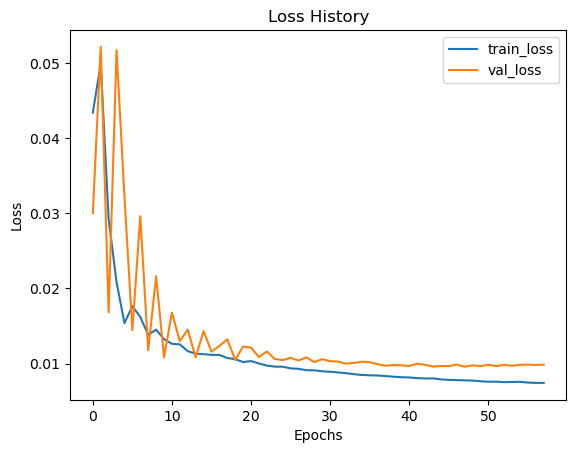

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

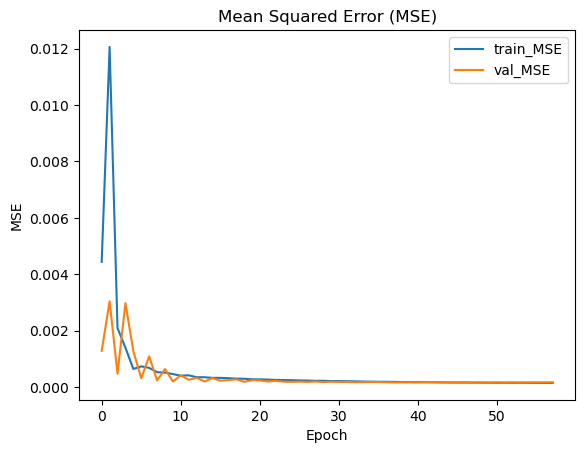

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

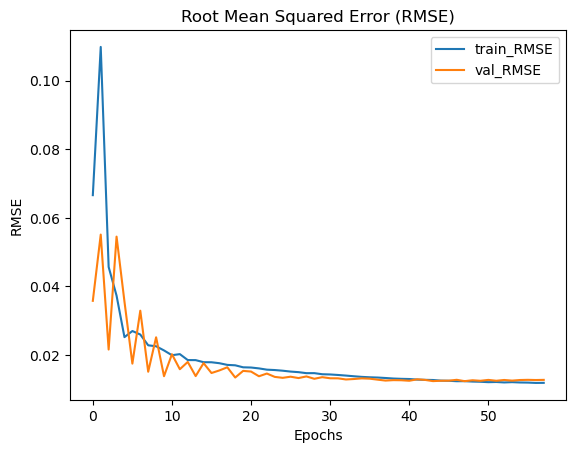

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

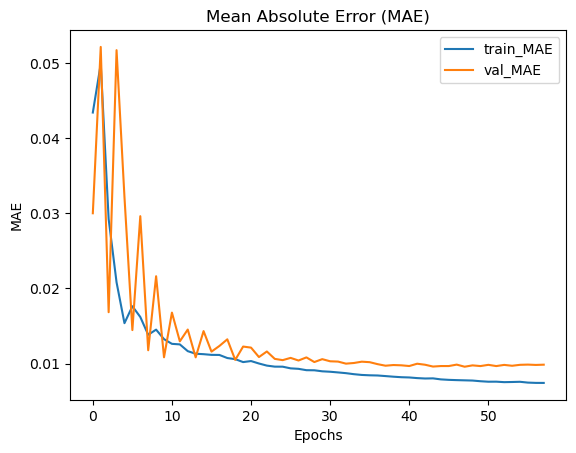

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

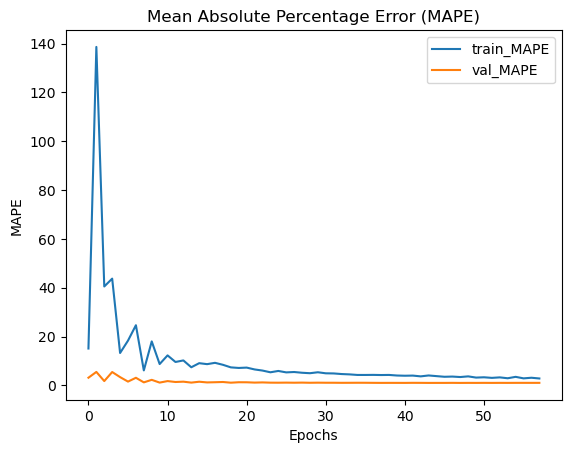

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:53:40.537259: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 4)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


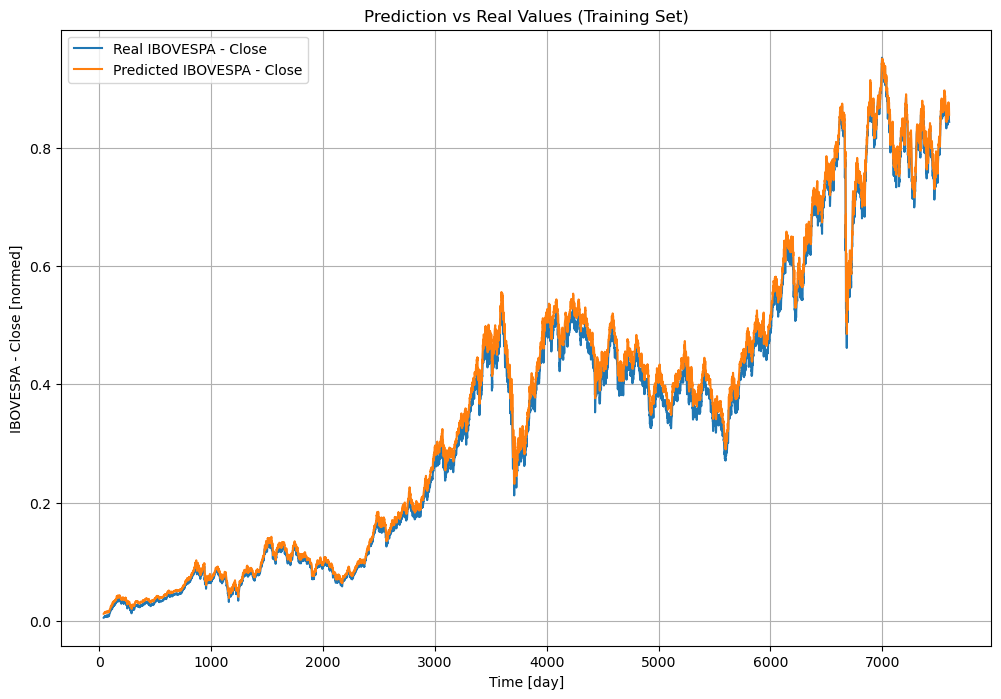

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 4)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


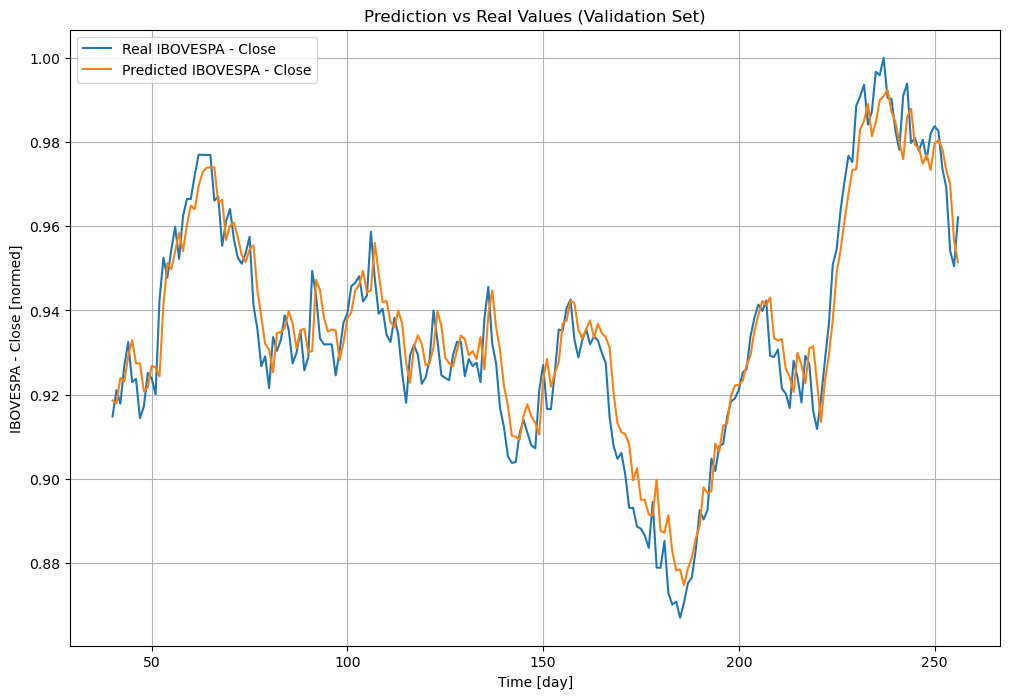

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 4)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


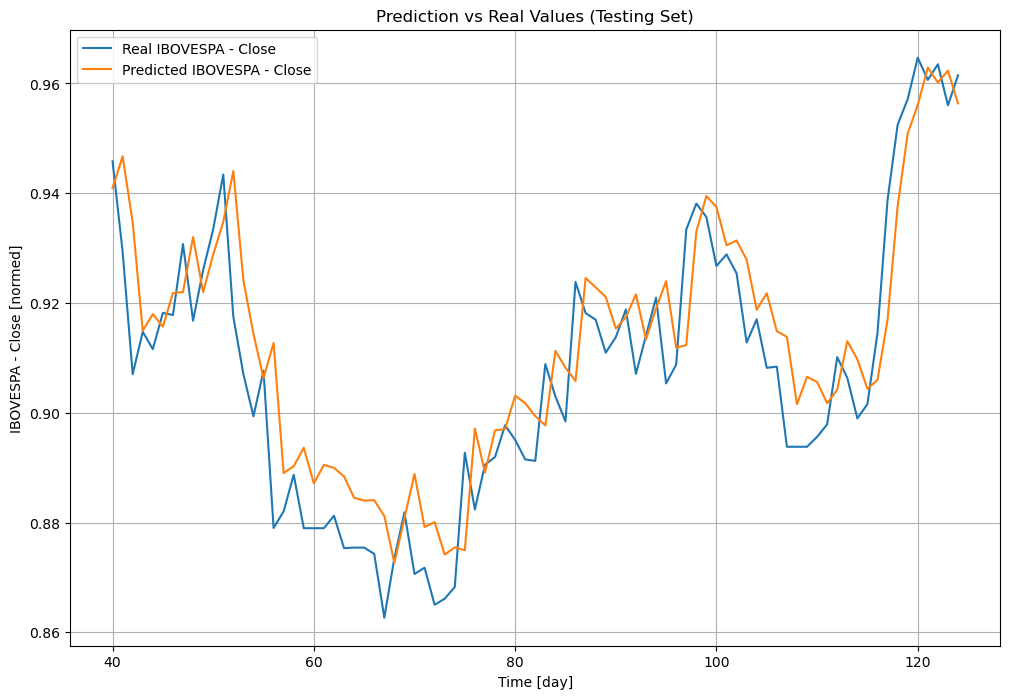

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

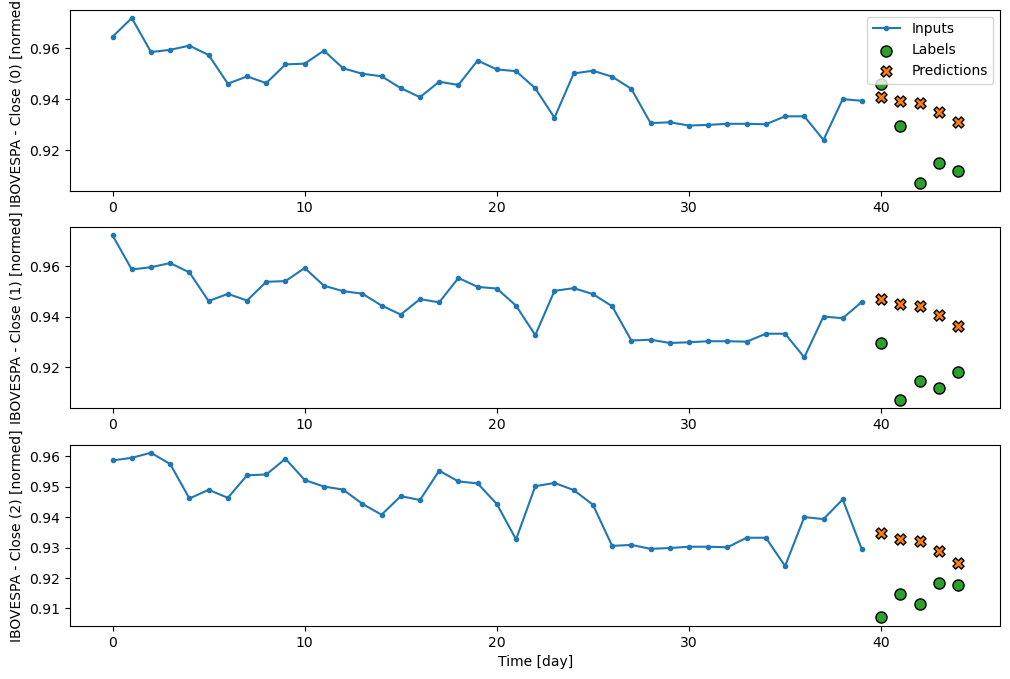

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:52s:902ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[[0.9409248 , 0.9409248 , 0.9409248 , ..., 0.9409248 ,
         0.9409248 , 0.9409248 ],
        [0.9391613 , 0.9391613 , 0.9391613 , ..., 0.9391613 ,
         0.9391613 , 0.9391613 ],
        [0.9384054 , 0.9384054 , 0.9384054 , ..., 0.9384054 ,
         0.9384054 , 0.9384054 ],
        [0.93490237, 0.93490237, 0.93490237, ..., 0.93490237,
         0.93490237, 0.93490237],
        [0.93087137, 0.93087137, 0.93087137, ..., 0.93087137,
         0.9310341 , 0.9310341 ]],

       [[0.94672865, 0.94672865, 0.94672865, ..., 0.94672865,
         0.94672865, 0.94672865],
        [0.944932  , 0.944932  , 0.944932  , ..., 0.944932  ,
         0.944932  , 0.944932  ],
        [0.944131  , 0.944131  , 0.944131  , ..., 0.944131  ,
         0.944131  , 0.944131  ],
        [0.94057536, 0.94057536, 0.94057536, ..., 0.94057536,
         0.94057536, 0.94057536],
        [0.9364439 , 0.9364439 , 0.9364439 , ..., 0.9364439 ,
         0.9366089 , 0.9366089 ]],

       [[0.9347042 , 0.9347042 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')